# STAT 430: Final Project

By: W. Jonas Reger and Atharv Pathak

## 1. Introduction and Dataset Research


### Motivation

For this project we wanted to perform an analysis on a dataset that we found interesting but also relevant to our personal lives. We decided to use the "Movies on Netflix, Prime Video, Hulu and Disney+" Dataset from Kaggle, which can be found at https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney. The Netflix Prize brought more attention to how important recommender systems are and how they may be used in many applications. While algorithms designed to recommend movies, products, or other services to customers are very beneficial to businesses and customers alike, sometimes they can perform poorly due to insufficient data or skewed analysis. Industry practitioners want these recommendations to be fast, simple, and accurate to make it as easy as possible for customers to see it and decide that it's something they want to buy (Technophilo, 2012) Recommendation systems can work very well because they provide customers a way to give their feedback about what they liked or disliked. This feedback helps businesses generate predictions on what other movies or products that the customer is most likely to watch or buy, which can increase the amount of business that is made (Aggarwal, 2016). While our end goal for the project isn't to build a recommendation system, this is a big part of what drew us to this dataset, which contains not just data from Netflix but from three other streaming services as well. We were also excited to find any possible relationships between movie ratings, production details, age, target audience, and streaming services that we may or may not already know. The motivation of someone who would analyze this kind of data more extensively would likely be to build a recommendation system for one of these streaming services or for other movie retailers. These businesses would be able to advertise or recommend movies to customers who would be more likely to watch or pay for it. For instance, Netflix and Prime Video are likely to have a large selection of movies available for all age ratings and would benefit from being able to recommend the best movie for a viewer who prefers 18+ rated Horror and Thriller movies vs another viewer who prefers Comedy and Drama but has no discrimination for age ratings. Another application is to evaluate how well movies in different clusters are rated across different geographic regions, so Netflix could make decisions on what movies to add or remove from different regions of their service. This dataset could even be expanded by including social media ratings and response to movies, movie revenue, how much was watched, and user-specific information that could be more useful for a recommendation system. This kind of data can also be useful to the movie production industry in general since it can help them measure the success of a movie based on ratings, where it's most popular, what genres or other characteristics are trending, and even what streaming service might add the movie to their library. This dataset can also be expanded by including movie rating changes over time to be even more useful for the movie industry (Moon et al, 2010).

1. Aggarwal C.C. (2016) An Introduction to Recommender Systems. In: Recommender Systems. _Springer, Cham_. https://doi.org/10.1007/978-3-319-29659-3_1
2. Moon, S., Bergey, P. K., & Iacobucci, D. (2010). Dynamic Effects among Movie Ratings, Movie Revenues, and Viewer Satisfaction. _Journal of Marketing, 74_(1), 108–121. https://doi.org/10.1509/jmkg.74.1.108
3. Technophilo. (2012, October). Recommender Systems: Pros and Cons. _Technophilo_. http://www.technophilo.in/2012/10/recommender-systems-pros-and-cons.html

### Dataset Information

We retrieved this dataset from Kaggle, which is maintained by Ruchi Bhatia. Part of the data was scraped, which contains attribute information of movies that were available on the streaming platforms. The remaining data came from the IMDb dataset. The Kaggle user was inspired to make this dataset from the following questions:

1. Which streaming platform(s) can I find this movie on?
2. Average IMDb rating of movies produced in a country?
3. Target age group movies vs the streaming \[platform\] they can be found on.
4. The year during which a movie was produced and the streaming platform they can be found on.
5. Analysis of the popularity of a movie vs directors.

She provides a link to her own data visualization that answers these questions, but we will not focus on or be limited to these questions for our own analysis. The dataset has 16744 observations (movies) and 17 columns for row index, movie ID, title, year of production, age rating, IMDb rating, Rotten Tomatoes rating, Netflix Dummy Variable (DV), Hulu DV, Prime Video DV, Disney+ DV, Type (movie or tv show), Directors (names), Genres, Country(s) available in, Language(s), and Runtime (movie length). 

There was no further details including on what if any preprocessing was used, but there may likely have been some binning used since since movies are usually region specific for most if not all platforms. For instance, the movie 'Inception' is listed on Netflix only but might only be available in the United States. Another possible issue is that the 'Country' column could refer to these region specefic availabilities or to where the movie was produced, neither was explicitly stated (similar issues for 'Genres', 'Language', and 'Directors'). We are not sure exactly which attributes come from IMDb or streaming services, but we think it would safe to assume that the attributes we mentioned likely came from the streaming services.

## 2. Preliminary Exploratory Data Analysis (EDA)

### Package Imports

In [ ]:
!pip install kmodes==0.11.0

In [ ]:
!pip install pyclustertend==1.4.9

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline
import statistics as st

import time
import math

from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs, load_digits
from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples
# , calinski_harabaz_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from kmodes.kmodes import KModes

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet

from pyclustertend import hopkins
from sklearn import preprocessing

The above packages are necessary for the exploratory data analysis and unsupervised learning algorithms needed for the dataset. These functions will be used throughout the report and are pivotal for mining important insights from the data.

### Loading Dataset

In [ ]:
# Load the data set
df = pd.read_csv('/datasets/moviedata/MoviesOnStreamingPlatforms_updated.csv') 
print(df.shape)
df.head()

(16744, 17)


Unnamed: 0  ID                           Title  Year  Age  IMDb  \
0           0   1                       Inception  2010  13+   8.8   
1           1   2                      The Matrix  1999  18+   8.7   
2           2   3          Avengers: Infinity War  2018  13+   8.5   
3           3   4              Back to the Future  1985   7+   8.5   
4           4   5  The Good, the Bad and the Ugly  1966  18+   8.8   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
0             87%        1     0            0        0     0   
1             87%        1     0            0        0     0   
2             84%        1     0            0        0     0   
3             96%        1     0            0        0     0   
4             97%        1     0            1        0     0   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2         Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                 Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                    Sergio Leone                           Western   

                        Country                 Language  Runtime  
0  United States,United Kingdom  English,Japanese,French    148.0  
1                 United States                  English    136.0  
2                 United States                  English    149.0  
3                 United States                  English    116.0  
4      Italy,Spain,West Germany                  Italian    161.0

The data shown above closely resembles the raw data file given on Kaggle. Although the dataset was briefly described in the introduction of the report, there are still some key features that should be emphasized. First, it is important to note the overall structures of most features in the dataset: categorical. In other words, many of the clustering/unsupervised learning techniques mentioned in class may not yield substantial results, due to the lack of numerical attributes. There are several ways to combat this issue in order to allow the data to be usable for unsupervised learning. One method, which is implemented in this report, is the use of dummy variables. Instead of having strings of data in each column, like types of genres and name of the directors, it may be more helpful to convert those features into numerical, 1s or 0s, data. This process is outlined later in the Preliminary Exploratory Data Analysis section; however, by doing this, unsupervised learning techniques can be better applied to the dataset. 

### Summary Statistics of Numerical Attributes

In [ ]:
df.describe()

Unnamed: 0            ID          Year          IMDb       Netflix  \
count  16744.000000  16744.000000  16744.000000  16173.000000  16744.000000   
mean    8371.500000   8372.500000   2003.014035      5.902751      0.212613   
std     4833.720789   4833.720789     20.674321      1.347867      0.409169   
min        0.000000      1.000000   1902.000000      0.000000      0.000000   
25%     4185.750000   4186.750000   2000.000000      5.100000      0.000000   
50%     8371.500000   8372.500000   2012.000000      6.100000      0.000000   
75%    12557.250000  12558.250000   2016.000000      6.900000      0.000000   
max    16743.000000  16744.000000   2020.000000      9.300000      1.000000   

               Hulu   Prime Video       Disney+     Type       Runtime  
count  16744.000000  16744.000000  16744.000000  16744.0  16152.000000  
mean       0.053930      0.737817      0.033684      0.0     93.413447  
std        0.225886      0.439835      0.180419      0.0     28.219222  
min        0.000000      0.000000      0.000000      0.0      1.000000  
25%        0.000000      0.000000      0.000000      0.0     82.000000  
50%        0.000000      1.000000      0.000000      0.0     92.000000  
75%        0.000000      1.000000      0.000000      0.0    104.000000  
max        1.000000      1.000000      1.000000      0.0   1256.000000

By importing the dataset into a Pandas dataframe, the summary statistics can be invoked by using the `.describe()` function. Unfortunately, only the numerical features are shown for the summary statistics because the categorical data cannot be described in this way. One thing to note is that the count of each attribute is different, hinting that there may be missing values in the dataset that must be cleansed. Next, the `Netflix`, `Hulu`, `Amazon Prime Video` and `Disney+` columns do not provide valuable insights on each of the parameters. This is mainly due to the fact that those columns are enocded as dummy variables (1s or 0s), meaning that the data shows whether or not an observation has either `Netflix` or no `Netflix`. However, we can see that the average values are quite small for `Netflix`, `Hulu` and `Disney+`, meaning that there are probably very few movies on those streaming platforms within the dataset. On the other hand, `Prime Video` has a value (0.74) relatively close to 1, meaning that most observations are `Prime Video` m. Next, one interesting feature worth noting are the `IMDb` scores of movies. The movies on average have a score of about 5.9, but the standard deviation of the scores is quite large with 1.35. This means that most of the data points in the dataset are between a score of 4.55 and 7.25. Lastly, the `Years` the movies were made spanned a multitude of decades. The oldest movie was made in 1902 and the most recent movie was made in 2020, meaning there is a range of more than 100 years among movies in the dataset. These attributes will provide interesting insights on consumer behavior when unsupervised learning algorithms are applied on the dataset.

### Number of observations per unique value in each categorical variable

In [ ]:
df['Age'].value_counts()

18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

Using the `.value_counts()` function in Python, the counts for each value of age can be found. It is apparent that most of the movie options are 18+, which isn't too surprising. Additionally, since there are streaming platforms, like Disney+, in this dataset, it makes sense that there would be a 1462 observations with 7+ movies and 1255 observations with 13+ movies. The `Age` variable will definitely provide insight on types of movies presented in each of the clusters.

`catSeparate` is a function used to separate categorical values in text cells for `Country`, `Language`, `Directors`, and `Genres` columns.

In [ ]:
def catSeparate(X):
    lst = []
    lst_ct = []
    large = 0
    n = len(X)
    for i in range(0, n):
        c = X[i].split(",")
        if (len(c) > large):
            large = len(c)
        else:
            pass
        for j in range(0, len(c)):
            lst_ct.append(c[j])
            if (c[j] in lst):
                pass
            else:
                lst.append(c[j])

    print(large)
    print(len(lst))
    return(pd.Series(lst_ct))

In [ ]:
X = df.copy()
C = X['Country'].replace(np.nan, "Unknown")
catSeparate(C).value_counts().head(25)

27
169


United States     10486
United Kingdom     1713
India              1157
Canada             1117
France              741
Germany             498
Unknown             435
Italy               417
Spain               329
Australia           321
Hong Kong           269
Japan               266
China               189
Mexico              183
South Korea         162
Belgium             151
Ireland             128
Sweden              118
Netherlands         116
Denmark             113
Argentina           106
Philippines          94
Turkey               88
South Africa         86
Taiwan               80
dtype: int64

From this analysis above, it is apparent that the `Country` variable has about 169 unique countries and a mximum of 27 countries listed for a single movie. It is also not surprising that the first 3 countries, United States, United Kingdom and India, have the highest counts. This is primarily because each of those countries have a booming film industry and are known to output popular cinematography. 

In [ ]:
L = X['Language'].replace(np.nan, "Unknown")
catSeparate(L).value_counts().head(30)

10
179


English       13233
Spanish         872
French          799
Hindi           731
Unknown         599
German          483
Italian         440
Mandarin        352
Japanese        317
Russian         222
Arabic          190
Korean          176
Cantonese       175
Tamil           150
Telugu          112
Portuguese      108
Turkish          95
Hebrew           86
Swedish          82
Filipino         72
Tagalog          69
Punjabi          69
Dutch            68
Latin            63
Chinese          62
Malayalam        61
Danish           60
Marathi          60
Indonesian       59
Urdu             58
dtype: int64

From the code outputted above, it is apparent that the `Language` variable has 179 unique languages and a maximum of 10 languages listed for a single movie. It is also no suprise that English has the highest number of observations as it is the most popular language in the world. 

In [ ]:
D = X['Directors'].replace(np.nan, "Unknown")
catSeparate(D).value_counts().head(25)

28
12454


Unknown               726
Jay Chapman            36
Joseph Kane            31
Cheh Chang             29
William Beaudine       23
Jim Wynorski           23
Sam Newfield           22
Jay Karas              21
David DeCoteau         21
Jan Suter              21
Raúl Campos            21
Marcus Raboy           18
Fred Olen Ray          18
William Witney         17
Scott L. Montoya       17
Lesley Selander        16
Mark Atkins            16
Paul Hoen              15
Manny Rodriguez        15
Robert Stevenson       14
William Nigh           14
Philip Gardiner        13
Mario Bava             13
Roger Corman           13
Robert N. Bradbury     13
dtype: int64

Next, it is apparent that the `Directors` column has a plethora of different options for movies. Specifically, there are 12,454 unique directors and a maximum of 28 directors listed for a single movie. Although this variable is very diverse, it does not seem to be a great option for clustering as there seems to be a lot of `Unknown` directors and the rest of the knowns directors are spread very thin.

In [ ]:
G = X['Genres'].replace(np.nan, "Unknown")
catSeparate(G).value_counts().head(25)

9
28


Drama          7227
Comedy         4637
Thriller       3354
Action         2683
Documentary    2546
Romance        2359
Horror         2201
Crime          1833
Adventure      1778
Family         1514
Mystery        1274
Sci-Fi         1228
Fantasy        1089
Biography       821
History         715
Animation       711
Music           667
War             539
Western         499
Sport           404
Musical         401
Short           386
Unknown         275
News            105
Film-Noir        79
dtype: int64

Lastly, the `Genre` feature provides a lot of insight on the types of movies that are on the streaming platforms. There seems to be 28 unique genres spread accross the dataset and a maximum of 9 genres listed for a single movie. This feature will definitely be the most interesting to analyze as most cluster groups tend to have similar genres of movies. 

### Checking datatypes of each column

In [ ]:
df.dtypes

Unnamed: 0           int64
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

### Preprocessing and Data Cleaning

In [ ]:
df.head()

Unnamed: 0  ID                           Title  Year  Age  IMDb  \
0           0   1                       Inception  2010  13+   8.8   
1           1   2                      The Matrix  1999  18+   8.7   
2           2   3          Avengers: Infinity War  2018  13+   8.5   
3           3   4              Back to the Future  1985   7+   8.5   
4           4   5  The Good, the Bad and the Ugly  1966  18+   8.8   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
0             87%        1     0            0        0     0   
1             87%        1     0            0        0     0   
2             84%        1     0            0        0     0   
3             96%        1     0            0        0     0   
4             97%        1     0            1        0     0   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2         Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                 Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                    Sergio Leone                           Western   

                        Country                 Language  Runtime  
0  United States,United Kingdom  English,Japanese,French    148.0  
1                 United States                  English    136.0  
2                 United States                  English    149.0  
3                 United States                  English    116.0  
4      Italy,Spain,West Germany                  Italian    161.0

In [ ]:
df.isnull().sum(axis = 0)

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

There's a considerable amount of missing data in some columns, the largest being Rotten Tomatoes with 11586 missing values out of a total of 16744 values. Hence, the `Rotten Tomatoes` variable will be dropped, but other variables will be kept and will be cleaned by dropping their respective NA values. Additionally,  `ID`, `Unnamed: 0`, and `Type` will be dropped since they contain irrelevant information for the analysis. 

In [ ]:
DF = df.copy()
DF['Runtime'] = DF['Runtime'].replace(np.nan, st.mean(DF['Runtime']))
DF = DF.drop(['Rotten Tomatoes', 'ID', 'Unnamed: 0', 'Type'], axis=1)
DF = DF.dropna()
DF.reset_index(drop=True, inplace=True)
print(DF.shape)
DF.head()

(7046, 13)


Title  Year  Age  IMDb  Netflix  Hulu  \
0                       Inception  2010  13+   8.8        1     0   
1                      The Matrix  1999  18+   8.7        1     0   
2          Avengers: Infinity War  2018  13+   8.5        1     0   
3              Back to the Future  1985   7+   8.5        1     0   
4  The Good, the Bad and the Ugly  1966  18+   8.8        1     0   

   Prime Video  Disney+                       Directors  \
0            0        0               Christopher Nolan   
1            0        0  Lana Wachowski,Lilly Wachowski   
2            0        0         Anthony Russo,Joe Russo   
3            0        0                 Robert Zemeckis   
4            1        0                    Sergio Leone   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   
3           Adventure,Comedy,Sci-Fi                 United States   
4                           Western      Italy,Spain,West Germany   

                  Language  Runtime  
0  English,Japanese,French    148.0  
1                  English    136.0  
2                  English    149.0  
3                  English    116.0  
4                  Italian    161.0

`dummyDF` is a function that separates the categories in text cells and creates a dummy variable dataframe for the specified column.

In [ ]:
def dummyDF(X):
    temp = pd.DataFrame(X)
    lst = []
    n = len(X)
    for i in range(0, n):
        c = X[i].split(",")
        for j in range(0, len(c)):
            if (c[j] not in lst):
                lst.append(c[j])
                temp[c[j]] = ""
            temp.iloc[i, temp.columns.get_loc(c[j])] = 1
    COL = temp.replace("", 0).drop(temp.columns[0], axis=1)
    print(COL.shape)
    return(COL)

# pd.set_option('display.max_columns', None)
# print(GENRE.shape)
# GENRE.head(15)

In [ ]:
Ldf = dummyDF(DF['Language'])
Gdf = dummyDF(DF['Genres'])
Ddf = dummyDF(DF['Directors'])
Cdf = dummyDF(DF['Country'])

(7046, 131)
(7046, 25)
(7046, 5725)
(7046, 125)


Considering the large number of categorical levels in these dummy variable dataframes, it will be the most efficient to only use the total number of values per observation instead. Because of this, the `Genres` dummy variable dataframe will be the only one used, and the `Language` and `Country` dummy variable dataframes will be dimensionally reduced by combining levels into larger groups (e.g. merging all European levels of `Country` into one column called `European`).

In [ ]:
CX = Cdf.copy()

NA = ['United States', 'Mexico', 'Canada', 'Bermuda', 'Costa Rica', 'Guatemala', 'Panama',
'Bahamas', 'Dominican Republic', 'Haiti', 'Puerto Rico', 'Cayman Islands', 'Cuba', 'Jamaica']

SA = ['Aruba', 'Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Ecuador', 'Uruguay', 'Paraguay',
'Trinidad and Tobago']

EU = ['United Kingdom', 'Italy', 'Spain', 'West Germany', 'France', 'Poland', 'Germany', 'Ireland',
'Belgium', 'East Germany', 'Sweden', 'Finland', 'Denmark', 'Luxembourg', 'Greece', 'Netherlands',
'Switzerland', 'Hungary', 'Norway', 'Romania', 'Iceland', 'Russia', 'Croatia', 'Holy See (Vatican City State)',
'Bulgaria', 'Malta', 'Latvia', 'Slovenia', 'Austria', 'Albania', 'Portugal', 'Serbia', 'Czech Republic',
'Federal Republic of Yugoslavia', 'Monaco', 'Lithuania', 'Ukraine', 'Czechoslovakia', 'Estonia',
'Soviet Union', 'Yugoslavia', 'Belarus', 'Slovakia', 'Bosnia and Herzegovina', 'Montenegro']

AS = ['Hong Kong', 'China', 'Japan', 'South Korea', 'Taiwan', 'Afghanistan', 'Bangladesh', 
'India', 'Kazakhstan', 'Kyrgyzstan', 'Nepal', 'Pakistan', 
'Thailand', 'Cambodia', 'Laos', 'Malaysia', 'Vietnam', 'Singapore', 'Indonesia', 'Philippines', 
'Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Lebanon', 'Qatar', 'Saudi Arabia', 
'Syria', 'Turkey', 'Palestine', 'United Arab Emirates']

AU = ['Australia', 'New Zealand', 'Papua New Guinea']

AF = ['Senegal', 'Nigeria', 'Ghana', 'Burkina Faso', 'Egypt', 'Libya', 'Morocco', 'Tunisia', 
'Angola', 'Congo', 'Ethiopia', 'Kenya', 'Malawi', 'Rwanda', 'Somalia', 'Tanzania', 'Uganda', 
'Zambia', 'Botswana', 'Namibia', 'South Africa']

Regions = NA + SA + EU + AS + AU + AF

CX['North America'] = CX[NA].sum(axis=1)
CX['South America'] = CX[SA].sum(axis=1)
CX['Europe'] = CX[EU].sum(axis=1)
CX['Asia'] = CX[AS].sum(axis=1)
CX['Australia and Pacific'] = CX[AU].sum(axis=1)
CX['Africa'] = CX[AF].sum(axis=1)

CX = CX.drop(Regions, axis=1)

for i in CX.columns:
    for ii in range(0,len(CX)):
        if CX[i][ii] == 0 or CX[i][ii] == 1:
            pass
        if CX[i][ii] > 1:
            CX[i][ii] = 1

CX.head()

North America  South America  Europe  Asia  Australia and Pacific  Africa
0              1              0       1     0                      0       0
1              1              0       0     0                      0       0
2              1              0       0     0                      0       0
3              1              0       0     0                      0       0
4              0              0       1     0                      0       0

In [ ]:
# English       13233
# Spanish         872
# French          799
# Arabic          190
# Portuguese      108

LX = Ldf.copy()

NA = ['North American Indian', 'East-Greenlandic', 'Cheyenne', 'Navajo', 'Maya', 'Middle English',
'Inuktitut', 'Sioux', 'Creek', 'Athapascan languages', 'Apache languages', 'Micmac']

SA = ['Quechua', 'Mapudungun', 'Papiamento', 'Tupi', 'Guarani']

EU = ['Basque', 'Finnish', 'Serbo-Croatian', 'Swiss German', 'Croatian', 'Aramaic', 'Saami',
'Hungarian', 'Estonian', 'Serbian', 'Bosnian', 'Lithuanian', 'Latin', 'Greek', 'Irish', 'Yiddish', 
'Norwegian', 'Romanian', 'Scottish Gaelic', 'Danish', 'Flemish', 'Slovenian', 'Catalan',
'Icelandic', 'Ukrainian', 'Dutch', 'Polish', 'Czech', 'Welsh', 'Luxembourgish', 'Cornish', 
'Maltese', 'Scots', 'Slovak', 'Low German', 'Bulgarian', 'Swedish', 'German', 'Italian', 'Russian']

AS = ['Kudmali', 'Bhojpuri', 'Sanskrit', 'Pushto', 'Sinhalese', 'Awadhi', 'Vietnamese', 'Marathi',
'Armenian', 'Kannada', 'Nepali', 'Urdu', 'Persian', 'Kurdish', 'Bengali', 'Thai', 'Indonesian', 
'Khmer', 'Tagalog', 'Turkmen', 'Tibetan', 'Min Nan', 'Chinese', 'Malayalam', 'Mongolian', 'Punjabi',
'Malay', 'Hakka', 'Shanghainese', 'Gujarati', 'Assyrian Neo-Aramaic', 'Dari', 'Filipino', 'Turkish',
'Cantonese', 'Korean', 'Hindi', 'Tamil', 'Telugu', 'Japanese', 'Mandarin', 'Hebrew']

AU = ['Polynesian', 'Aboriginal', 'Maori', 'Hawaiian']

AF = ['Masai', 'Dyula', 'Nama', 'Amharic', 'Southern Sotho', 'Lingala', 'Berber languages', 'Wolof',
'Nyanja', 'Afrikaans', 'Zulu', 'Xhosa', 'Swahili', 'Yoruba', 'Kinyarwanda']

SL = ['Japanese Sign Language', 'American Sign Language', 'Sign Languages',
'French Sign Language', 'None', 'Brazilian Sign Language']

OT = ['Esperanto', 'Klingon', 'None']

Regions = NA + SA + EU + AS + AU + AF + OT + SL

LX['North American'] = LX[NA].sum(axis=1)
LX['South American'] = LX[SA].sum(axis=1)
LX['European'] = LX[EU].sum(axis=1)
LX['Asian'] = LX[AS].sum(axis=1)
LX['Australian and Pacific'] = LX[AU].sum(axis=1)
LX['African'] = LX[AF].sum(axis=1)
LX['Sign Lang.'] = LX[SL].sum(axis=1)
LX['Other'] = LX[OT].sum(axis=1)

LX = LX.drop(Regions, axis=1)

for i in LX.columns:
    for ii in range(0,len(LX)):
        if LX[i][ii] == 0 or LX[i][ii] == 1:
            pass
        if LX[i][ii] > 1:
            LX[i][ii] = 1

LX.head()

English  French  Spanish  Arabic  Portuguese  North American  \
0        1       1        0       0           0               0   
1        1       0        0       0           0               0   
2        1       0        0       0           0               0   
3        1       0        0       0           0               0   
4        0       0        0       0           0               0   

   South American  European  Asian  Australian and Pacific  African  \
0               0         0      1                       0        0   
1               0         0      0                       0        0   
2               0         0      0                       0        0   
3               0         0      0                       0        0   
4               0         1      0                       0        0   

   Sign Lang.  Other  
0           0      0  
1           0      0  
2           0      0  
3           0      0  
4           0      0

<AxesSubplot:ylabel='Count'>

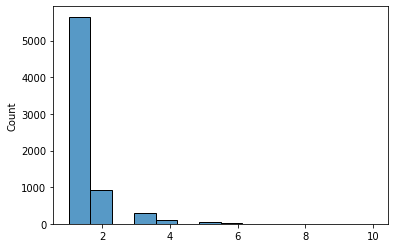

In [ ]:
sns.histplot(Ldf.sum(axis=1))

<AxesSubplot:ylabel='Count'>

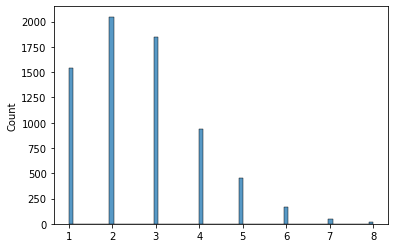

In [ ]:
sns.histplot(Gdf.sum(axis=1))

<AxesSubplot:ylabel='Count'>

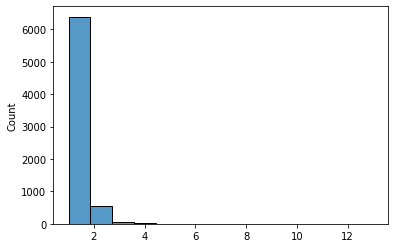

In [ ]:
sns.histplot(Ddf.sum(axis=1))

<AxesSubplot:ylabel='Count'>

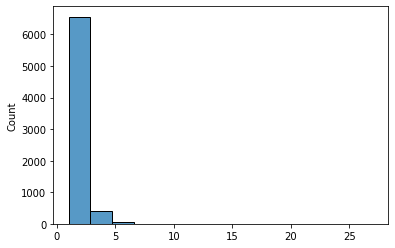

In [ ]:
sns.histplot(Cdf.sum(axis=1))

In [ ]:
X = DF.copy()
X = X.drop(['Genres', 'Country', 'Language', 'Directors'], axis=1)
X['Total Genres'] = Gdf.sum(axis=1)
X['Total Countries'] = Cdf.sum(axis=1)
X['Total Languages'] = Ldf.sum(axis=1)
X['Total Directors'] = Ddf.sum(axis=1)
print(X.shape)
X.head()

(7046, 13)


Title  Year  Age  IMDb  Netflix  Hulu  \
0                       Inception  2010  13+   8.8        1     0   
1                      The Matrix  1999  18+   8.7        1     0   
2          Avengers: Infinity War  2018  13+   8.5        1     0   
3              Back to the Future  1985   7+   8.5        1     0   
4  The Good, the Bad and the Ugly  1966  18+   8.8        1     0   

   Prime Video  Disney+  Runtime  Total Genres  Total Countries  \
0            0        0    148.0             4                2   
1            0        0    136.0             2                1   
2            0        0    149.0             3                1   
3            0        0    116.0             3                1   
4            1        0    161.0             1                3   

   Total Languages  Total Directors  
0                3                1  
1                1                2  
2                1                2  
3                1                1  
4                1                1

We will also replace the `Year` column with `movie_age` for better interpretation.

In [ ]:
X['movie_age'] = 2020 - X['Year']
X = X.drop('Year', axis=1)

Age dummy variable:

In [ ]:
age = pd.get_dummies(X, columns=['Age'])
mdf = pd.concat([age, Gdf, CX, LX], axis=1)

Below is the modified dataset:

In [ ]:
mdf.head()

Title  IMDb  Netflix  Hulu  Prime Video  Disney+  \
0                       Inception   8.8        1     0            0        0   
1                      The Matrix   8.7        1     0            0        0   
2          Avengers: Infinity War   8.5        1     0            0        0   
3              Back to the Future   8.5        1     0            0        0   
4  The Good, the Bad and the Ugly   8.8        1     0            1        0   

   Runtime  Total Genres  Total Countries  Total Languages  ...  Arabic  \
0    148.0             4                2                3  ...       0   
1    136.0             2                1                1  ...       0   
2    149.0             3                1                1  ...       0   
3    116.0             3                1                1  ...       0   
4    161.0             1                3                1  ...       0   

   Portuguese  North American  South American  European  Asian  \
0           0               0               0         0      1   
1           0               0               0         0      0   
2           0               0               0         0      0   
3           0               0               0         0      0   
4           0               0               0         1      0   

   Australian and Pacific  African  Sign Lang.  Other  
0                       0        0           0      0  
1                       0        0           0      0  
2                       0        0           0      0  
3                       0        0           0      0  
4                       0        0           0      0  

[5 rows x 61 columns]

In [ ]:
mdf.describe()

IMDb      Netflix         Hulu  Prime Video      Disney+  \
count  7046.000000  7046.000000  7046.000000  7046.000000  7046.000000   
mean      5.847559     0.228357     0.080471     0.675703     0.069401   
std       1.333326     0.419803     0.272041     0.468145     0.254153   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     0.000000     0.000000     0.000000     0.000000   
50%       6.000000     0.000000     0.000000     1.000000     0.000000   
75%       6.800000     0.000000     0.000000     1.000000     0.000000   
max       9.100000     1.000000     1.000000     1.000000     1.000000   

           Runtime  Total Genres  Total Countries  Total Languages  \
count  7046.000000   7046.000000      7046.000000       7046.00000   
mean     97.586858      2.637099         1.334942          1.30457   
std      21.929089      1.334111         0.868136          0.74407   
min       2.000000      1.000000         1.000000          1.00000   
25%      87.000000      2.000000         1.000000          1.00000   
50%      95.000000      2.000000         1.000000          1.00000   
75%     106.000000      3.000000         1.000000          1.00000   
max     260.000000      8.000000        27.000000         10.00000   

       Total Directors  ...       Arabic   Portuguese  North American  \
count      7046.000000  ...  7046.000000  7046.000000     7046.000000   
mean          1.130429  ...     0.010077     0.005819        0.002555   
std           0.605995  ...     0.099883     0.076065        0.050482   
min           1.000000  ...     0.000000     0.000000        0.000000   
25%           1.000000  ...     0.000000     0.000000        0.000000   
50%           1.000000  ...     0.000000     0.000000        0.000000   
75%           1.000000  ...     0.000000     0.000000        0.000000   
max          13.000000  ...     1.000000     1.000000        1.000000   

       South American     European        Asian  Australian and Pacific  \
count     7046.000000  7046.000000  7046.000000             7046.000000   
mean         0.000710     0.093528     0.131564                0.001703   
std          0.026631     0.291192     0.338040                0.041236   
min          0.000000     0.000000     0.000000                0.000000   
25%          0.000000     0.000000     0.000000                0.000000   
50%          0.000000     0.000000     0.000000                0.000000   
75%          0.000000     0.000000     0.000000                0.000000   
max          1.000000     1.000000     1.000000                1.000000   

           African   Sign Lang.        Other  
count  7046.000000  7046.000000  7046.000000  
mean      0.003832     0.003690     0.001703  
std       0.061789     0.060638     0.041236  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000  

[8 rows x 60 columns]

In [ ]:
Cmat_mdf = mdf.corr()

In [ ]:
lst = []
point = []
for i in Cmat_mdf.columns:
    for j in Cmat_mdf.columns:
        if abs(Cmat_mdf[str(i)][str(j)]) >= 0.4:
            if i==j: 
                pass
            else:
                temp = str(i) + "," + str(j)
                if (str(j) + "," + str(i)) in lst:
                    pass
                else:
                    lst.append(temp)
                    point.append(Cmat_mdf[str(i)][str(j)])
        else:
            pass

### Pairwise Relationships

In [ ]:
pair_mdf = pd.DataFrame({'row,col': lst, 'corr': point})
print(pair_mdf.shape)
pair_mdf.head(16)

(16, 2)


row,col      corr
0        Netflix,Prime Video -0.666071
1             Disney+,Family  0.531371
2     Total Genres,Adventure  0.482358
3     Total Countries,Europe  0.500749
4     Total Languages,French  0.479866
5   Total Languages,European  0.574736
6            Age_13+,Age_18+ -0.431196
7             Age_18+,Age_7+ -0.474986
8             Age_all,Family  0.468911
9           Animation,Family  0.471550
10        North America,Asia -0.483256
11     North America,English  0.614397
12       North America,Asian -0.469579
13              Asia,English -0.580385
14                Asia,Asian  0.767136
15             English,Asian -0.569026

The output above shows pairwise correlations for features that have a correlation values of greater than 0.4 or less than -0.4. This shows what features are adequately correlated with one another in both the positive and negative directions. Some features, like `Asia` and `Asian`, make sense that they have a large correlation between them, while others, like `Netflix` and `Prime Video`, are much more interesting. For instance, seeing a strong, negative correlation between the 2 streaming platforms means that there is an inverse relationship between movies in both platforms, meaning that for any movie that is on `Prime Video` there is less chance that `Netflix` will have it, and vice versa. Additionally, seeing a correlation between `Animation` and `Family`, and `Disney+` and `Family` is reassuring as it makes sense for those features to have a positive correlation with one another. In other words, it makes sense that animation films as well as films on Disney+ cater to the family genre. It is also worth noting the high correlations between `North America` and `English`, and `North America` and `Asian` as it wouldn't readily make sense for such relationships to be prevalent. Overall, there seems to be some interesting pairwise relationships within the dataset that may be brought into light as unsupervised learning is applied to the dataset.

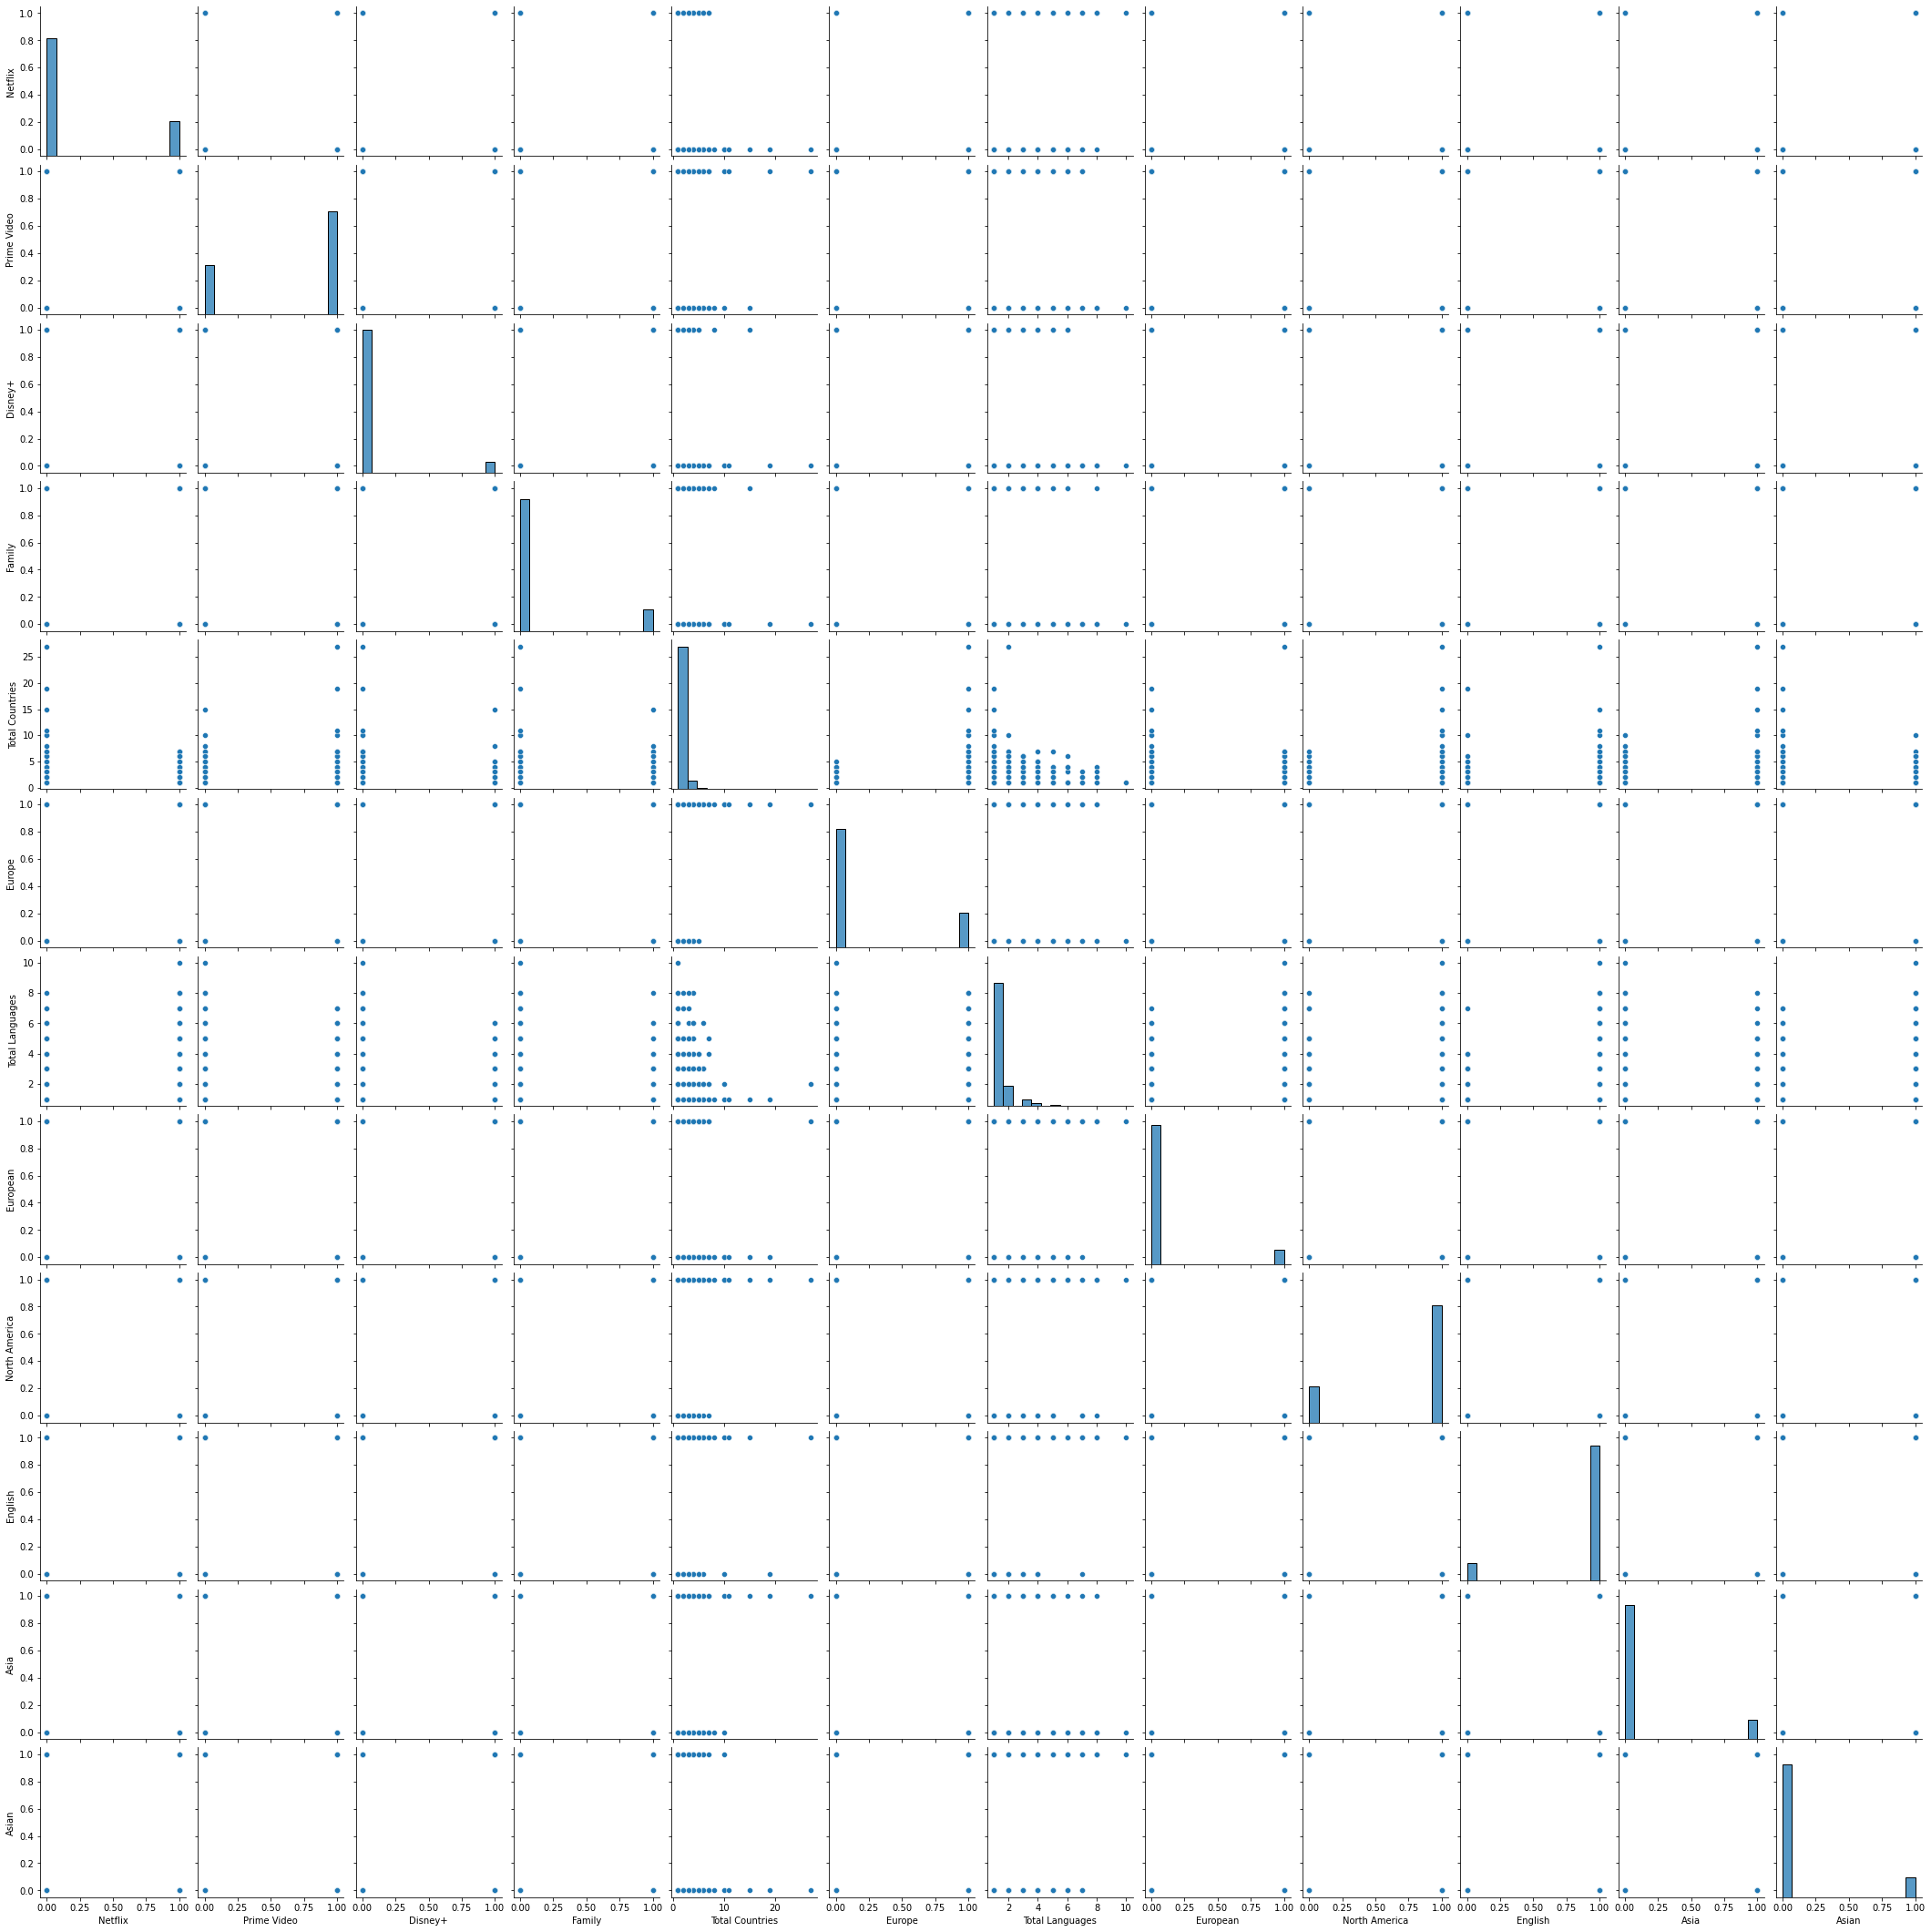

In [ ]:
# Strong/Interesting relationships visualized.
mdf_rel = mdf[['Netflix', 'Prime Video', 'Disney+', 'Family', 'Total Countries', 'Europe', 
'Total Languages', 'European', 'North America', 'English', 'Asia', 'Asian']]
sns.pairplot(mdf_rel)

Shown above are some pairplots of the different features within the dataset. Unfortunately, since most of the data is encoded as dummy variables, these pairwise relationships do not provide any significant information in terms of the relationship between features. In other words, most of the graphs are 0s or 1s data values, which doesn't follow any conventional correlations. However, from the correlation coefficients found in the previous block of code, there is enough preliminary exploratory data analysis to help drive the unsupervised learning in the next sections.

### Scaling of Dataset

In [ ]:
Xs = mdf.copy()
Xs = Xs.drop('Title', axis=1)
Xs_col = Xs.columns
Xs.reset_index(drop=True, inplace=True)
Xs = StandardScaler().fit_transform(Xs)
Xs = pd.DataFrame(Xs, columns=Xs_col)
Xs.describe()

IMDb       Netflix          Hulu   Prime Video       Disney+  \
count  7.046000e+03  7.046000e+03  7.046000e+03  7.046000e+03  7.046000e+03   
mean   5.163183e-16 -2.581592e-16 -6.453979e-17  3.226989e-17  3.226989e-17   
std    1.000071e+00  1.000071e+00  1.000071e+00  1.000071e+00  1.000071e+00   
min   -3.635946e+00 -5.439993e-01 -2.958268e-01 -1.443464e+00 -2.730875e-01   
25%   -6.357176e-01 -5.439993e-01 -2.958268e-01 -1.443464e+00 -2.730875e-01   
50%    1.143395e-01 -5.439993e-01 -2.958268e-01  6.927779e-01 -2.730875e-01   
75%    7.143853e-01 -5.439993e-01 -2.958268e-01  6.927779e-01 -2.730875e-01   
max    2.439517e+00  1.838238e+00  3.380356e+00  6.927779e-01  3.661830e+00   

            Runtime  Total Genres  Total Countries  Total Languages  \
count  7.046000e+03  7.046000e+03     7.046000e+03     7.046000e+03   
mean   1.613495e-16 -4.437110e-17    -8.874221e-17     6.453979e-17   
std    1.000071e+00  1.000071e+00     1.000071e+00     1.000071e+00   
min   -4.359216e+00 -1.227195e+00    -3.858445e-01    -4.093589e-01   
25%   -4.828112e-01 -4.775796e-01    -3.858445e-01    -4.093589e-01   
50%   -1.179730e-01 -4.775796e-01    -3.858445e-01    -4.093589e-01   
75%    3.836794e-01  2.720363e-01    -3.858445e-01    -4.093589e-01   
max    7.406813e+00  4.020116e+00     2.956550e+01     1.168714e+01   

       Total Directors  ...        Arabic    Portuguese  North American  \
count     7.046000e+03  ...  7.046000e+03  7.046000e+03    7.046000e+03   
mean     -2.621929e-17  ...  1.210121e-17  1.815182e-17    4.033737e-18   
std       1.000071e+00  ...  1.000071e+00  1.000071e+00    1.000071e+00   
min      -2.152457e-01  ... -1.008921e-01 -7.650465e-02   -5.060814e-02   
25%      -2.152457e-01  ... -1.008921e-01 -7.650465e-02   -5.060814e-02   
50%      -2.152457e-01  ... -1.008921e-01 -7.650465e-02   -5.060814e-02   
75%      -2.152457e-01  ... -1.008921e-01 -7.650465e-02   -5.060814e-02   
max       1.958830e+01  ...  9.911581e+00  1.307110e+01    1.975967e+01   

       South American      European        Asian  Australian and Pacific  \
count    7.046000e+03  7.046000e+03  7046.000000            7.046000e+03   
mean     5.042171e-18 -4.033737e-17     0.000000            2.016868e-17   
std      1.000071e+00  1.000071e+00     1.000071            1.000071e+00   
min     -2.664820e-02 -3.212138e-01    -0.389224           -4.130375e-02   
25%     -2.664820e-02 -3.212138e-01    -0.389224           -4.130375e-02   
50%     -2.664820e-02 -3.212138e-01    -0.389224           -4.130375e-02   
75%     -2.664820e-02 -3.212138e-01    -0.389224           -4.130375e-02   
max      3.752599e+01  3.113191e+00     2.569214            2.421088e+01   

            African    Sign Lang.         Other  
count  7.046000e+03  7.046000e+03  7.046000e+03  
mean   2.067290e-17  1.411808e-17  1.815182e-17  
std    1.000071e+00  1.000071e+00  1.000071e+00  
min   -6.202178e-02 -6.085806e-02 -4.130375e-02  
25%   -6.202178e-02 -6.085806e-02 -4.130375e-02  
50%   -6.202178e-02 -6.085806e-02 -4.130375e-02  
75%   -6.202178e-02 -6.085806e-02 -4.130375e-02  
max    1.612337e+01  1.643168e+01  2.421088e+01  

[8 rows x 60 columns]

One main issue that was presented in the original dataset was the standard deviation within each feature. Specifically, there seemed to be a large spread among numerical data as well as created dummy variables. Because of this, the dataset was a bit unbalanced and it was much more difficult to derive insights through clustering. To combat this, scaling was applied to the dataset to stabilize the standard deviations of all variables in the dataset. In the table above, most, if not all, features have a standard deviation of about 1, meaning that the dataset was scaled appropriately. 

### Final Data Preparation

The code in this section transforms the `mdf` dataframe into a complete categorical dataset via binning and encoding.

In [ ]:
mdf_bin = mdf.copy()
mdf_bin = mdf_bin.dropna()

mdf_bin['runtime_bin'] = pd.cut(mdf_bin['Runtime'], [0, 87, 95, 106, 260],
labels=['0-87', '87-95', '95-106', '106-260'], include_lowest=True)
mdf_bin['move_age_bin'] = pd.cut(mdf_bin['movie_age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120'], include_lowest=True)
mdf_bin['imdb_bin'] = pd.cut(mdf_bin['IMDb'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10'], include_lowest=True)

mdf_cat = mdf_bin.drop(['Title', 'IMDb', 'Runtime', 'movie_age'], axis=1)

lab_enc = preprocessing.LabelEncoder()
mdf_cat = mdf_cat.apply(lab_enc.fit_transform)
mdf_cat.head()

Netflix  Hulu  Prime Video  Disney+  Total Genres  Total Countries  \
0        1     0            0        0             3                1   
1        1     0            0        0             1                0   
2        1     0            0        0             2                0   
3        1     0            0        0             2                0   
4        1     0            1        0             0                2   

   Total Languages  Total Directors  Age_13+  Age_16+  ...  South American  \
0                2                0        1        0  ...               0   
1                0                1        0        0  ...               0   
2                0                1        1        0  ...               0   
3                0                0        0        0  ...               0   
4                0                0        0        0  ...               0   

   European  Asian  Australian and Pacific  African  Sign Lang.  Other  \
0         0      1                       0        0           0      0   
1         0      0                       0        0           0      0   
2         0      0                       0        0           0      0   
3         0      0                       0        0           0      0   
4         1      0                       0        0           0      0   

   runtime_bin  move_age_bin  imdb_bin  
0            1             0         8  
1            1             4         8  
2            1             0         8  
3            1             5         8  
4            1             7         8  

[5 rows x 60 columns]

In [ ]:
mdf_cat.describe()

Netflix         Hulu  Prime Video      Disney+  Total Genres  \
count  7046.000000  7046.000000  7046.000000  7046.000000   7046.000000   
mean      0.228357     0.080471     0.675703     0.069401      1.637099   
std       0.419803     0.272041     0.468145     0.254153      1.334111   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     0.000000     0.000000      1.000000   
50%       0.000000     0.000000     1.000000     0.000000      1.000000   
75%       0.000000     0.000000     1.000000     0.000000      2.000000   
max       1.000000     1.000000     1.000000     1.000000      7.000000   

       Total Countries  Total Languages  Total Directors      Age_13+  \
count      7046.000000      7046.000000      7046.000000  7046.000000   
mean          0.330968         0.304428         0.128016     0.169174   
std           0.794247         0.742505         0.568954     0.374932   
min           0.000000         0.000000         0.000000     0.000000   
25%           0.000000         0.000000         0.000000     0.000000   
50%           0.000000         0.000000         0.000000     0.000000   
75%           0.000000         0.000000         0.000000     0.000000   
max          12.000000         8.000000        11.000000     1.000000   

           Age_16+  ...  South American     European        Asian  \
count  7046.000000  ...     7046.000000  7046.000000  7046.000000   
mean      0.043287  ...        0.000710     0.093528     0.131564   
std       0.203517  ...        0.026631     0.291192     0.338040   
min       0.000000  ...        0.000000     0.000000     0.000000   
25%       0.000000  ...        0.000000     0.000000     0.000000   
50%       0.000000  ...        0.000000     0.000000     0.000000   
75%       0.000000  ...        0.000000     0.000000     0.000000   
max       1.000000  ...        1.000000     1.000000     1.000000   

       Australian and Pacific      African   Sign Lang.        Other  \
count             7046.000000  7046.000000  7046.000000  7046.000000   
mean                 0.001703     0.003832     0.003690     0.001703   
std                  0.041236     0.061789     0.060638     0.041236   
min                  0.000000     0.000000     0.000000     0.000000   
25%                  0.000000     0.000000     0.000000     0.000000   
50%                  0.000000     0.000000     0.000000     0.000000   
75%                  0.000000     0.000000     0.000000     0.000000   
max                  1.000000     1.000000     1.000000     1.000000   

       runtime_bin  move_age_bin     imdb_bin  
count  7046.000000   7046.000000  7046.000000  
mean      1.467783      1.592251     5.311240  
std       1.094420      2.330759     1.364898  
min       0.000000      0.000000     0.000000  
25%       0.000000      0.000000     4.000000  
50%       2.000000      0.000000     5.000000  
75%       2.000000      4.000000     6.000000  
max       3.000000     11.000000     9.000000  

[8 rows x 60 columns]

In [ ]:
pd.concat([mdf_bin['runtime_bin'],mdf_cat['runtime_bin']], axis=1).drop_duplicates()

runtime_bin  runtime_bin
0       106-260            1
14        87-95            2
17       95-106            3
60         0-87            0

In [ ]:
pd.concat([mdf_bin['move_age_bin'],mdf_cat['move_age_bin']], axis=1).drop_duplicates()

move_age_bin  move_age_bin
0             0-10             0
1            20-30             4
3            30-40             5
4            50-60             7
6            10-20             1
10           40-50             6
1132         70-80             9
2165         60-70             8
2182       110-120             3
2183        90-100            11
2402         80-90            10
2482       100-110             2

In [ ]:
pd.concat([mdf_bin['imdb_bin'],mdf_cat['imdb_bin']], axis=1).drop_duplicates()

imdb_bin  imdb_bin
0          8-9         8
17         7-8         7
87         6-7         6
350        5-6         5
564        4-5         4
955        3-4         3
1405       2-3         2
3795      9-10         9
5800       1-2         1
5857       0-1         0

## 3. Pre-Analysis Questions

### Is the Dataset Clusterable?

In [ ]:
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
    n = len(Xs)
    p = int(0.1 * n)
    hopkins_stats.append(hopkins(Xs,p))
print(hopkins_stats)

[0.04787287486329283, 0.046212584092674994, 0.04912450621847824, 0.050456876476902356, 0.0514035182818585]


In [ ]:
X = mdf.copy()
X = X.drop('Title', axis=1)
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
    n = len(X)
    p = int(0.1 * n)
    hopkins_stats.append(hopkins(X,p))
print(hopkins_stats)

[0.1174229137206027, 0.11626092281816985, 0.11773277234002626, 0.1159508949446523, 0.11308519643283894]


In [ ]:
X = mdf_cat.copy()
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
    n = len(X)
    p = int(0.1 * n)
    hopkins_stats.append(hopkins(X,p))
print(hopkins_stats)

[0.15811260242132272, 0.16378645261943173, 0.16343232400814603, 0.15993350077559418, 0.16600534869074055]


In [ ]:
def tsne_df(XDF, DF, PR, RS):
    tsne = TSNE(n_components=2, perplexity=PR, random_state=RS)
    data_tsne = tsne.fit_transform(XDF)
    df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=XDF.index)
    dff = pd.concat([DF, df_tsne], axis=1)
    return(dff)

def tsne_plot(DFF, W, H, FS):
    fig, ax = plt.subplots(figsize=(W, H))
    with sns.plotting_context("notebook", font_scale=FS):
        sns.scatterplot(x='x', 
                        y='y', 
                        sizes=(30, 400),
                        data=DFF,
                        ax=ax)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    plt.show()

def tsne_plot_hue(DFF, W, H, FS, HUE):
    fig, ax = plt.subplots(figsize=(W, H))
    with sns.plotting_context("notebook", font_scale=FS):
        sns.scatterplot(x='x', 
                        y='y', 
                        sizes=(30, 400),
                        hue=HUE,
                        data=DFF,
                        ax=ax)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    plt.show()


In [ ]:
X_cat = mdf_cat.copy()
tdf35 = tsne_df(XDF=X_cat, DF=mdf_cat, PR=35, RS=1000)

In [ ]:
tdf45 = tsne_df(XDF=X_cat, DF=mdf_cat, PR=45, RS=1000)

In [ ]:
tsne_plot(DFF=tdf35, W=12, H=8, FS=1.5)

NameError: name 'tsne_plot' is not defined

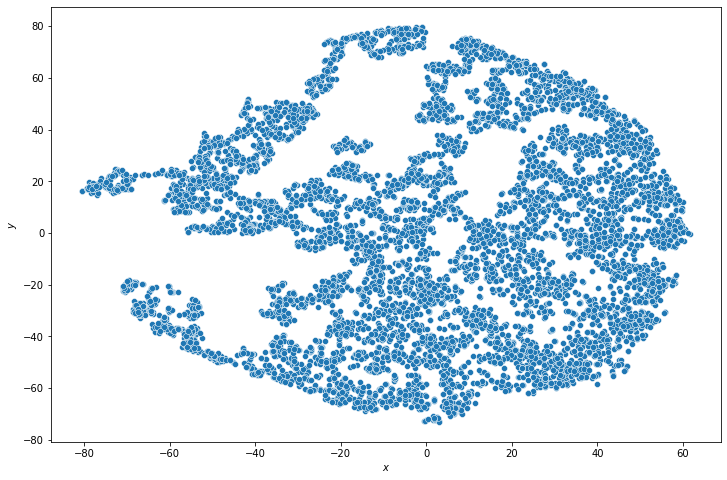

In [ ]:
Xu = mdf.copy()
Xu = Xu.drop('Title', axis=1)
tdf35u = tsne_df(XDF=Xu, DF=Xu, PR=35, RS=1000)
tsne_plot(DFF=tdf35u, W=12, H=8, FS=1.5)

From the analysis above, this dataset is clusterable. The main metric used to deduce the clusterability of the two datasets used in the analysis is the hopkins statistic. After running the algorithm on both datasets, the hopkins statistic provided values ranging from 0.04 and 0.16. The closer the hopkins statistic is to 0, the more clusterable the dataset is, which confirms that both datasets are ready for unsupervised learning. As stated earlier, there are 2 main datasets used in this report: `mdf` and `mdf_cat`. The t-sne plot for `mdf_cat` is shown first and the t-sne plot for `mdf` is shown second. For `mdf_cat`, there seems to be 2 main large clusters with many smaller cluster hovering around it, while `mdf` seems like one large cluster with a few less spherical clusters attached to it. Both clusters seem to have a shape that is approximately spherical with very little separation and cohesion. Additionally, both plots show that the clusters are not balanced in size as some are larger than others, and due to the lack of separation there is a large chance that many of the clusters overlap with one another. Although these plots do not present promising results, the different unsupervised learning algorithms may be able to identify some hidden cluster structures that can shed light on some possible findings in the data.

## 4. Algorithm Selection Motivation

This dataset was heavily dependent on categorical variables with very few numerical attributes. Additionally, there were a large amount of missing data and pre-processing that must be done for the dataset to be usable under any unsupervised modeling. During the processing phase, many of the observations were converted from categorical values to dummy variables as well as encoded into bins and then scaled to be on par with the rest of the features in the dataset. This allowed the dataset to be ready for a categorical based clustering. In fact, this dataset became a perfect specimen for agglomerative hierarchial clustering because of the dummy variables and standardized data. Additionally, since the dataset was categorical heavy, the k-modes algorithm was also chosen to cluster the dataset. Both of these clustering algorithms are known for their efficacy in categorical datasets and tend to give accurate clusterings. This is why they were chosen and implemented in the next section.

## 5. Algorithm Results

### Agglomerative Hierarchial Clustering Algorithm

In [ ]:
hierarch_df = mdf.copy()
hierarch_df = hierarch_df.drop(['Title'], axis = 1)
X = mdf.copy()
X = X.drop(['Title'], axis = 1)

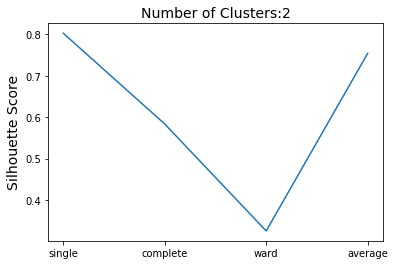

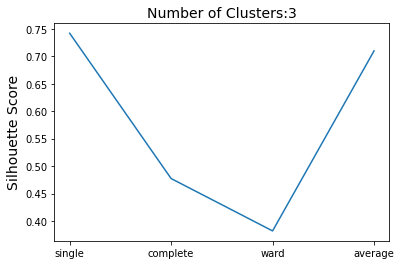

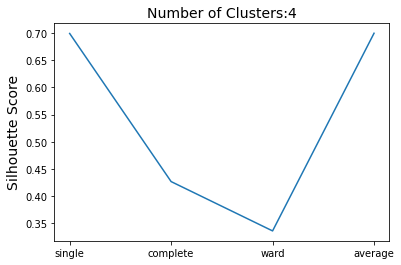

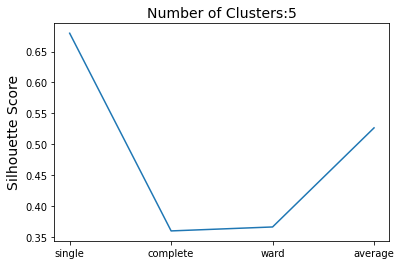

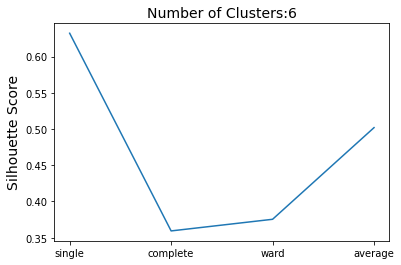

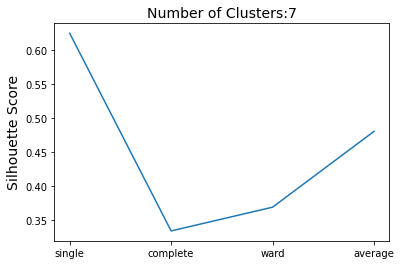

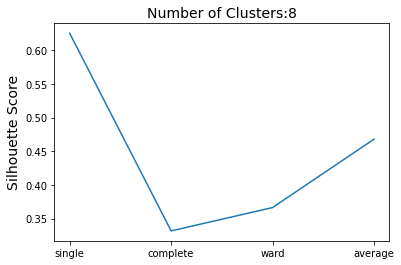

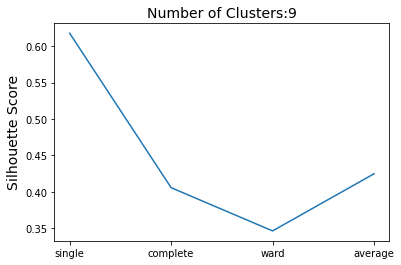

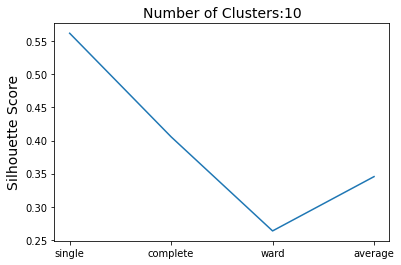

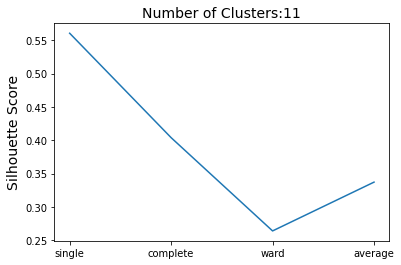

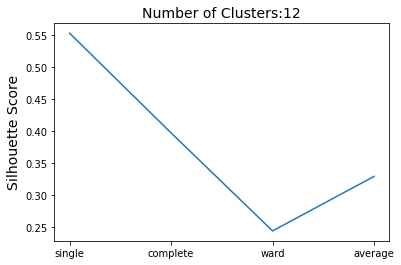

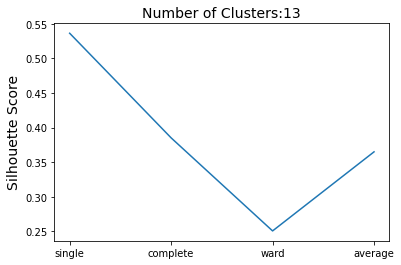

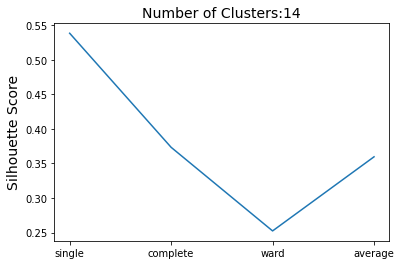

In [ ]:
nb_clusters = range(2,15)
linkages = ['single', 'complete', 'ward', 'average']

silhouette_scores = np.zeros(shape = (len(linkages),len(nb_clusters)))

for i,l in enumerate(linkages):
    for j,nbc in enumerate(nb_clusters):
        ag = AgglomerativeClustering(n_clusters=nbc, affinity='euclidean', linkage=l)
        Y_pred = ag.fit_predict(hierarch_df)
        sls = silhouette_score(hierarch_df,Y_pred,random_state=1002)
        silhouette_scores[i,j] = sls

for i in range(len(nb_clusters)):
    plt.plot(silhouette_scores[:,i])
    plt.ylabel('Silhouette Score', fontsize = 14)
    plt.title('Number of Clusters:' + str(nb_clusters[i]), fontsize = 14)
    plt.xticks(np.arange(len(linkages)), linkages)
    plt.show()


In [ ]:
sil_df = pd.DataFrame(silhouette_scores)
sil_df = sil_df.rename(columns={0:'2 Clusters', 1:'3 Clusters', 2:'4 Clusters', 3:'5 Clusters', 4:'6 Clusters', 5:'7 Clusters', 6:'8 Clusters', 7:'9 Clusters', 8:'10 Clusters', 9:'11 Clusters', 10:'12 Clusters', 11:'13 Clusters', 12:'14 Clusters'})
sil_df = sil_df.rename(index={0:'Single', 1:'Complete', 2:'Ward', 3:'Average'})
print(np.max(sil_df, axis=1))
print(sil_df.idxmax(axis=0, skipna=True))
sil_df.head()

Single      0.802377
Complete    0.583415
Ward        0.381852
Average     0.753833
dtype: float64
2 Clusters      Single
3 Clusters      Single
4 Clusters     Average
5 Clusters      Single
6 Clusters      Single
7 Clusters      Single
8 Clusters      Single
9 Clusters      Single
10 Clusters     Single
11 Clusters     Single
12 Clusters     Single
13 Clusters     Single
14 Clusters     Single
dtype: object


2 Clusters  3 Clusters  4 Clusters  5 Clusters  6 Clusters  \
Single      0.802377    0.742033    0.699092    0.679815    0.632251   
Complete    0.583415    0.477275    0.426665    0.359481    0.359329   
Ward        0.325486    0.381852    0.335937    0.365892    0.375388   
Average     0.753833    0.709916    0.699513    0.526458    0.501937   

          7 Clusters  8 Clusters  9 Clusters  10 Clusters  11 Clusters  \
Single      0.625272    0.625197    0.617806     0.562021     0.560314   
Complete    0.333615    0.331627    0.405747     0.405563     0.403882   
Ward        0.368624    0.366323    0.346365     0.263466     0.264165   
Average     0.480529    0.467910    0.424836     0.345477     0.337259   

          12 Clusters  13 Clusters  14 Clusters  
Single       0.553354     0.536316     0.538380  
Complete     0.397387     0.385200     0.373341  
Ward         0.244164     0.250774     0.252364  
Average      0.329425     0.365002     0.359600

From the results shown above, several silhouette scores were computed based on 4 different linkages: single, complete, ward and average. From the summary table, it is apparent that the single linkage was the most dominant linkage for the agglomerative hierarchial clustering. These high scores indicate the best linkage option as well as the best number of clusters. Based on the silhouette scores alone, it seem that a single linkage with 2 clusters is perfect for the agglomerative hierarchial clustering algorithm. The next best option was average linkage and then complete linkage. Each linkage has its pros and cons for clustering, so a great next step would be to visualize the most predominant linkages on a t-sne plot over a range of clusterings to see what is the best option for the agglomerative hierarchial clustering.

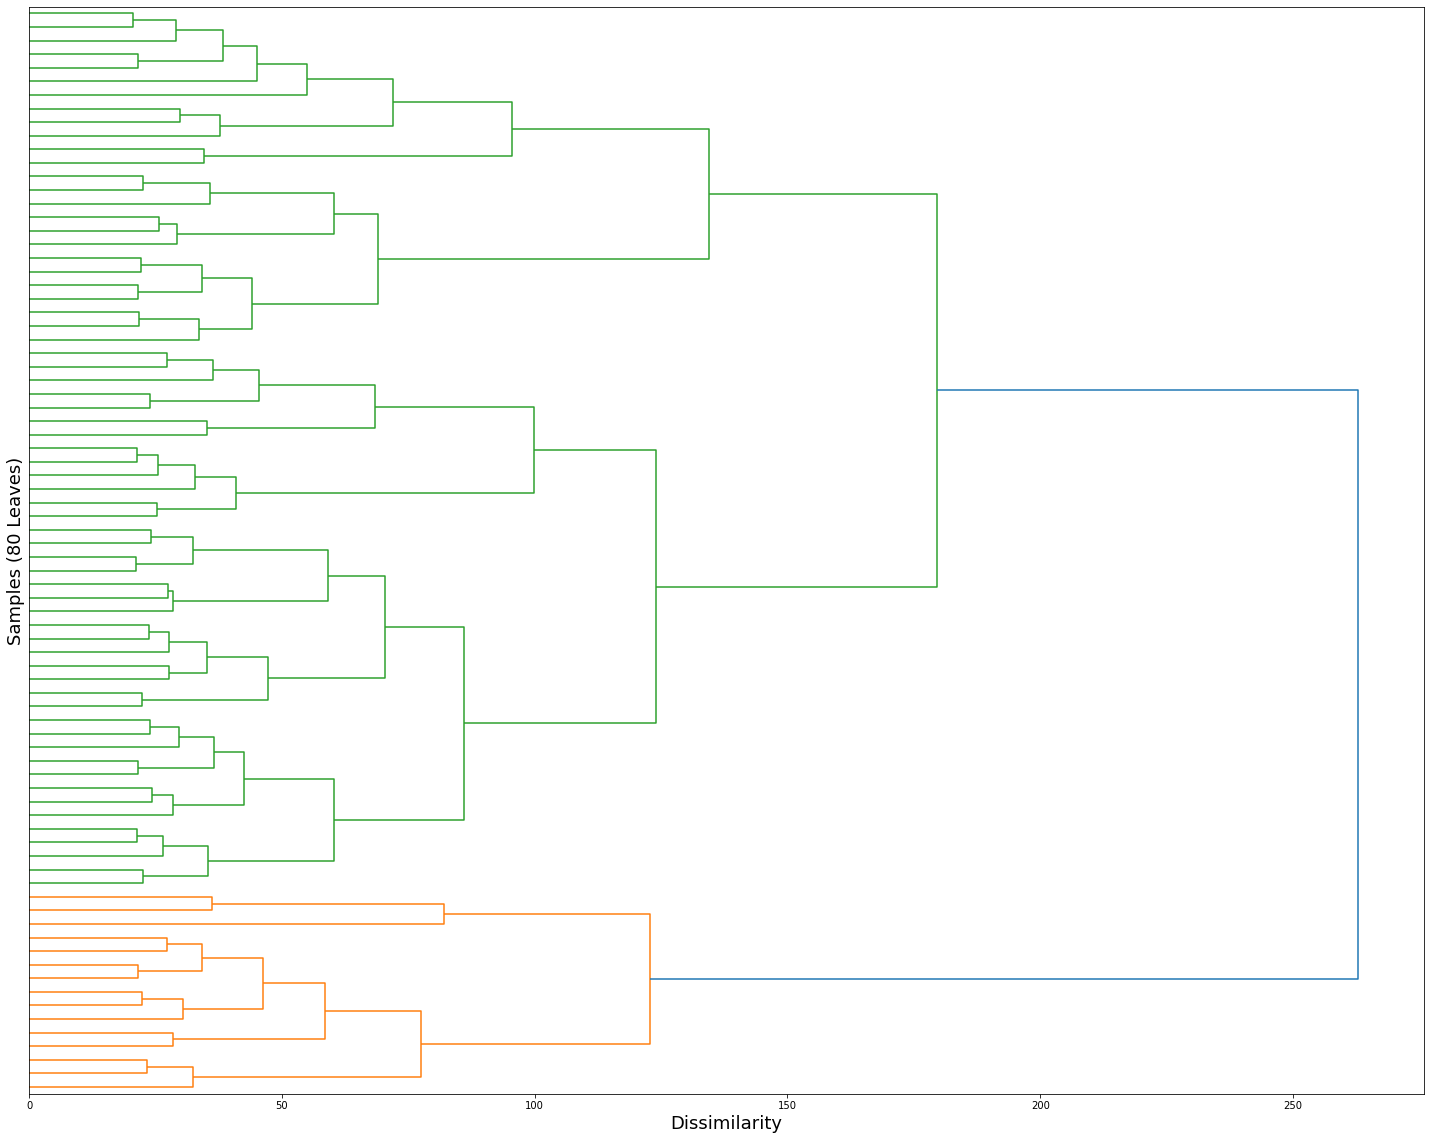

In [ ]:
dm = pdist(hierarch_df,metric='euclidean')
Z = linkage(dm, method='complete')
fig,ax = plt.subplots(figsize = (25,20))
d = dendrogram(Z,orientation = 'right', truncate_mode='lastp', p=80, no_labels=True, ax=ax)
ax.set_xlabel('Dissimilarity', fontsize = 18)
ax.set_ylabel('Samples (80 Leaves)', fontsize = 18)
plt.show()

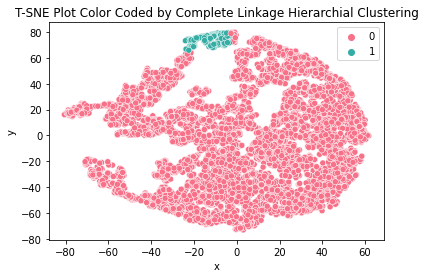

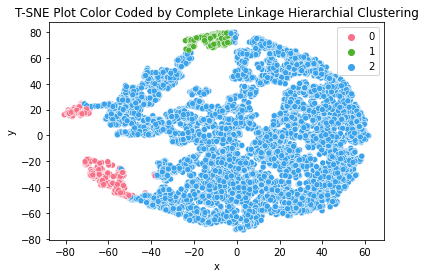

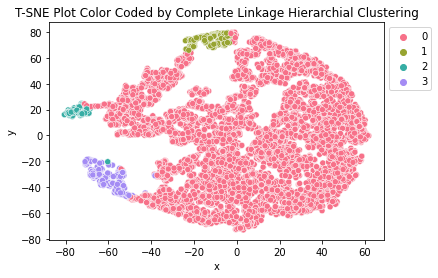

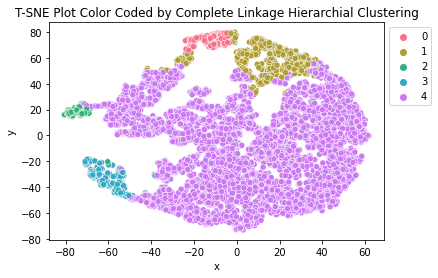

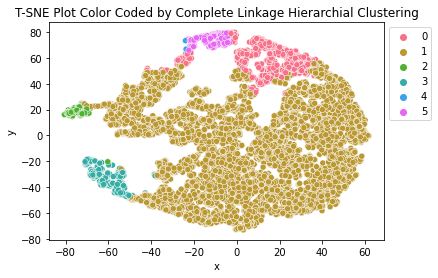

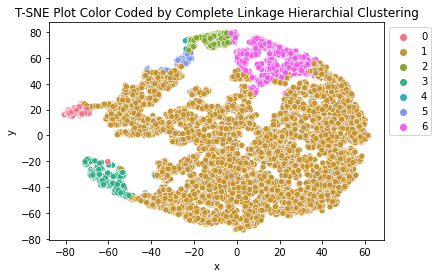

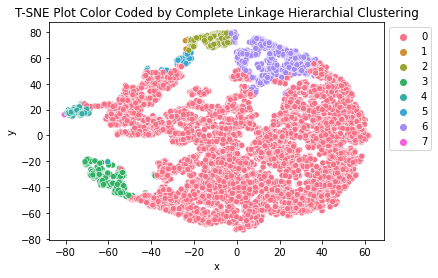

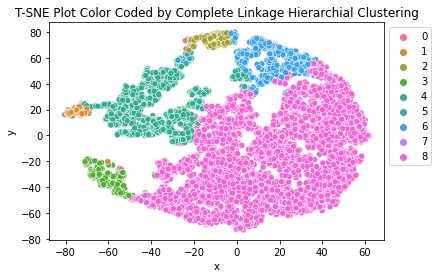

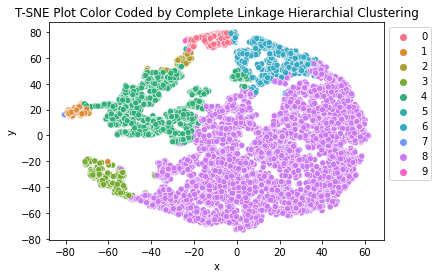

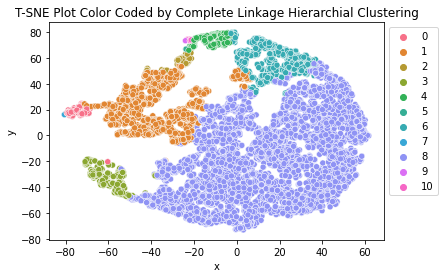

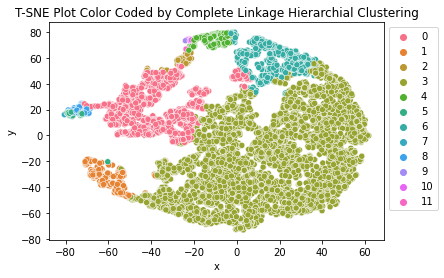

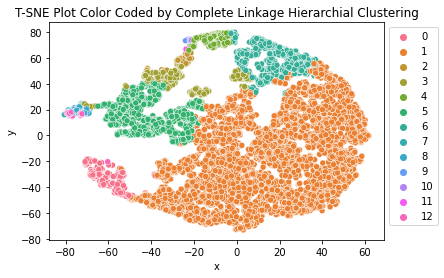

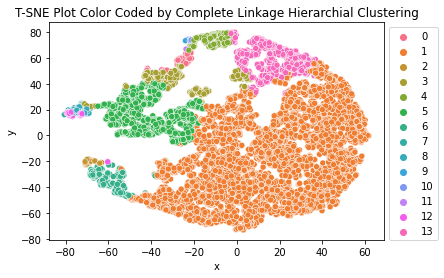

In [ ]:
tdf35 = tsne_df(XDF=X, DF=mdf, PR=35, RS=1000)
for n in range(2,15):
    ag = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='complete')
    Y_pred = ag.fit_predict(hierarch_df)
    df_pred = pd.Series(Y_pred, name='Cluster', index = hierarch_df.index)
    pdff = pd.concat([tdf35,df_pred], axis = 1)

    sns.scatterplot(x = 'x', y = 'y', hue='Cluster', palette=sns.color_palette('husl', n), data = pdff)
    plt.title('T-SNE Plot Color Coded by Complete Linkage Hierarchial Clustering')
    plt.legend(bbox_to_anchor = (1,1))
    plt.show()


The first option to be explored was the complete linkage over 2-14 different clusters. Firstly, the dendogram is created based on the data (`mdf`) used for the hierarchial clustering. From the dendogram, it is apparent that the relationships/clusters are evenly spread out, hinting that there is a balanced cluster structure. After around 4 clusters, the dendogram produces really small clusters, which may be more useful for identifying outlier groups in the dataset. From the t-sne plots, it is evident that the agglomerative hierarchial clustering algorithm with complete linkage tends to break down the main big cluster into smaller subsets. This means that the algorithm may not be able to identify the main clusters in the dataset.

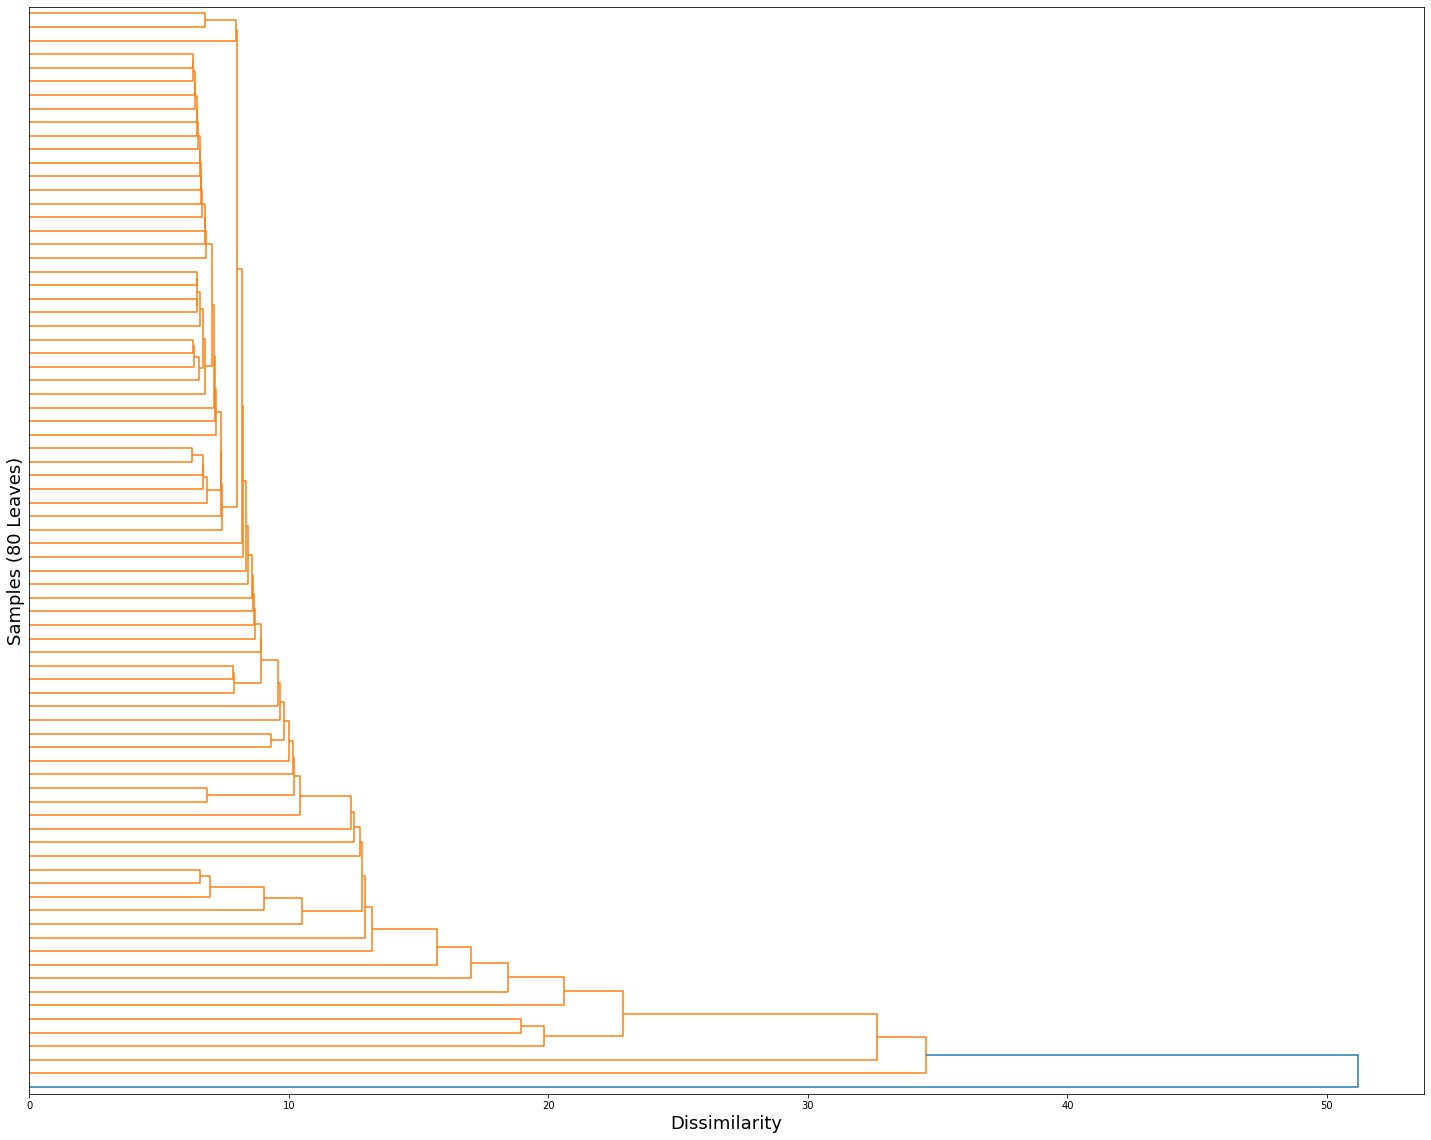

In [ ]:
dm = pdist(hierarch_df,metric='euclidean')
Z = linkage(dm, method='single')
fig,ax = plt.subplots(figsize = (25,20))
d = dendrogram(Z,orientation = 'right', truncate_mode='lastp', p=80, no_labels=True, ax=ax)
ax.set_xlabel('Dissimilarity', fontsize = 18)
ax.set_ylabel('Samples (80 Leaves)', fontsize = 18)
plt.show()

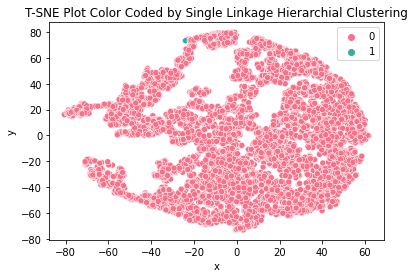

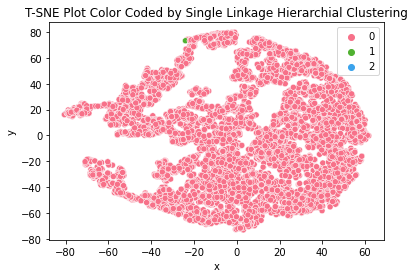

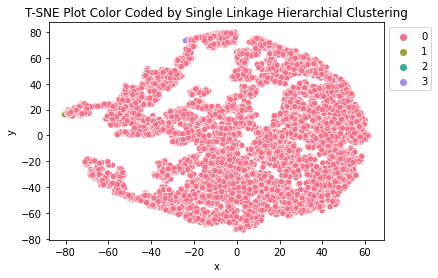

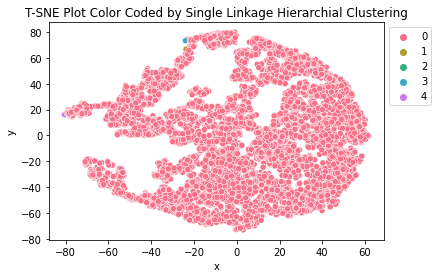

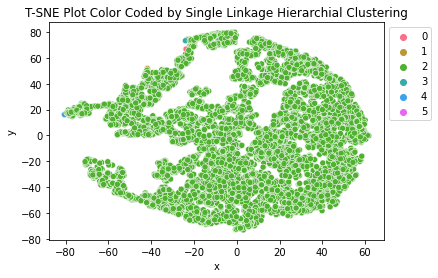

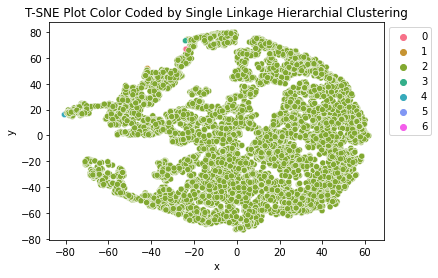

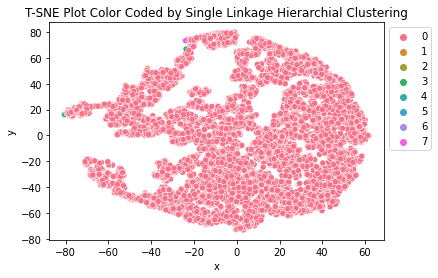

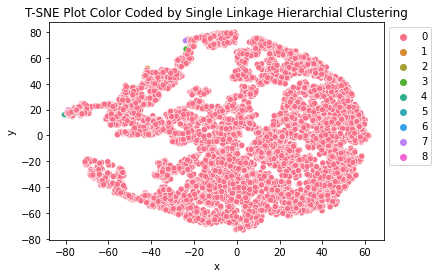

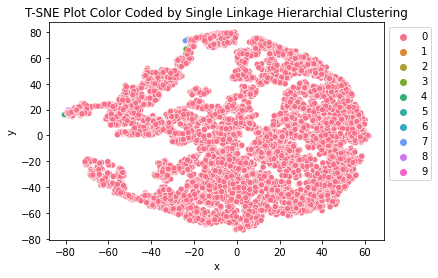

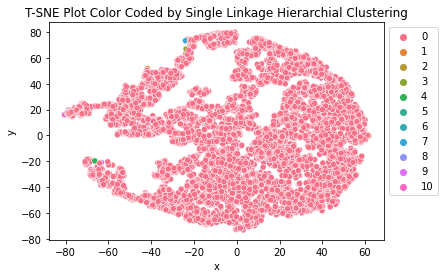

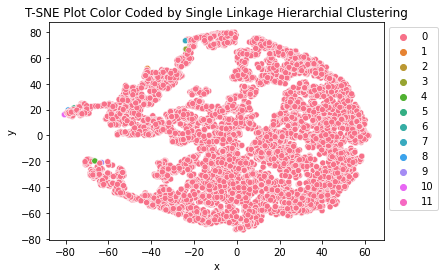

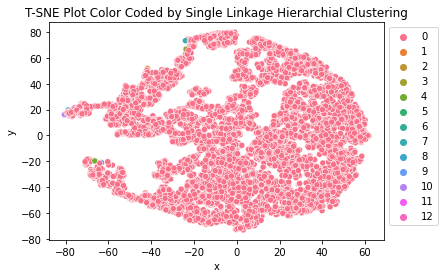

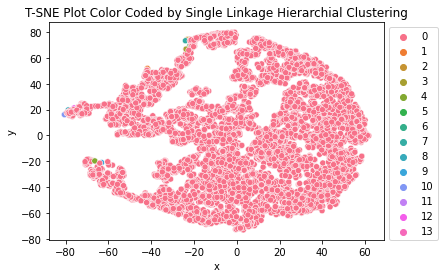

In [ ]:
tdf35 = tsne_df(XDF=X, DF=mdf, PR=35, RS=1000)
for n in range(2,15):
    ag = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='single')
    Y_pred = ag.fit_predict(hierarch_df)
    df_pred = pd.Series(Y_pred, name='Cluster', index = hierarch_df.index)
    pdff = pd.concat([tdf35,df_pred], axis = 1)

    sns.scatterplot(x = 'x', y = 'y', hue='Cluster', palette=sns.color_palette('husl', n), data = pdff)
    plt.title('T-SNE Plot Color Coded by Single Linkage Hierarchial Clustering')
    plt.legend(bbox_to_anchor = (1,1))
    plt.show()

The second option to be explored was the single linkage over 2-14 different clusters. Firstly, the dendogram is created based on the data (`mdf`) used for the hierarchial clustering. From the dendogram, it is apparent that the relationships/clusters do not provide well-balanced clusters at the 2-4 cluster levels. After around 4 clusters, the dendogram produces really small clusters, which may be more useful for identifying outlier groups in the dataset. From the t-sne plots, it is evident that the agglomerative hierarchial clustering algorithm with single linkage tends to identify only a few observations per cluster. In other words, the single linkage hierarchial clustering is finding outlier cluster groups within the dataset. This means that the algorithm may not be able to identify the main clusters in the dataset. 

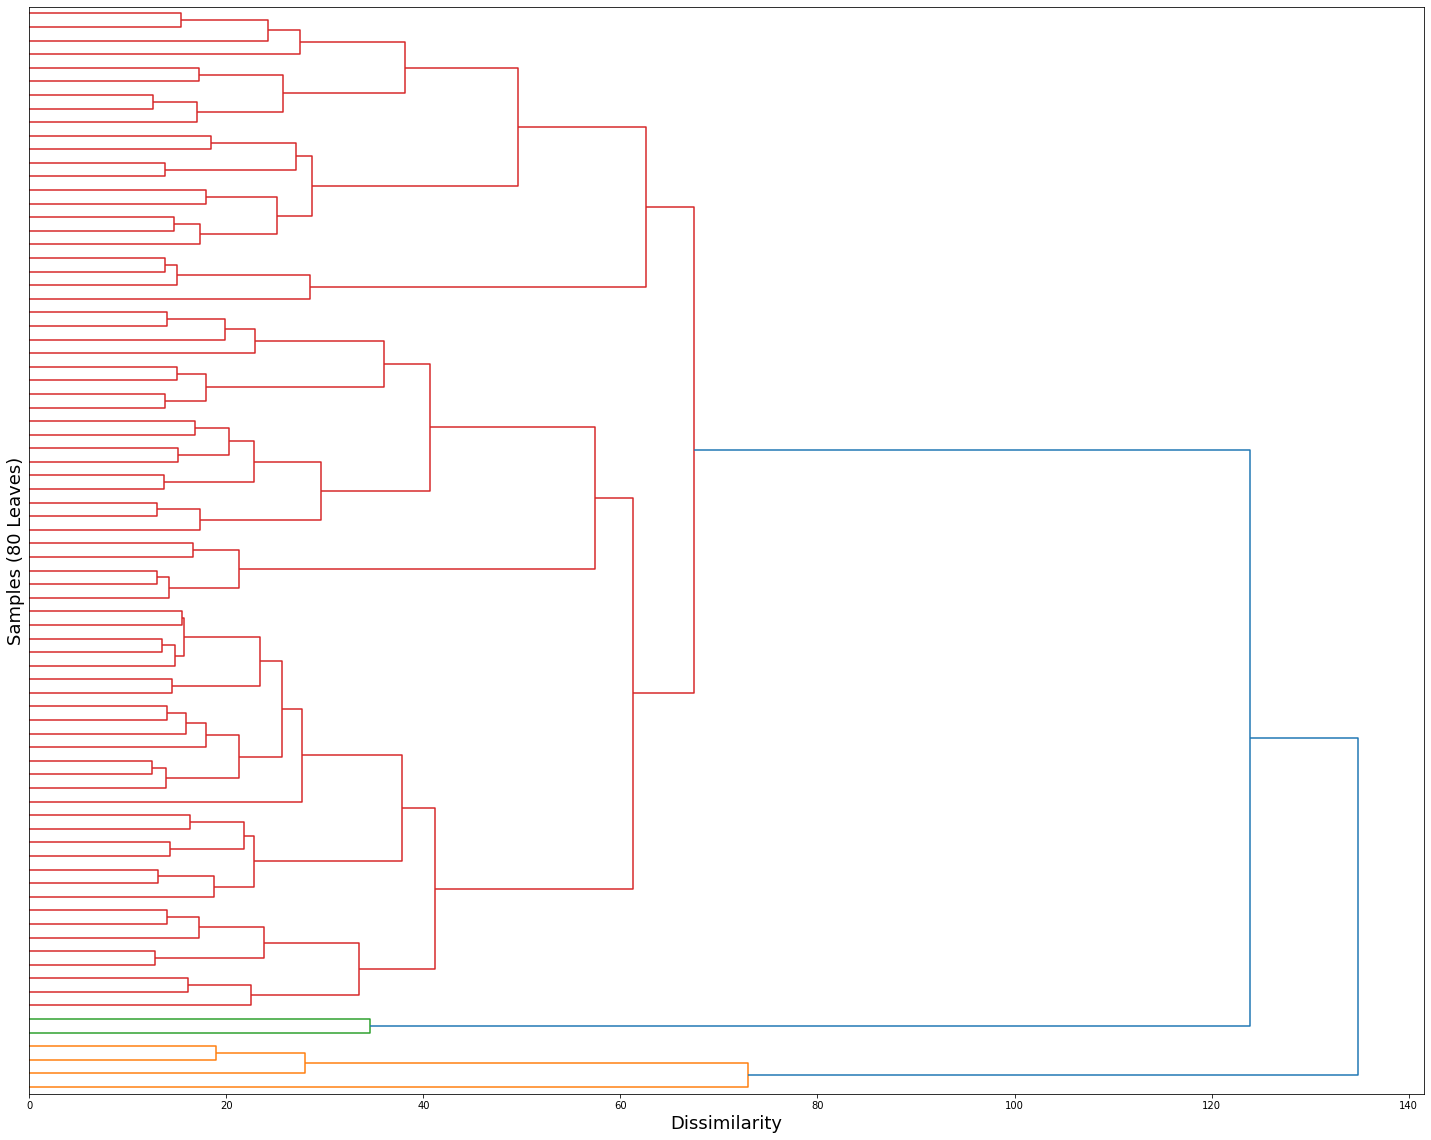

In [ ]:
dm = pdist(hierarch_df,metric='euclidean')
Z = linkage(dm, method='average')
fig,ax = plt.subplots(figsize = (25,20))
d = dendrogram(Z,orientation = 'right', truncate_mode='lastp', p=80, no_labels=True, ax=ax)
ax.set_xlabel('Dissimilarity', fontsize = 18)
ax.set_ylabel('Samples (80 Leaves)', fontsize = 18)
plt.show()

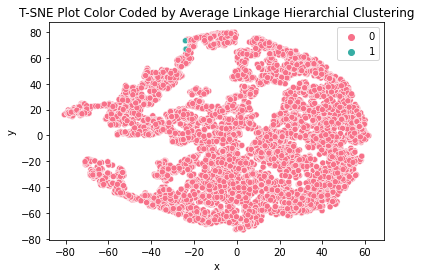

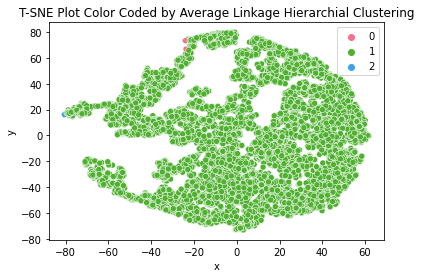

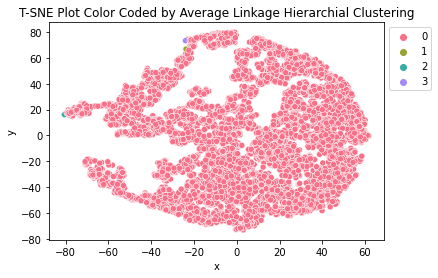

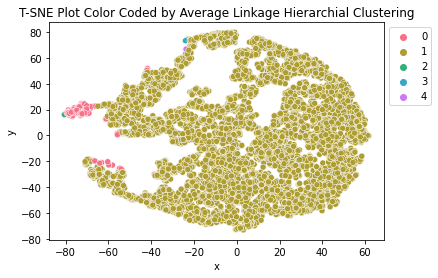

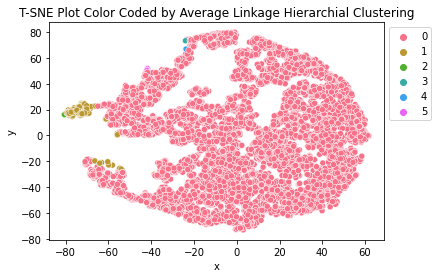

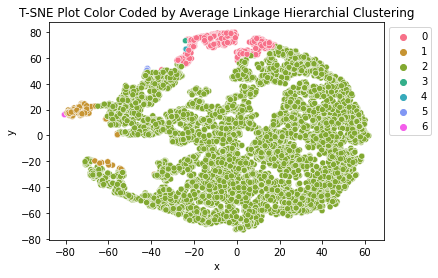

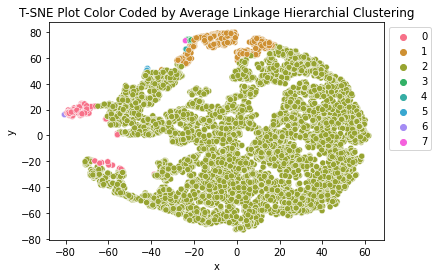

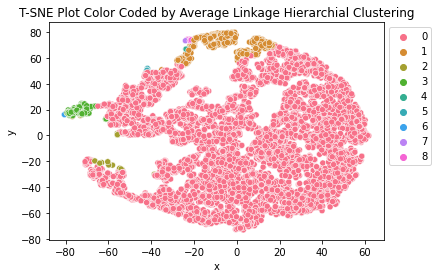

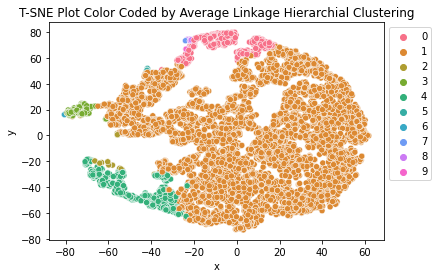

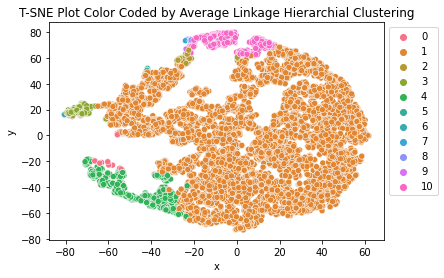

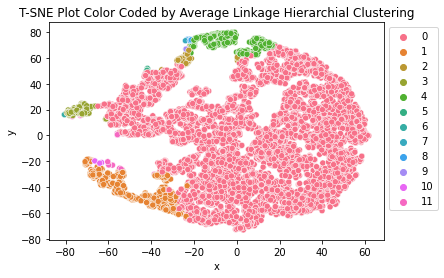

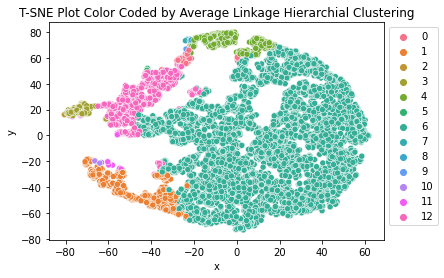

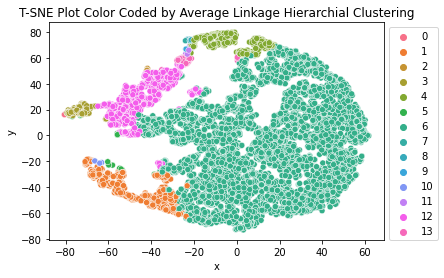

In [ ]:
tdf35 = tsne_df(XDF=X, DF=mdf, PR=35, RS=1000)
for n in range(2,15):
    ag = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='average')
    Y_pred = ag.fit_predict(hierarch_df)
    df_pred = pd.Series(Y_pred, name='Cluster', index = hierarch_df.index)
    pdff = pd.concat([tdf35,df_pred], axis = 1)

    sns.scatterplot(x = 'x', y = 'y', hue='Cluster', palette=sns.color_palette('husl', n), data = pdff)
    plt.title('T-SNE Plot Color Coded by Average Linkage Hierarchial Clustering')
    plt.legend(bbox_to_anchor = (1,1))
    plt.show()

The last option to be explored was the average linkage over 2-14 different clusters. Firstly, the dendogram is created based on the data (`mdf`) used for the hierarchial clustering. From the dendogram, it is apparent that the relationships/clusters are more evenly spread out than that of the single linkage hierarchial clustering, hinting that there is a balanced cluster structure. After around 4 clusters, the dendogram produced really small clusters, which may be more useful for identifying outlier groups in the dataset. From the t-sne plots, it is evident that the agglomerative hierarchial clustering algorithm with average linkage tends to identify only a few observations per cluster. In other words, the single linkage hierarchial clustering is finding outlier cluster groups within the dataset. However, as the cluster number increases to about 10, the clusters made by average linkage start to get larger and the underlying cluster structure of the dataset is brought to light. But,this means that the algorithm may not efficiently be able to identify the main clusters in the dataset. 

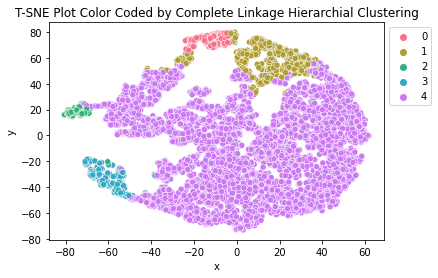

In [ ]:
ag = AgglomerativeClustering(n_clusters= 5, affinity='euclidean', linkage='complete')
Y_pred = ag.fit_predict(hierarch_df)
df_pred = pd.Series(Y_pred, name='Cluster', index = hierarch_df.index)
pdff = pd.concat([tdf35,df_pred], axis = 1)

sns.scatterplot(x = 'x', y = 'y', hue='Cluster', palette=sns.color_palette('husl', 5), data = pdff)
plt.title('T-SNE Plot Color Coded by Complete Linkage Hierarchial Clustering')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

Overall, the options given by the t-sne plots as well as the dendograms provided a large amount of insight into choosing an adequate linkage. After an in-depth analysis, it seems that a complete linkage with 5 clusters produces decently sized clusters for the given dataset. Given the results of the dendogram, the complete linkage tended to have the most balanced lines and clusters, hinting that it would perform more effectively than the other linkages. Additionally, the sizes of each cluster has a large amount of observations in each, implying that more concrete conclusions can be made from the unsupervised learning method. All in all, agglomerative hierarchial clustering with a complete linkage using 5 clusters produces the best visual t-sne and dendogram results and will be used to derive insights from the data.

### K-modes Clustering Algorithm

In [ ]:
cost = []
for num_clusters in list(range(1,10)):
    print(num_clusters)
    cost_sub_list=[]
    for j in range(0,3):
        kmode = KModes(n_clusters=num_clusters)
        kmode.fit_predict(mdf_cat)
        cost_sub_list.append(kmode.cost_)
    cost.append(np.average(cost_sub_list))

1
2
3
4
5
6
7
8
9


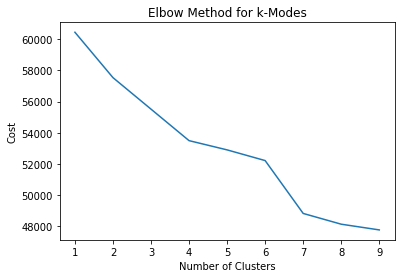

In [ ]:
plt.plot(list(range(1,10)),cost)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method for k-Modes')
plt.show()

Now moving on to the k-modes clustering algorithm, it is necessary to investigate the optimal number of clusters for the unsupervised learning technique. Since, k-modes is optimal for categorical data, it should be especially effective for clustering this dataset. Using a `for` loop, the costs of the k-modes algorithm can be found for a range of clusters. The costs are then plotted to find the elbow plot shown above. Through several iterations, it was found that the elbow was between 4-6 clusters, hinting that anything in that range should yield positive results for the k-modes algorithm. Hence, for this unsupervised learning technique, 5 clusters were chosen for the k-modes algorithm.

In [ ]:
km = KModes(n_clusters=5,random_state=1000)
cluster_labels = km.fit_predict(mdf_cat)
mdf_cat['predicted_cluster']=cluster_labels
mdf_cat['predicted_cluster'].value_counts()

0    5083
4     771
1     632
2     351
3     209
Name: predicted_cluster, dtype: int64

In [ ]:
X_cat = mdf_cat.copy()
X_cat = X_cat.drop('predicted_cluster', axis=1)
tdf_kmode = tsne_df(XDF=X_cat, DF=mdf_cat, PR=35, RS=1000)

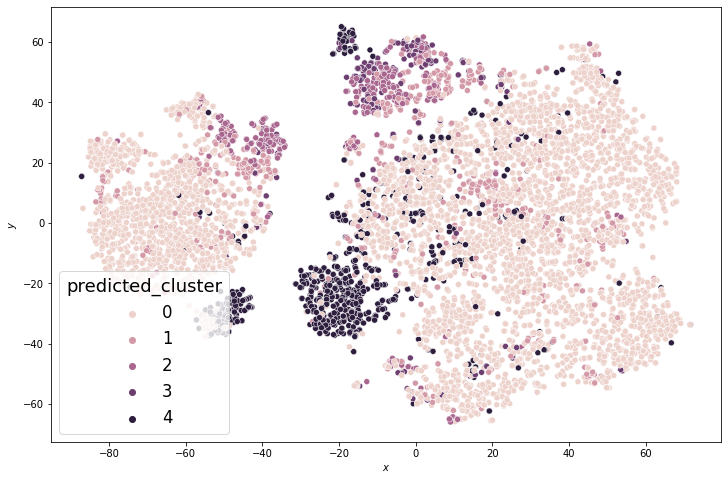

In [ ]:
tsne_plot_hue(DFF=tdf_kmode, W=12, H=8, FS=1.5, HUE = 'predicted_cluster')

From the t-sne plot above, the k-modes algorithm did a suboptimal job in clustering the dataset. For the most part, the clusters are quite spread out with observations protruding into other cluster groups. Additionally, there does not seem to be a lot of cohesion and separation among clusters, which could cause observations to be placed in the wrong cluster labels. However, overall the clusters seem to be pretty defined and each has a large amount of observations, which could yield insightful results.

## 6. Post-Analysis Questions

### Separation and Cohesion

In [ ]:
def create_silhouette_plot(X, cluster_labels):
    #------------------------------------------------------
    #INPUT:
    #-----------------------------------------------------
    #X=dataframe of objects you clusterted
    #cluster_labels=cluster labels of each of the objects in the dataset X that you just clustered 

    #Gets the unique labels in the cluster_labels
    clabels=np.unique(cluster_labels)
    #Gets the number of unique labels
    k=len(clabels)
    
    #-------------------------------------------------------
    #SETTING UP THE PLOT SPACE
    # Create a subplot with 1 row and 1 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (k+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    #FINDS THE SILHOUETTE SCORE FOR EACH OBJECT
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10

    
    for i in clabels:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    plt.show()

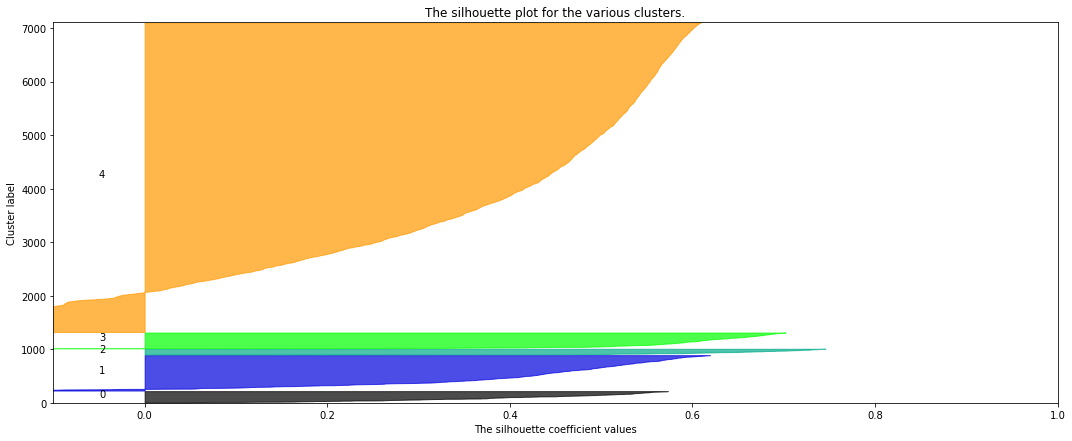

In [ ]:
ag = AgglomerativeClustering(n_clusters= 5, affinity='euclidean', linkage='complete')
Y_pred = ag.fit_predict(hierarch_df)
create_silhouette_plot(hierarch_df, Y_pred)

From the silhouette plot above, it is apparent that each cluster from the agglomerative hierarchial clustering with complete linkage and 5 clusters had very good silhouette scores. In fact, most of the scores were positive and closer to 1 (most were greater than or equalled to 0.5), which hints that there is better separation and cohesion in the assigned clusters. There seems to be a large number of points in the cluster 4 that have negative silhouette scores, meaning that they are less cohesive and less separated from the other observations in the other clusters. Overall, the agglomerative hierarchial clustering with complete linkage provided very cohesive and well separated clusters.

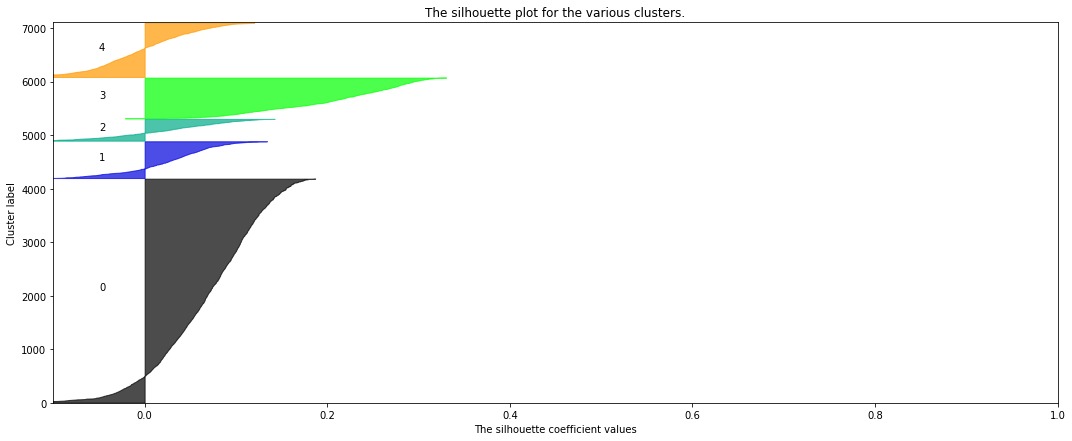

In [ ]:
km = KModes(n_clusters=5,random_state=1000)
cluster_labels = km.fit_predict(mdf_cat)
create_silhouette_plot(mdf_cat, cluster_labels)

From the silhouette plot above, it is apparent that each cluster from the k-modes clustering algorithm with 5 clusters had very mediocre silhouette scores. In fact, most of the scores were positive but were much closer to 0 than 1 (most were less than 0.4). This means that the clusters were very averagely cohesive and separated with respect to the dataset. Each of the clusters had numerous observations that dipped into a negative silhouette score, which is indicative of poor cohesion and separation. This isn't too appalling as the t-sne plots showed how spread out each cluster was and how it interfered with other clusters in the dataset. Overall, the k-modes clustering with 5 clusters provided very average cohesion and separation. 

### Cluster Attributes

predicted_cluster    0    1    2    3     4
Netflix                                    
0                  125  388  109  216  4599
1                   84  274    0   77  1174
predicted_cluster         0         1    2         3        4
Netflix                                                      
0                  0.598086  0.586103  1.0  0.737201  0.79664
1                  0.401914  0.413897  0.0  0.262799  0.20336


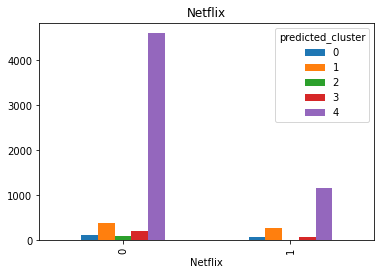

predicted_cluster    0    1    2    3     4
Hulu                                       
0                  204  610  109  281  5275
1                    5   52    0   12   498
predicted_cluster         0        1    2         3         4
Hulu                                                         
0                  0.976077  0.92145  1.0  0.959044  0.913736
1                  0.023923  0.07855  0.0  0.040956  0.086264


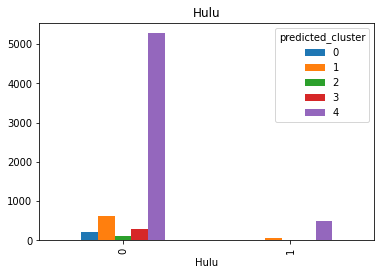

predicted_cluster    0    1   2    3     4
Prime Video                               
0                   81  323  18  110  1753
1                  128  339  91  183  4020
predicted_cluster        0         1         2         3         4
Prime Video                                                       
0                  0.38756  0.487915  0.165138  0.375427  0.303655
1                  0.61244  0.512085  0.834862  0.624573  0.696345


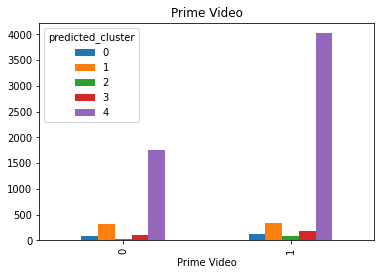

predicted_cluster    0    1   2    3     4
Disney+                                   
0                  203  609  91  264  5390
1                    6   53  18   29   383
predicted_cluster         0        1         2         3         4
Disney+                                                           
0                  0.971292  0.91994  0.834862  0.901024  0.933657
1                  0.028708  0.08006  0.165138  0.098976  0.066343


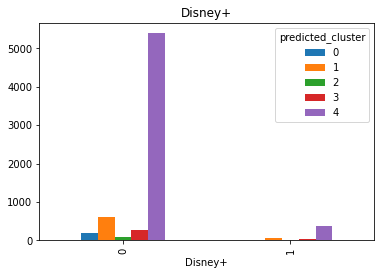

predicted_cluster   0    1   2    3     4
Total Genres                             
0                  20   78  16  116  1312
1                  49  180  28   92  1699
2                  81  231  27   37  1468
3                  44  116  20   22   739
4                  12   47  14   14   362
5                   2    6   3    7   147
6                   1    4   1    3    35
7                   0    0   0    2    11
predicted_cluster         0         1         2         3         4
Total Genres                                                       
0                  0.095694  0.117825  0.146789  0.395904  0.227265
1                  0.234450  0.271903  0.256881  0.313993  0.294301
2                  0.387560  0.348943  0.247706  0.126280  0.254287
3                  0.210526  0.175227  0.183486  0.075085  0.128010
4                  0.057416  0.070997  0.128440  0.047782  0.062706
5                  0.009569  0.009063  0.027523  0.023891  0.025463
6                  0.004785  0.00604

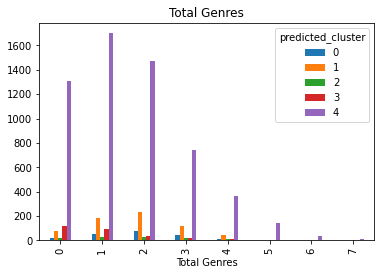

predicted_cluster    0    1    2    3     4
Total Countries                            
0                  186  472  103  264  4497
1                   16   95    5   25   900
2                    5   58    1    4   232
3                    1   24    0    0    86
4                    1    7    0    0    32
5                    0    4    0    0    13
6                    0    2    0    0     6
7                    0    0    0    0     1
8                    0    0    0    0     2
9                    0    0    0    0     1
10                   0    0    0    0     1
11                   0    0    0    0     1
12                   0    0    0    0     1
predicted_cluster         0         1         2         3         4
Total Countries                                                    
0                  0.889952  0.712991  0.944954  0.901024  0.778971
1                  0.076555  0.143505  0.045872  0.085324  0.155898
2                  0.023923  0.087613  0.009174  0.013652  0.040187


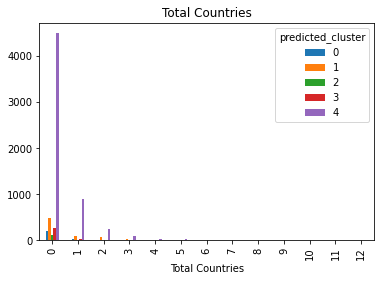

predicted_cluster    0    1    2    3     4
Total Languages                            
0                  130  417  101  271  4733
1                   42  131    7   17   721
2                   17   66    0    5   216
3                   12   27    1    0    70
4                    5   10    0    0    24
5                    1    5    0    0     6
6                    1    3    0    0     1
7                    0    3    0    0     2
8                    1    0    0    0     0
predicted_cluster         0         1         2         3         4
Total Languages                                                    
0                  0.622010  0.629909  0.926606  0.924915  0.819851
1                  0.200957  0.197885  0.064220  0.058020  0.124892
2                  0.081340  0.099698  0.000000  0.017065  0.037416
3                  0.057416  0.040785  0.009174  0.000000  0.012125
4                  0.023923  0.015106  0.000000  0.000000  0.004157
5                  0.004785  0.007553  0

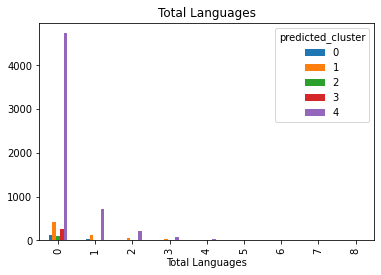

predicted_cluster    0    1   2    3     4
Total Directors                           
0                  197  633  94  245  5222
1                    9   23   8   42   467
2                    2    2   3    5    57
3                    1    1   1    1     9
4                    0    1   1    0     4
5                    0    0   1    0     0
6                    0    0   0    0     4
7                    0    0   1    0     1
8                    0    0   0    0     1
9                    0    0   0    0     3
10                   0    1   0    0     2
11                   0    1   0    0     3
predicted_cluster         0         1         2         3         4
Total Directors                                                    
0                  0.942584  0.956193  0.862385  0.836177  0.904556
1                  0.043062  0.034743  0.073394  0.143345  0.080894
2                  0.009569  0.003021  0.027523  0.017065  0.009874
3                  0.004785  0.001511  0.009174  0.003413 

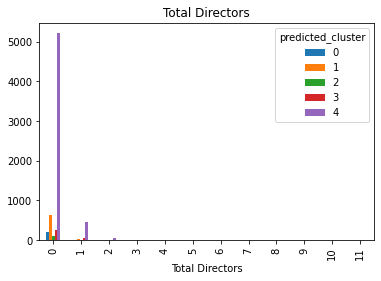

predicted_cluster    0    1    2    3     4
Age_13+                                    
0                  155  483  105  261  4850
1                   54  179    4   32   923
predicted_cluster         0         1         2         3         4
Age_13+                                                            
0                  0.741627  0.729607  0.963303  0.890785  0.840118
1                  0.258373  0.270393  0.036697  0.109215  0.159882


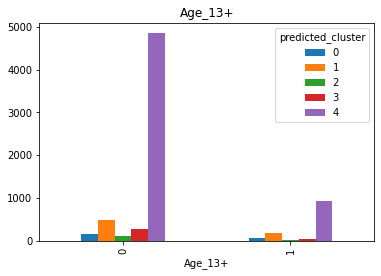

predicted_cluster    0    1    2    3     4
Age_16+                                    
0                  204  647  109  277  5504
1                    5   15    0   16   269
predicted_cluster         0         1    2         3         4
Age_16+                                                       
0                  0.976077  0.977341  1.0  0.945392  0.953404
1                  0.023923  0.022659  0.0  0.054608  0.046596


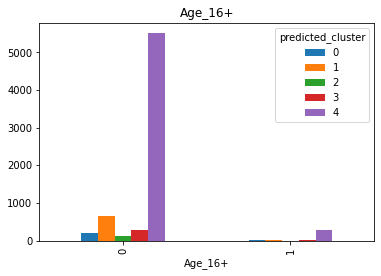

predicted_cluster    0    1    2    3     4
Age_18+                                    
0                  164  379  108  187  2845
1                   45  283    1  106  2928
predicted_cluster         0         1         2         3         4
Age_18+                                                            
0                  0.784689  0.572508  0.990826  0.638225  0.492811
1                  0.215311  0.427492  0.009174  0.361775  0.507189


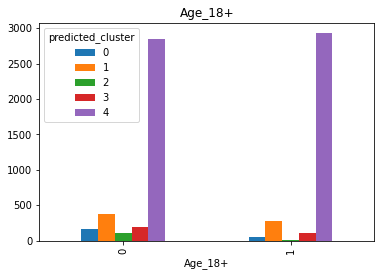

predicted_cluster    0    1   2    3     4
Age_7+                                    
0                  144  539  78  228  4661
1                   65  123  31   65  1112
predicted_cluster         0         1         2         3         4
Age_7+                                                             
0                  0.688995  0.814199  0.715596  0.778157  0.807379
1                  0.311005  0.185801  0.284404  0.221843  0.192621


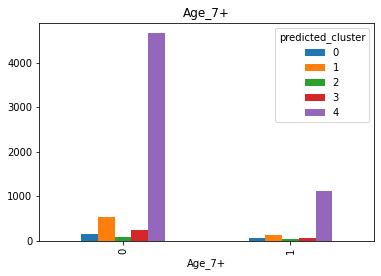

predicted_cluster    0    1   2    3     4
Age_all                                   
0                  169  600  36  219  5232
1                   40   62  73   74   541
predicted_cluster         0         1         2        3         4
Age_all                                                           
0                  0.808612  0.906344  0.330275  0.74744  0.906288
1                  0.191388  0.093656  0.669725  0.25256  0.093712


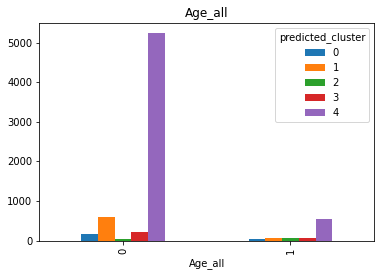

predicted_cluster    0    1   2    3     4
Action                                    
0                  137  494  85  274  4649
1                   72  168  24   19  1124
predicted_cluster         0         1         2         3         4
Action                                                             
0                  0.655502  0.746224  0.779817  0.935154  0.805301
1                  0.344498  0.253776  0.220183  0.064846  0.194699


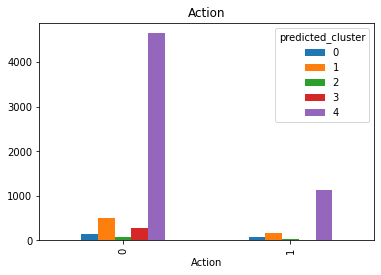

predicted_cluster    0    1   2    3     4
Adventure                                 
0                  191  575  83  268  4913
1                   18   87  26   25   860
predicted_cluster         0        1         2         3         4
Adventure                                                         
0                  0.913876  0.86858  0.761468  0.914676  0.851031
1                  0.086124  0.13142  0.238532  0.085324  0.148969


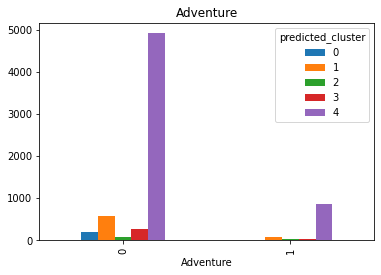

predicted_cluster    0    1    2    3     4
Sci-Fi                                     
0                  200  600  101  286  5177
1                    9   62    8    7   596
predicted_cluster         0         1         2         3         4
Sci-Fi                                                             
0                  0.956938  0.906344  0.926606  0.976109  0.896761
1                  0.043062  0.093656  0.073394  0.023891  0.103239


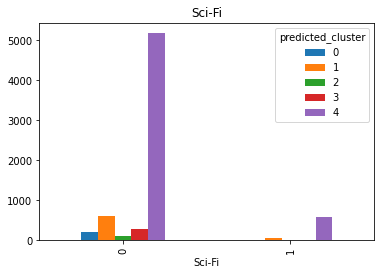

predicted_cluster    0    1   2    3     4
Thriller                                  
0                  166  510  94  283  4269
1                   43  152  15   10  1504
predicted_cluster         0         1         2        3         4
Thriller                                                          
0                  0.794258  0.770393  0.862385  0.96587  0.739477
1                  0.205742  0.229607  0.137615  0.03413  0.260523


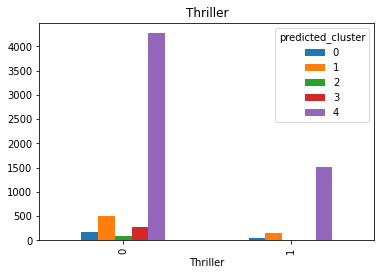

predicted_cluster    0    1   2    3     4
Comedy                                    
0                  144  475  76  157  3903
1                   65  187  33  136  1870
predicted_cluster         0         1         2         3         4
Comedy                                                             
0                  0.688995  0.717523  0.697248  0.535836  0.676078
1                  0.311005  0.282477  0.302752  0.464164  0.323922


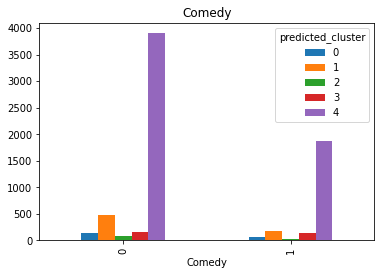

predicted_cluster    0    1   2    3     4
Western                                   
0                  205  635  70  292  5649
1                    4   27  39    1   124
predicted_cluster         0         1         2         3         4
Western                                                            
0                  0.980861  0.959215  0.642202  0.996587  0.978521
1                  0.019139  0.040785  0.357798  0.003413  0.021479


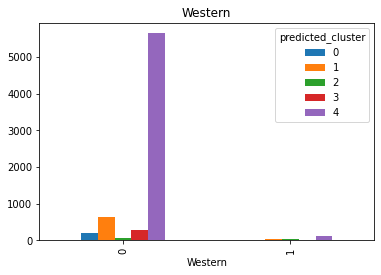

predicted_cluster    0    1   2    3     4
Animation                                 
0                  208  655  97  237  5412
1                    1    7  12   56   361
predicted_cluster         0         1         2         3         4
Animation                                                          
0                  0.995215  0.989426  0.889908  0.808874  0.937468
1                  0.004785  0.010574  0.110092  0.191126  0.062532


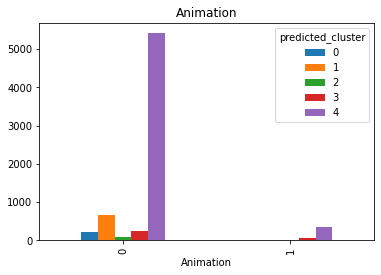

predicted_cluster    0    1   2    3     4
Family                                    
0                  193  619  85  235  4940
1                   16   43  24   58   833
predicted_cluster         0         1         2         3         4
Family                                                             
0                  0.923445  0.935045  0.779817  0.802048  0.855708
1                  0.076555  0.064955  0.220183  0.197952  0.144292


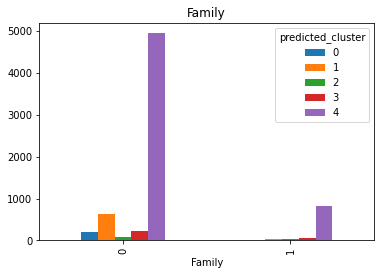

predicted_cluster    0    1    2    3     4
Biography                                  
0                  193  574  107  283  5514
1                   16   88    2   10   259
predicted_cluster         0         1         2        3         4
Biography                                                         
0                  0.923445  0.867069  0.981651  0.96587  0.955136
1                  0.076555  0.132931  0.018349  0.03413  0.044864


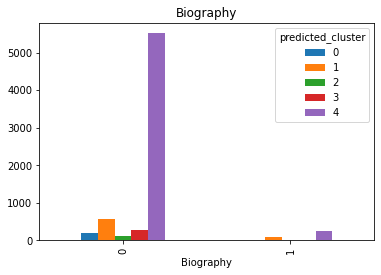

predicted_cluster    0    1   2    3     4
Drama                                     
0                   46  203  71  264  3232
1                  163  459  38   29  2541
predicted_cluster         0         1         2         3         4
Drama                                                              
0                  0.220096  0.306647  0.651376  0.901024  0.559848
1                  0.779904  0.693353  0.348624  0.098976  0.440152


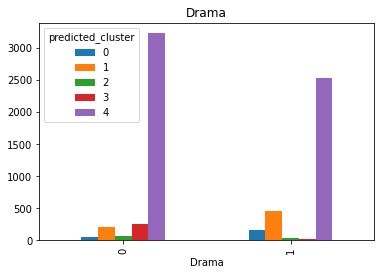

predicted_cluster    0    1   2    3     4
Music                                     
0                  203  637  96  279  5578
1                    6   25  13   14   195
predicted_cluster         0         1         2         3         4
Music                                                              
0                  0.971292  0.962236  0.880734  0.952218  0.966222
1                  0.028708  0.037764  0.119266  0.047782  0.033778


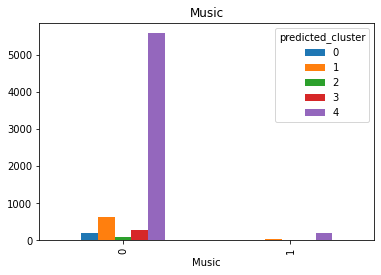

predicted_cluster    0    1    2    3     4
War                                        
0                  194  600  105  289  5623
1                   15   62    4    4   150
predicted_cluster        0         1         2         3         4
War                                                               
0                  0.92823  0.906344  0.963303  0.986348  0.974017
1                  0.07177  0.093656  0.036697  0.013652  0.025983


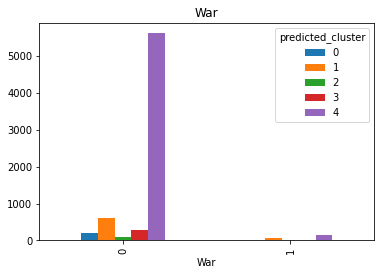

predicted_cluster    0    1   2    3     4
Crime                                     
0                  182  564  98  283  5012
1                   27   98  11   10   761
predicted_cluster         0         1         2        3         4
Crime                                                             
0                  0.870813  0.851964  0.899083  0.96587  0.868179
1                  0.129187  0.148036  0.100917  0.03413  0.131821


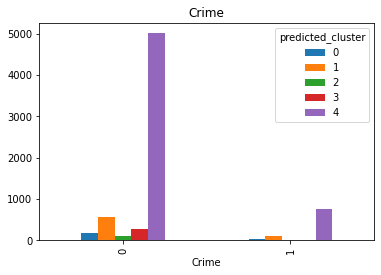

predicted_cluster    0    1   2    3     4
Fantasy                                   
0                  197  620  95  272  5202
1                   12   42  14   21   571
predicted_cluster         0         1        2         3         4
Fantasy                                                           
0                  0.942584  0.936556  0.87156  0.928328  0.901091
1                  0.057416  0.063444  0.12844  0.071672  0.098909


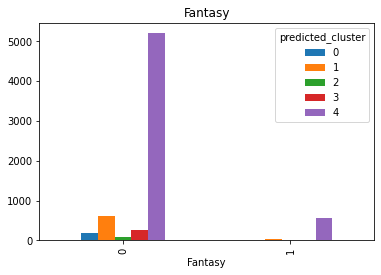

predicted_cluster    0    1   2    3     4
Romance                                   
0                  132  500  87  287  4984
1                   77  162  22    6   789
predicted_cluster         0         1         2         3         4
Romance                                                            
0                  0.631579  0.755287  0.798165  0.979522  0.863329
1                  0.368421  0.244713  0.201835  0.020478  0.136671


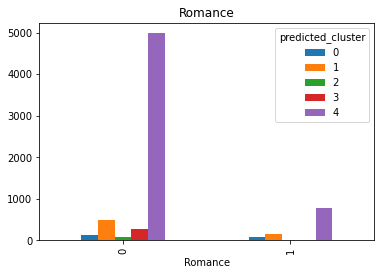

predicted_cluster    0    1    2    3     4
History                                    
0                  190  593  107  279  5610
1                   19   69    2   14   163
predicted_cluster         0        1         2         3         4
History                                                           
0                  0.909091  0.89577  0.981651  0.952218  0.971765
1                  0.090909  0.10423  0.018349  0.047782  0.028235


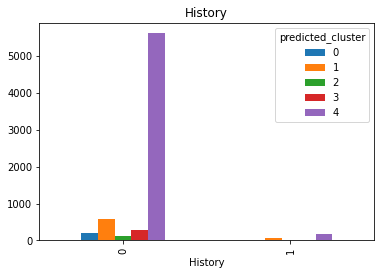

predicted_cluster    0    1   2    3     4
Mystery                                   
0                  199  606  99  289  5264
1                   10   56  10    4   509
predicted_cluster         0         1         2         3         4
Mystery                                                            
0                  0.952153  0.915408  0.908257  0.986348  0.911831
1                  0.047847  0.084592  0.091743  0.013652  0.088169


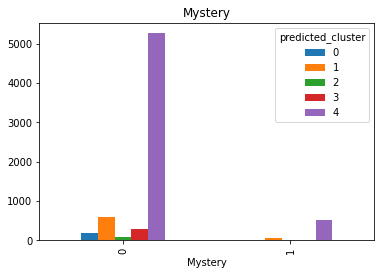

predicted_cluster    0    1    2    3     4
Sport                                      
0                  202  634  107  287  5612
1                    7   28    2    6   161
predicted_cluster         0         1         2         3         4
Sport                                                              
0                  0.966507  0.957704  0.981651  0.979522  0.972112
1                  0.033493  0.042296  0.018349  0.020478  0.027888


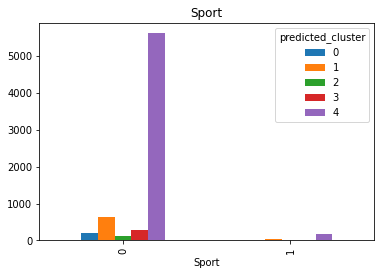

predicted_cluster    0    1    2    3     4
Documentary                                
0                  207  643  102  157  5247
1                    2   19    7  136   526
predicted_cluster         0         1        2         3         4
Documentary                                                       
0                  0.990431  0.971299  0.93578  0.535836  0.908886
1                  0.009569  0.028701  0.06422  0.464164  0.091114


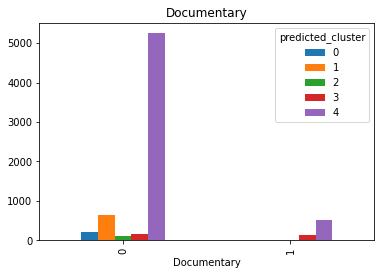

predicted_cluster    0    1    2    3     4
Musical                                    
0                  179  638  101  282  5642
1                   30   24    8   11   131
predicted_cluster         0         1         2         3         4
Musical                                                            
0                  0.856459  0.963746  0.926606  0.962457  0.977308
1                  0.143541  0.036254  0.073394  0.037543  0.022692


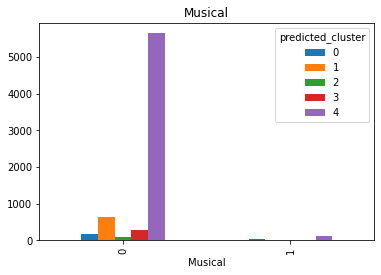

predicted_cluster    0    1    2    3     4
News                                       
0                  209  660  109  293  5746
1                    0    2    0    0    27
predicted_cluster    0         1    2    3         4
News                                                
0                  1.0  0.996979  1.0  1.0  0.995323
1                  0.0  0.003021  0.0  0.0  0.004677


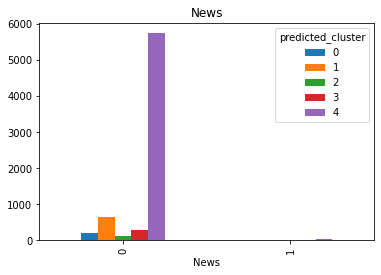

predicted_cluster    0    1    2    3     4
Horror                                     
0                  205  635  100  293  4737
1                    4   27    9    0  1036
predicted_cluster         0         1         2    3         4
Horror                                                        
0                  0.980861  0.959215  0.917431  1.0  0.820544
1                  0.019139  0.040785  0.082569  0.0  0.179456


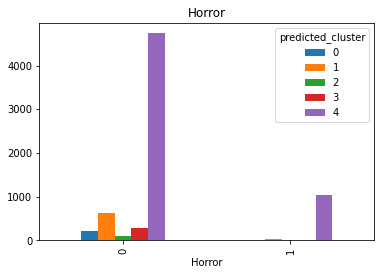

predicted_cluster    0    1    2    3     4
Short                                      
0                  209  662  107  222  5773
1                    0    0    2   71     0
predicted_cluster    0    1         2         3    4
Short                                               
0                  1.0  1.0  0.981651  0.757679  1.0
1                  0.0  0.0  0.018349  0.242321  0.0


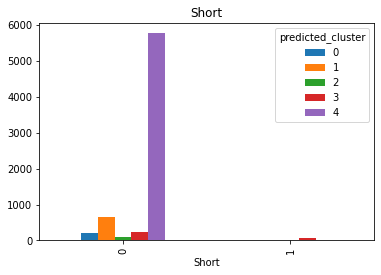

predicted_cluster    0    1    2    3     4
Film-Noir                                  
0                  209  662  106  293  5770
1                    0    0    3    0     3
predicted_cluster    0    1         2    3        4
Film-Noir                                          
0                  1.0  1.0  0.972477  1.0  0.99948
1                  0.0  0.0  0.027523  0.0  0.00052


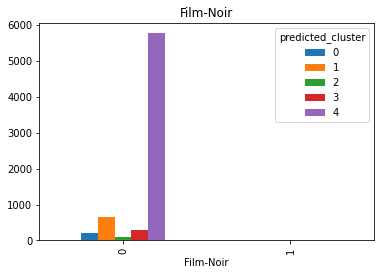

predicted_cluster    0    1    2    3     4
Reality-TV                                 
0                  209  662  109  293  5772
1                    0    0    0    0     1
predicted_cluster    0    1    2    3         4
Reality-TV                                     
0                  1.0  1.0  1.0  1.0  0.999827
1                  0.0  0.0  0.0  0.0  0.000173


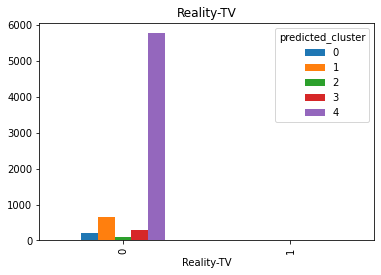

predicted_cluster    0    1    2    3     4
North America                              
0                  162  287    8   48  1142
1                   47  375  101  245  4631
predicted_cluster        0         1         2         3         4
North America                                                     
0                  0.77512  0.433535  0.073394  0.163823  0.197817
1                  0.22488  0.566465  0.926606  0.836177  0.802183


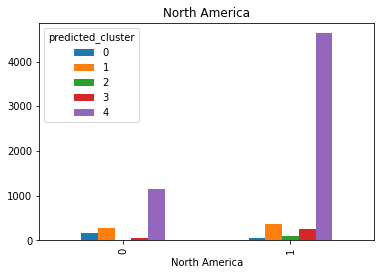

predicted_cluster    0    1    2    3     4
South America                              
0                  209  654  109  292  5715
1                    0    8    0    1    58
predicted_cluster    0         1    2         3         4
South America                                            
0                  1.0  0.987915  1.0  0.996587  0.989953
1                  0.0  0.012085  0.0  0.003413  0.010047


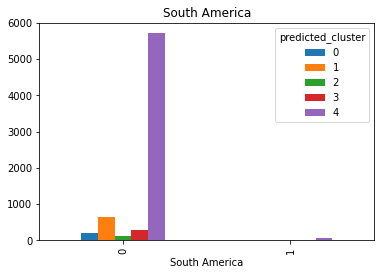

predicted_cluster    0    1    2    3     4
Europe                                     
0                  179  472  100  244  4464
1                   30  190    9   49  1309
predicted_cluster         0         1         2         3         4
Europe                                                             
0                  0.856459  0.712991  0.917431  0.832765  0.773255
1                  0.143541  0.287009  0.082569  0.167235  0.226745


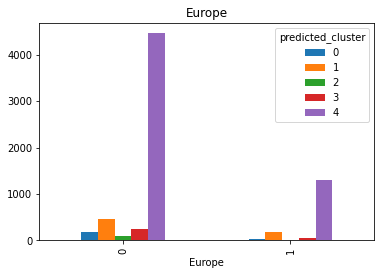

predicted_cluster    0    1    2    3     4
Asia                                       
0                   60  435  108  277  5269
1                  149  227    1   16   504
predicted_cluster         0       1         2         3         4
Asia                                                             
0                  0.287081  0.6571  0.990826  0.945392  0.912697
1                  0.712919  0.3429  0.009174  0.054608  0.087303


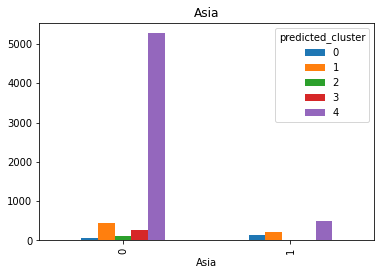

predicted_cluster        0    1    2    3     4
Australia and Pacific                          
0                      207  650  109  293  5602
1                        2   12    0    0   171
predicted_cluster             0         1    2    3         4
Australia and Pacific                                        
0                      0.990431  0.981873  1.0  1.0  0.970379
1                      0.009569  0.018127  0.0  0.0  0.029621


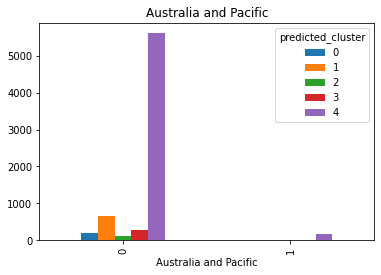

predicted_cluster    0    1    2    3     4
Africa                                     
0                  209  654  108  293  5720
1                    0    8    1    0    53
predicted_cluster    0         1         2    3         4
Africa                                                   
0                  1.0  0.987915  0.990826  1.0  0.990819
1                  0.0  0.012085  0.009174  0.0  0.009181


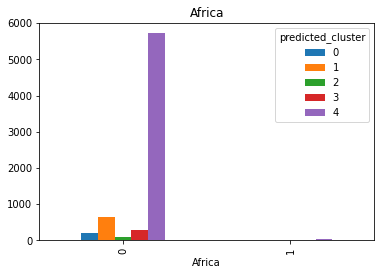

predicted_cluster    0    1    2    3     4
English                                    
0                  127  196    4   12   488
1                   82  466  105  281  5285
predicted_cluster         0         1         2         3         4
English                                                            
0                  0.607656  0.296073  0.036697  0.040956  0.084531
1                  0.392344  0.703927  0.963303  0.959044  0.915469


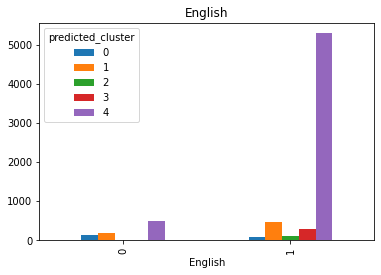

predicted_cluster    0    1    2    3     4
French                                     
0                  188  584  105  290  5495
1                   21   78    4    3   278
predicted_cluster         0         1         2         3         4
French                                                             
0                  0.899522  0.882175  0.963303  0.989761  0.951845
1                  0.100478  0.117825  0.036697  0.010239  0.048155


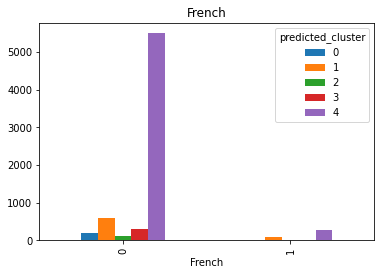

predicted_cluster    0    1    2    3     4
Spanish                                    
0                  200  599  107  291  5440
1                    9   63    2    2   333
predicted_cluster         0         1         2         3         4
Spanish                                                            
0                  0.956938  0.904834  0.981651  0.993174  0.942318
1                  0.043062  0.095166  0.018349  0.006826  0.057682


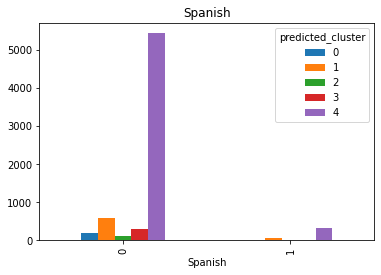

predicted_cluster    0    1    2    3     4
Arabic                                     
0                  207  651  109  290  5718
1                    2   11    0    3    55
predicted_cluster         0         1    2         3         4
Arabic                                                        
0                  0.990431  0.983384  1.0  0.989761  0.990473
1                  0.009569  0.016616  0.0  0.010239  0.009527


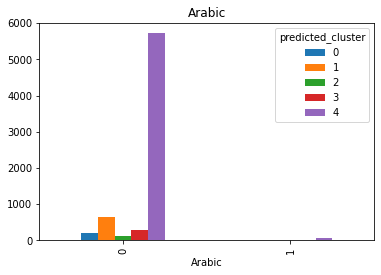

predicted_cluster    0    1    2    3     4
Portuguese                                 
0                  208  654  109  292  5742
1                    1    8    0    1    31
predicted_cluster         0         1    2         3        4
Portuguese                                                   
0                  0.995215  0.987915  1.0  0.996587  0.99463
1                  0.004785  0.012085  0.0  0.003413  0.00537


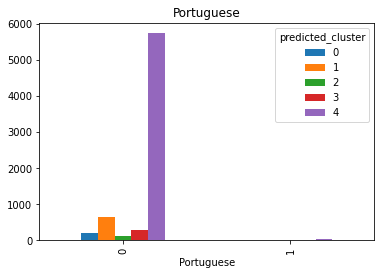

predicted_cluster    0    1    2    3     4
North American                             
0                  209  659  109  293  5758
1                    0    3    0    0    15
predicted_cluster    0         1    2    3         4
North American                                      
0                  1.0  0.995468  1.0  1.0  0.997402
1                  0.0  0.004532  0.0  0.0  0.002598


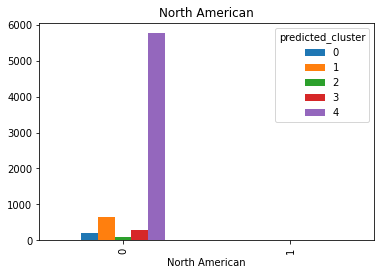

predicted_cluster    0    1    2    3     4
South American                             
0                  209  660  109  293  5770
1                    0    2    0    0     3
predicted_cluster    0         1    2    3        4
South American                                     
0                  1.0  0.996979  1.0  1.0  0.99948
1                  0.0  0.003021  0.0  0.0  0.00052


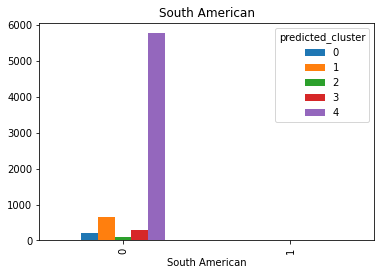

predicted_cluster    0    1    2    3     4
European                                   
0                  177  542  104  281  5283
1                   32  120    5   12   490
predicted_cluster        0         1         2         3         4
European                                                          
0                  0.84689  0.818731  0.954128  0.959044  0.915122
1                  0.15311  0.181269  0.045872  0.040956  0.084878


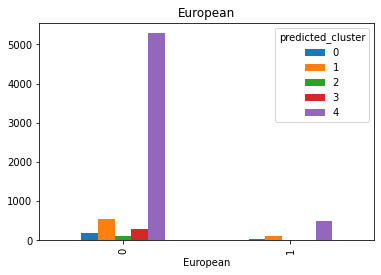

predicted_cluster    0    1    2    3     4
Asian                                      
0                   52  420  108  282  5257
1                  157  242    1   11   516
predicted_cluster         0         1         2         3         4
Asian                                                              
0                  0.248804  0.634441  0.990826  0.962457  0.910618
1                  0.751196  0.365559  0.009174  0.037543  0.089382


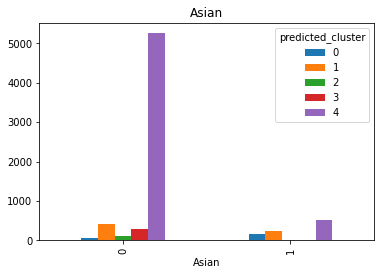

predicted_cluster         0    1    2    3     4
Australian and Pacific                          
0                       209  659  109  292  5765
1                         0    3    0    1     8
predicted_cluster         0         1    2         3         4
Australian and Pacific                                        
0                       1.0  0.995468  1.0  0.996587  0.998614
1                       0.0  0.004532  0.0  0.003413  0.001386


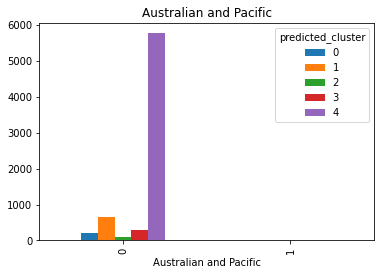

predicted_cluster    0    1    2    3     4
African                                    
0                  207  657  109  293  5753
1                    2    5    0    0    20
predicted_cluster         0         1    2    3         4
African                                                  
0                  0.990431  0.992447  1.0  1.0  0.996536
1                  0.009569  0.007553  0.0  0.0  0.003464


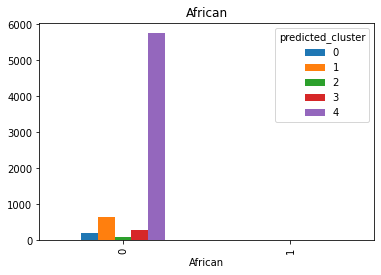

predicted_cluster    0    1    2    3     4
Sign Lang.                                 
0                  207  658  108  289  5758
1                    2    4    1    4    15
predicted_cluster         0         1         2         3         4
Sign Lang.                                                         
0                  0.990431  0.993958  0.990826  0.986348  0.997402
1                  0.009569  0.006042  0.009174  0.013652  0.002598


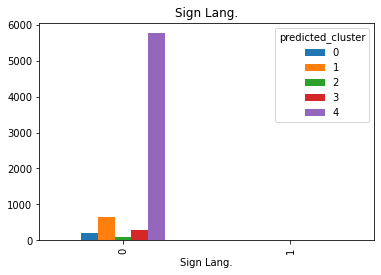

predicted_cluster    0    1    2    3     4
Other                                      
0                  208  661  108  290  5767
1                    1    1    1    3     6
predicted_cluster         0         1         2         3         4
Other                                                              
0                  0.995215  0.998489  0.990826  0.989761  0.998961
1                  0.004785  0.001511  0.009174  0.010239  0.001039


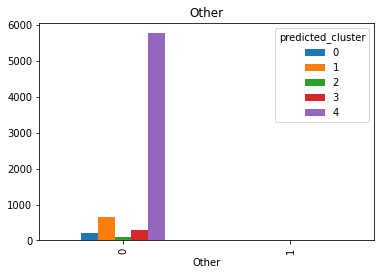

predicted_cluster    0    1   2    3     4
runtime_bin                               
0                    0    0  97  293  1396
1                  209  662   0    0   863
2                    0    0   6    0  1964
3                    0    0   6    0  1550
predicted_cluster    0    1         2    3         4
runtime_bin                                         
0                  0.0  0.0  0.889908  1.0  0.241815
1                  1.0  1.0  0.000000  0.0  0.149489
2                  0.0  0.0  0.055046  0.0  0.340204
3                  0.0  0.0  0.055046  0.0  0.268491


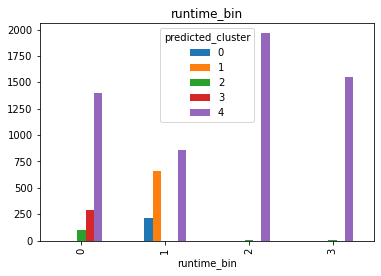

predicted_cluster   0    1   2    3     4
move_age_bin                             
0                  92  371   0  198  2982
1                  78  188   0   70  1253
2                   1    0   1    0     0
3                   0    0   1    0     0
4                  22   28   0   10   567
5                   5   23   0   11   417
6                   6   24   1    3   470
7                   3   19  10    1    68
8                   1    0  30    0    14
9                   0    7  31    0     2
10                  1    0  33    0     0
11                  0    2   2    0     0
predicted_cluster         0         1         2         3         4
move_age_bin                                                       
0                  0.440191  0.560423  0.000000  0.675768  0.516543
1                  0.373206  0.283988  0.000000  0.238908  0.217045
2                  0.004785  0.000000  0.009174  0.000000  0.000000
3                  0.000000  0.000000  0.009174  0.000000  0.000000
4   

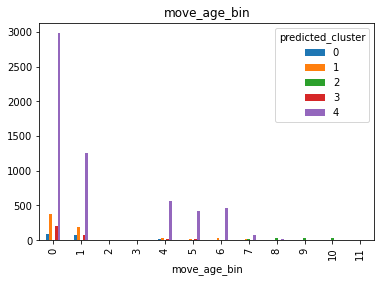

predicted_cluster   0    1   2   3     4
imdb_bin                                
0                   0    0   0   0     1
1                   0    0   0   1    21
2                   2    7   0   2   204
3                   3   15   5   9   475
4                  13   39  18  17   959
5                  35  123  29  57  1557
6                  57  229  35  85  1688
7                  66  220  20  99   779
8                  33   29   2  22    89
9                   0    0   0   1     0
predicted_cluster         0         1         2         3         4
imdb_bin                                                           
0                  0.000000  0.000000  0.000000  0.000000  0.000173
1                  0.000000  0.000000  0.000000  0.003413  0.003638
2                  0.009569  0.010574  0.000000  0.006826  0.035337
3                  0.014354  0.022659  0.045872  0.030717  0.082280
4                  0.062201  0.058912  0.165138  0.058020  0.166118
5                  0.167464  0.1

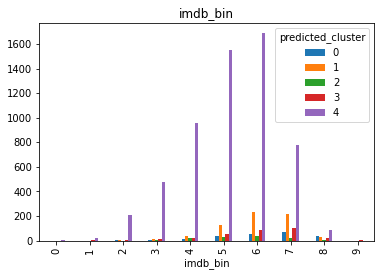

predicted_cluster    0    1    2    3     4
predicted_cluster                          
0                  209    0    0    0     0
1                    0  662    0    0     0
2                    0    0  109    0     0
3                    0    0    0  293     0
4                    0    0    0    0  5773
predicted_cluster    0    1    2    3    4
predicted_cluster                         
0                  1.0  0.0  0.0  0.0  0.0
1                  0.0  1.0  0.0  0.0  0.0
2                  0.0  0.0  1.0  0.0  0.0
3                  0.0  0.0  0.0  1.0  0.0
4                  0.0  0.0  0.0  0.0  1.0


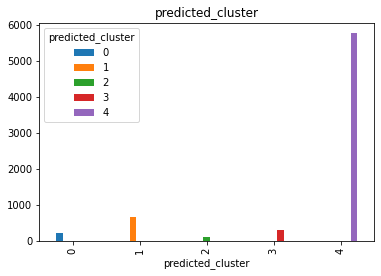

In [ ]:
ag = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
hierarch_df2 = mdf.copy()
hierarch_df2 = hierarch_df2.drop(['Title'], axis = 1)
Y_pred = ag.fit_predict(hierarch_df2)
cluster_labels = Y_pred
mdf_cat['predicted_cluster']=cluster_labels

for i in mdf_cat.columns:
    ctab = pd.crosstab(mdf_cat[i], mdf_cat['predicted_cluster'])
    print(ctab)
    print(ctab / ctab.sum())
    ctab.plot.bar()
    plt.title('{}'.format(i))
    plt.xlabel(i)
    plt.show()

predicted_cluster     0    1    2    3    4
Netflix                                    
0                  3567  552  930  131  257
1                   745  113  216  151  384
predicted_cluster         0         1         2         3         4
Netflix                                                            
0                  0.827226  0.830075  0.811518  0.464539  0.400936
1                  0.172774  0.169925  0.188482  0.535461  0.599064


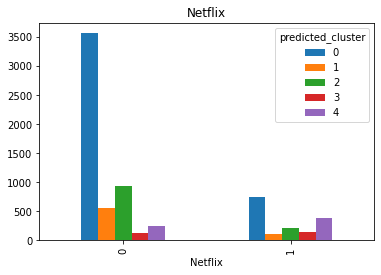

predicted_cluster     0    1     2    3    4
Hulu                                        
0                  3978  603  1039  244  615
1                   334   62   107   38   26
predicted_cluster         0         1         2         3         4
Hulu                                                               
0                  0.922542  0.906767  0.906632  0.865248  0.959438
1                  0.077458  0.093233  0.093368  0.134752  0.040562


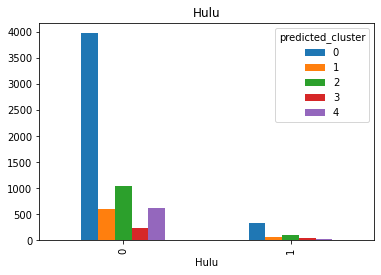

predicted_cluster     0    1    2    3    4
Prime Video                                
0                   896  543  262  228  356
1                  3416  122  884   54  285
predicted_cluster         0         1         2         3         4
Prime Video                                                        
0                  0.207792  0.816541  0.228621  0.808511  0.555382
1                  0.792208  0.183459  0.771379  0.191489  0.444618


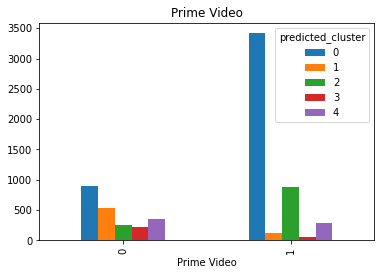

predicted_cluster     0    1     2    3    4
Disney+                                     
0                  4281  282  1131  223  640
1                    31  383    15   59    1
predicted_cluster         0        1         2        3        4
Disney+                                                         
0                  0.992811  0.42406  0.986911  0.79078  0.99844
1                  0.007189  0.57594  0.013089  0.20922  0.00156


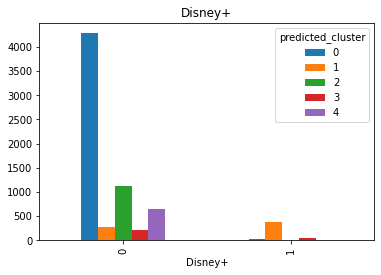

predicted_cluster     0    1    2    3    4
Total Genres                               
0                  1194   74  184    0   90
1                  1610   83  173    4  178
2                   846  256  495   15  232
3                   433  115  202  104   87
4                   158   92   71   85   43
5                    58   35   15   48    9
6                     9    9    5   19    2
7                     4    1    1    7    0
predicted_cluster         0         1         2         3         4
Total Genres                                                       
0                  0.276902  0.111278  0.160558  0.000000  0.140406
1                  0.373377  0.124812  0.150960  0.014184  0.277691
2                  0.196197  0.384962  0.431937  0.053191  0.361934
3                  0.100417  0.172932  0.176265  0.368794  0.135725
4                  0.036642  0.138346  0.061955  0.301418  0.067083
5                  0.013451  0.052632  0.013089  0.170213  0.014041
6               

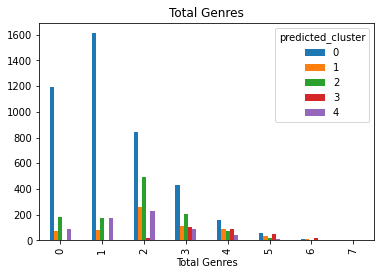

predicted_cluster     0    1    2    3    4
Total Countries                            
0                  3623  548  612  175  564
1                   515   90  317   67   52
2                   112   16  133   22   17
3                    44    6   47   11    3
4                    10    3   22    3    2
5                     4    0    8    2    3
6                     3    0    3    2    0
7                     0    1    0    0    0
8                     0    0    2    0    0
9                     0    0    1    0    0
10                    0    1    0    0    0
11                    1    0    0    0    0
12                    0    0    1    0    0
predicted_cluster         0         1         2         3         4
Total Countries                                                    
0                  0.840213  0.824060  0.534031  0.620567  0.879875
1                  0.119434  0.135338  0.276614  0.237589  0.081123
2                  0.025974  0.024060  0.116056  0.078014  0.026521


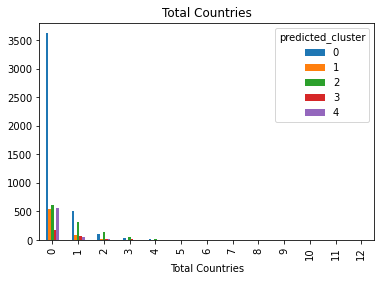

predicted_cluster     0    1    2    3    4
Total Languages                            
0                  3678  571  736  211  456
1                   436   67  250   47  118
2                   131   15  101   15   42
3                    42    7   40    6   15
4                    16    2   14    2    5
5                     6    2    2    1    1
6                     2    0    2    0    1
7                     1    1    1    0    2
8                     0    0    0    0    1
predicted_cluster         0         1         2         3         4
Total Languages                                                    
0                  0.852968  0.858647  0.642234  0.748227  0.711388
1                  0.101113  0.100752  0.218150  0.166667  0.184087
2                  0.030380  0.022556  0.088133  0.053191  0.065523
3                  0.009740  0.010526  0.034904  0.021277  0.023401
4                  0.003711  0.003008  0.012216  0.007092  0.007800
5                  0.001391  0.003008  0

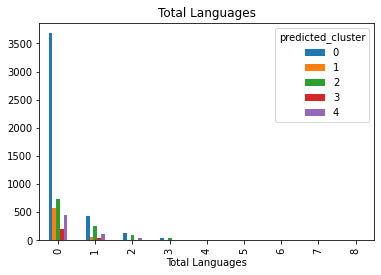

predicted_cluster     0    1     2    3    4
Total Directors                             
0                  3961  585  1074  174  597
1                   314   58    62   79   36
2                    24   12     8   21    4
3                     5    3     0    3    2
4                     0    3     0    2    1
5                     0    1     0    0    0
6                     1    2     0    1    0
7                     1    1     0    0    0
8                     0    0     0    1    0
9                     2    0     0    0    1
10                    1    0     1    1    0
11                    3    0     1    0    0
predicted_cluster         0         1         2         3         4
Total Directors                                                    
0                  0.918599  0.879699  0.937173  0.617021  0.931357
1                  0.072820  0.087218  0.054101  0.280142  0.056162
2                  0.005566  0.018045  0.006981  0.074468  0.006240
3                  0.001160  0

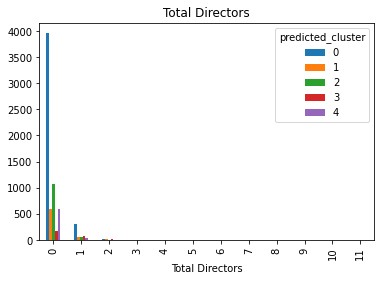

predicted_cluster     0    1    2    3    4
Age_13+                                    
0                  3721  617  809  259  448
1                   591   48  337   23  193
predicted_cluster         0        1         2        3         4
Age_13+                                                          
0                  0.862941  0.92782  0.705934  0.91844  0.698908
1                  0.137059  0.07218  0.294066  0.08156  0.301092


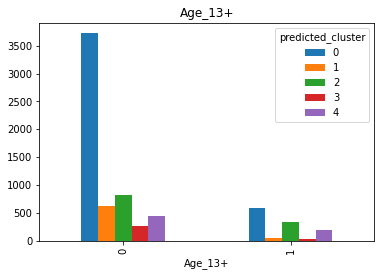

predicted_cluster     0    1     2    3    4
Age_16+                                     
0                  4114  652  1080  280  615
1                   198   13    66    2   26
predicted_cluster         0         1         2         3         4
Age_16+                                                            
0                  0.954082  0.980451  0.942408  0.992908  0.959438
1                  0.045918  0.019549  0.057592  0.007092  0.040562


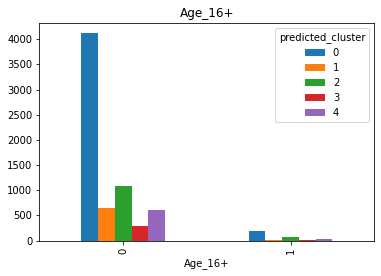

predicted_cluster     0    1    2    3    4
Age_18+                                    
0                  1535  662  734  281  471
1                  2777    3  412    1  170
predicted_cluster         0         1         2         3         4
Age_18+                                                            
0                  0.355983  0.995489  0.640489  0.996454  0.734789
1                  0.644017  0.004511  0.359511  0.003546  0.265211


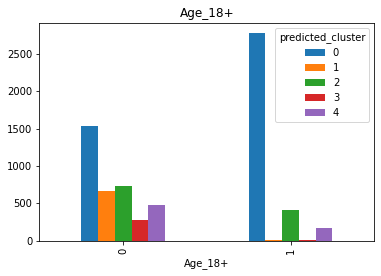

predicted_cluster     0    1    2    3    4
Age_7+                                     
0                  3812  323  913  121  481
1                   500  342  233  161  160
predicted_cluster         0         1         2         3        4
Age_7+                                                            
0                  0.884045  0.485714  0.796684  0.429078  0.75039
1                  0.115955  0.514286  0.203316  0.570922  0.24961


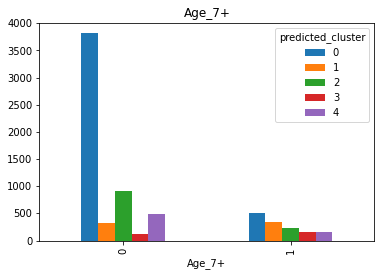

predicted_cluster     0    1     2    3    4
Age_all                                     
0                  4066  406  1048  187  549
1                   246  259    98   95   92
predicted_cluster        0         1         2         3         4
Age_all                                                           
0                  0.94295  0.610526  0.914485  0.663121  0.856474
1                  0.05705  0.389474  0.085515  0.336879  0.143526


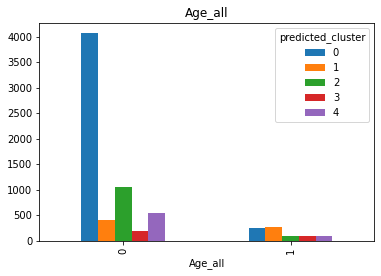

predicted_cluster     0    1    2    3    4
Action                                     
0                  3462  575  979  214  409
1                   850   90  167   68  232
predicted_cluster         0         1         2         3         4
Action                                                             
0                  0.802876  0.864662  0.854276  0.758865  0.638066
1                  0.197124  0.135338  0.145724  0.241135  0.361934


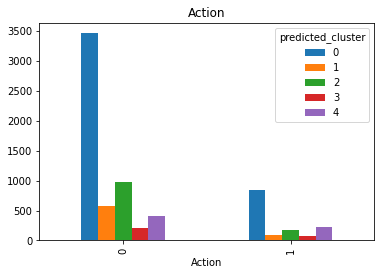

predicted_cluster     0    1    2    3    4
Adventure                                  
0                  3948  452  998   51  581
1                   364  213  148  231   60
predicted_cluster         0         1         2         3         4
Adventure                                                          
0                  0.915584  0.679699  0.870855  0.180851  0.906396
1                  0.084416  0.320301  0.129145  0.819149  0.093604


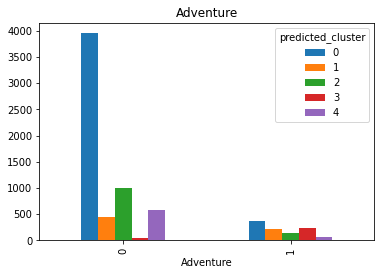

predicted_cluster     0    1     2    3    4
Sci-Fi                                      
0                  3866  581  1072  236  609
1                   446   84    74   46   32
predicted_cluster         0         1         2         3         4
Sci-Fi                                                             
0                  0.896568  0.873684  0.935428  0.836879  0.950078
1                  0.103432  0.126316  0.064572  0.163121  0.049922


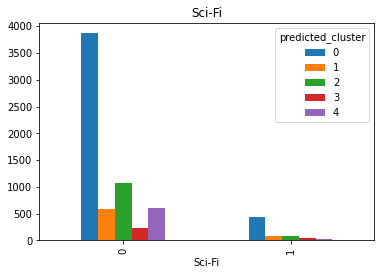

predicted_cluster     0    1    2    3    4
Thriller                                   
0                  3076  643  819  274  510
1                  1236   22  327    8  131
predicted_cluster         0         1        2         3         4
Thriller                                                          
0                  0.713358  0.966917  0.71466  0.971631  0.795632
1                  0.286642  0.033083  0.28534  0.028369  0.204368


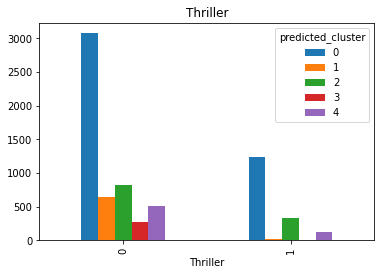

predicted_cluster     0    1    2    3    4
Comedy                                     
0                  3076  238  935   95  411
1                  1236  427  211  187  230
predicted_cluster         0         1         2         3         4
Comedy                                                             
0                  0.713358  0.357895  0.815881  0.336879  0.641186
1                  0.286642  0.642105  0.184119  0.663121  0.358814


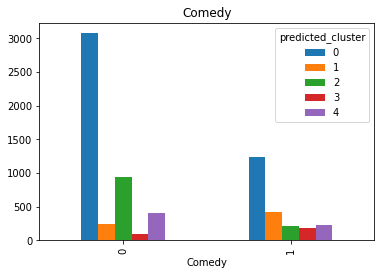

predicted_cluster     0    1     2    3    4
Western                                     
0                  4179  650  1106  277  639
1                   133   15    40    5    2
predicted_cluster         0         1         2        3        4
Western                                                          
0                  0.969156  0.977444  0.965096  0.98227  0.99688
1                  0.030844  0.022556  0.034904  0.01773  0.00312


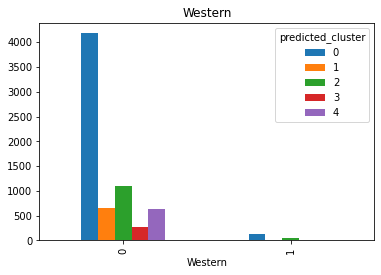

predicted_cluster     0    1     2    3    4
Animation                                   
0                  4266  561  1122   63  597
1                    46  104    24  219   44
predicted_cluster         0         1         2         3         4
Animation                                                          
0                  0.989332  0.843609  0.979058  0.223404  0.931357
1                  0.010668  0.156391  0.020942  0.776596  0.068643


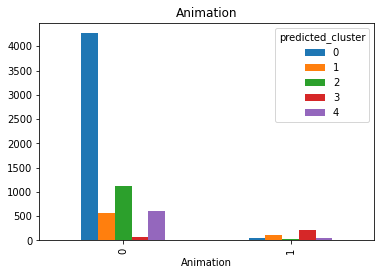

predicted_cluster     0    1     2    3    4
Family                                      
0                  4158  183  1088   39  604
1                   154  482    58  243   37
predicted_cluster         0         1         2         3         4
Family                                                             
0                  0.964286  0.275188  0.949389  0.138298  0.942278
1                  0.035714  0.724812  0.050611  0.861702  0.057722


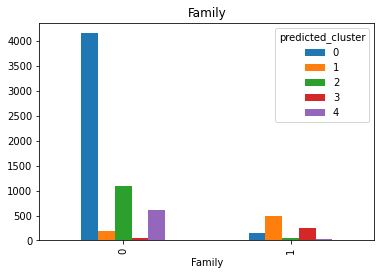

predicted_cluster     0    1    2    3    4
Biography                                  
0                  4141  645  997  281  607
1                   171   20  149    1   34
predicted_cluster         0         1         2         3         4
Biography                                                          
0                  0.960343  0.969925  0.869983  0.996454  0.946958
1                  0.039657  0.030075  0.130017  0.003546  0.053042


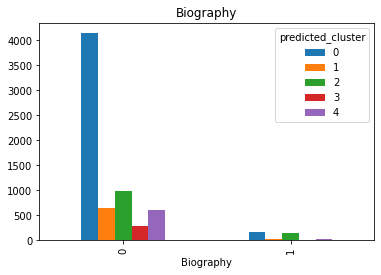

predicted_cluster     0    1    2    3    4
Drama                                      
0                  2635  466  263  239  213
1                  1677  199  883   43  428
predicted_cluster         0         1         2         3         4
Drama                                                              
0                  0.611085  0.700752  0.229494  0.847518  0.332293
1                  0.388915  0.299248  0.770506  0.152482  0.667707


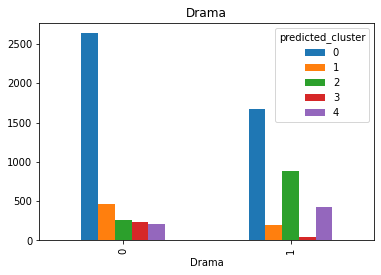

predicted_cluster     0    1     2    3    4
Music                                       
0                  4175  624  1089  275  630
1                   137   41    57    7   11
predicted_cluster         0         1         2         3         4
Music                                                              
0                  0.968228  0.938346  0.950262  0.975177  0.982839
1                  0.031772  0.061654  0.049738  0.024823  0.017161


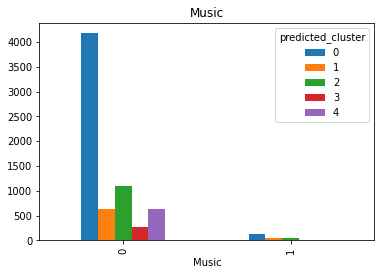

predicted_cluster     0    1     2    3    4
War                                         
0                  4220  660  1036  281  614
1                    92    5   110    1   27
predicted_cluster         0         1         2         3         4
War                                                                
0                  0.978664  0.992481  0.904014  0.996454  0.957878
1                  0.021336  0.007519  0.095986  0.003546  0.042122


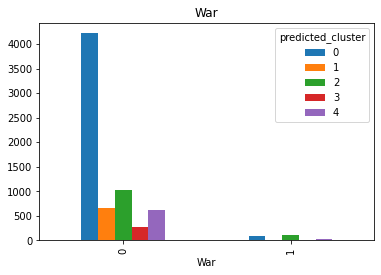

predicted_cluster     0    1    2    3    4
Crime                                      
0                  3709  633  976  273  548
1                   603   32  170    9   93
predicted_cluster         0        1         2         3         4
Crime                                                             
0                  0.860158  0.95188  0.851658  0.968085  0.854914
1                  0.139842  0.04812  0.148342  0.031915  0.145086


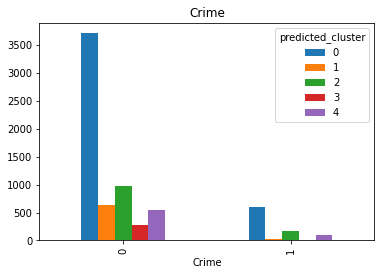

predicted_cluster     0    1     2    3    4
Fantasy                                     
0                  4107  534  1069   80  596
1                   205  131    77  202   45
predicted_cluster         0         1        2         3         4
Fantasy                                                           
0                  0.952458  0.803008  0.93281  0.283688  0.929797
1                  0.047542  0.196992  0.06719  0.716312  0.070203


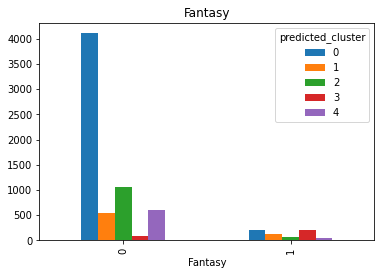

predicted_cluster     0    1    2    3    4
Romance                                    
0                  3821  552  902  260  455
1                   491  113  244   22  186
predicted_cluster         0         1         2         3         4
Romance                                                            
0                  0.886132  0.830075  0.787086  0.921986  0.709828
1                  0.113868  0.169925  0.212914  0.078014  0.290172


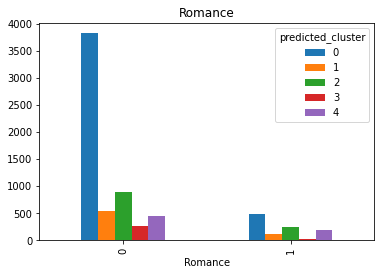

predicted_cluster     0    1     2    3    4
History                                     
0                  4213  657  1021  281  607
1                    99    8   125    1   34
predicted_cluster         0        1         2         3         4
History                                                           
0                  0.977041  0.98797  0.890925  0.996454  0.946958
1                  0.022959  0.01203  0.109075  0.003546  0.053042


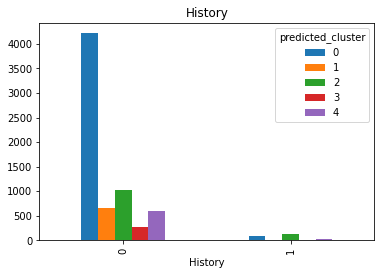

predicted_cluster     0    1     2    3    4
Mystery                                     
0                  3949  639  1002  267  600
1                   363   26   144   15   41
predicted_cluster         0         1         2         3         4
Mystery                                                            
0                  0.915816  0.960902  0.874346  0.946809  0.936037
1                  0.084184  0.039098  0.125654  0.053191  0.063963


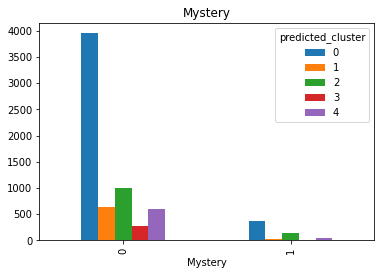

predicted_cluster     0    1     2    3    4
Sport                                       
0                  4215  615  1108  281  623
1                    97   50    38    1   18
predicted_cluster         0         1         2         3         4
Sport                                                              
0                  0.977505  0.924812  0.966841  0.996454  0.971919
1                  0.022495  0.075188  0.033159  0.003546  0.028081


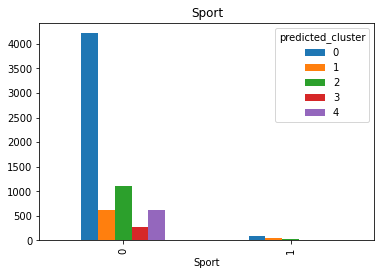

predicted_cluster     0    1     2    3    4
Documentary                                 
0                  3782  624  1040  282  628
1                   530   41   106    0   13
predicted_cluster         0         1         2    3         4
Documentary                                                   
0                  0.877087  0.938346  0.907504  1.0  0.979719
1                  0.122913  0.061654  0.092496  0.0  0.020281


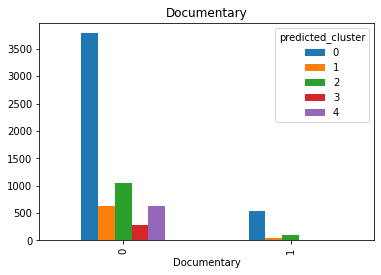

predicted_cluster     0    1     2    3    4
Musical                                     
0                  4279  592  1123  239  609
1                    33   73    23   43   32
predicted_cluster         0         1        2         3         4
Musical                                                           
0                  0.992347  0.890226  0.97993  0.847518  0.950078
1                  0.007653  0.109774  0.02007  0.152482  0.049922


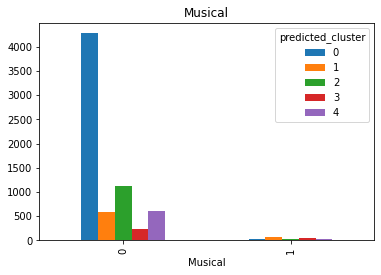

predicted_cluster     0    1     2    3    4
News                                        
0                  4290  664  1140  282  641
1                    22    1     6    0    0
predicted_cluster         0         1         2    3    4
News                                                     
0                  0.994898  0.998496  0.994764  1.0  1.0
1                  0.005102  0.001504  0.005236  0.0  0.0


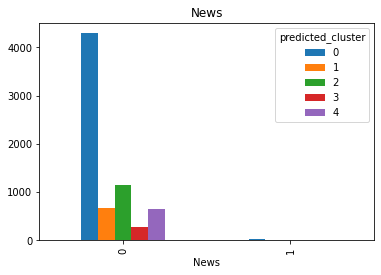

predicted_cluster     0    1     2    3    4
Horror                                      
0                  3417  646  1032  275  600
1                   895   19   114    7   41
predicted_cluster        0         1         2         3         4
Horror                                                            
0                  0.79244  0.971429  0.900524  0.975177  0.936037
1                  0.20756  0.028571  0.099476  0.024823  0.063963


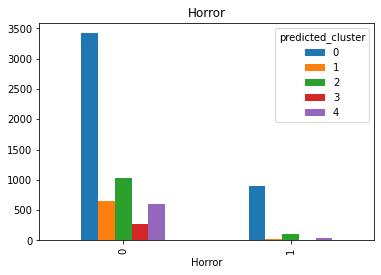

predicted_cluster     0    1     2    3    4
Short                                       
0                  4282  652  1130  270  639
1                    30   13    16   12    2
predicted_cluster         0         1         2         3        4
Short                                                             
0                  0.993043  0.980451  0.986038  0.957447  0.99688
1                  0.006957  0.019549  0.013962  0.042553  0.00312


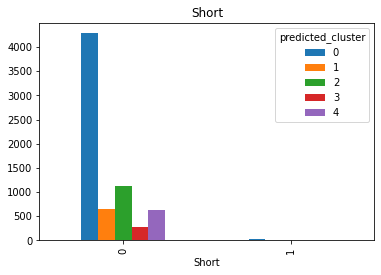

predicted_cluster     0    1     2    3    4
Film-Noir                                   
0                  4306  665  1146  282  641
1                     6    0     0    0    0
predicted_cluster         0    1    2    3    4
Film-Noir                                      
0                  0.998609  1.0  1.0  1.0  1.0
1                  0.001391  0.0  0.0  0.0  0.0


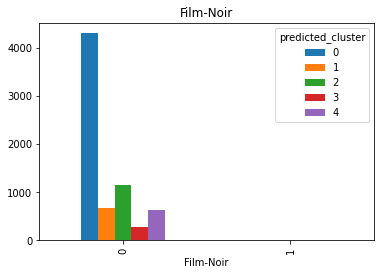

predicted_cluster     0    1     2    3    4
Reality-TV                                  
0                  4311  665  1146  282  641
1                     1    0     0    0    0
predicted_cluster         0    1    2    3    4
Reality-TV                                     
0                  0.999768  1.0  1.0  1.0  1.0
1                  0.000232  0.0  0.0  0.0  0.0


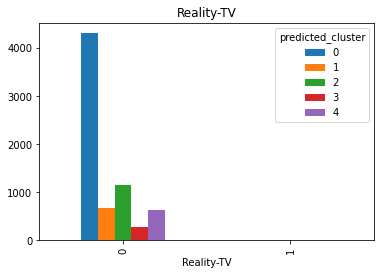

predicted_cluster     0    1    2    3    4
North America                              
0                   345   17  678   35  572
1                  3967  648  468  247   69
predicted_cluster         0         1         2         3         4
North America                                                      
0                  0.080009  0.025564  0.591623  0.124113  0.892356
1                  0.919991  0.974436  0.408377  0.875887  0.107644


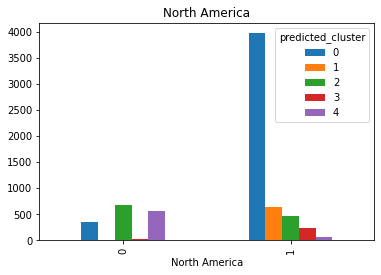

predicted_cluster     0    1     2    3    4
South America                               
0                  4274  665  1125  280  635
1                    38    0    21    2    6
predicted_cluster         0    1         2         3        4
South America                                                
0                  0.991187  1.0  0.981675  0.992908  0.99064
1                  0.008813  0.0  0.018325  0.007092  0.00936


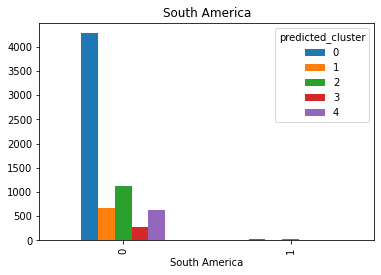

predicted_cluster     0    1    2    3    4
Europe                                     
0                  3774  613  250  206  616
1                   538   52  896   76   25
predicted_cluster         0         1        2         3         4
Europe                                                            
0                  0.875232  0.921805  0.21815  0.730496  0.960998
1                  0.124768  0.078195  0.78185  0.269504  0.039002


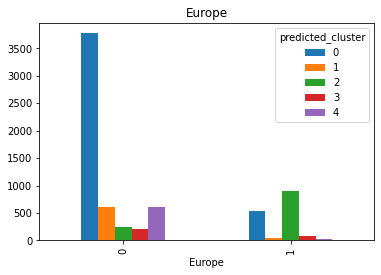

predicted_cluster     0    1     2    3    4
Asia                                        
0                  4137  650  1072  239   51
1                   175   15    74   43  590
predicted_cluster         0         1         2         3         4
Asia                                                               
0                  0.959416  0.977444  0.935428  0.847518  0.079563
1                  0.040584  0.022556  0.064572  0.152482  0.920437


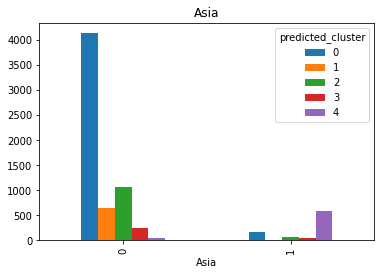

predicted_cluster         0    1     2    3    4
Australia and Pacific                           
0                      4217  644  1088  275  637
1                        95   21    58    7    4
predicted_cluster             0         1         2         3        4
Australia and Pacific                                                 
0                      0.977968  0.968421  0.949389  0.975177  0.99376
1                      0.022032  0.031579  0.050611  0.024823  0.00624


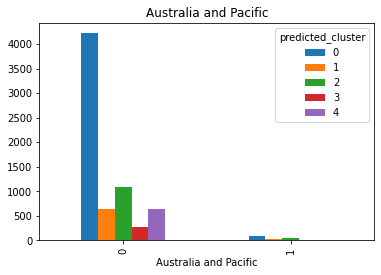

predicted_cluster     0    1     2    3    4
Africa                                      
0                  4282  660  1122  281  639
1                    30    5    24    1    2
predicted_cluster         0         1         2         3        4
Africa                                                            
0                  0.993043  0.992481  0.979058  0.996454  0.99688
1                  0.006957  0.007519  0.020942  0.003546  0.00312


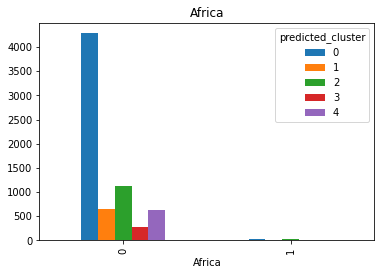

predicted_cluster     0    1    2    3    4
English                                    
0                   129    7  177   17  497
1                  4183  658  969  265  144
predicted_cluster         0         1        2         3         4
English                                                           
0                  0.029917  0.010526  0.15445  0.060284  0.775351
1                  0.970083  0.989474  0.84555  0.939716  0.224649


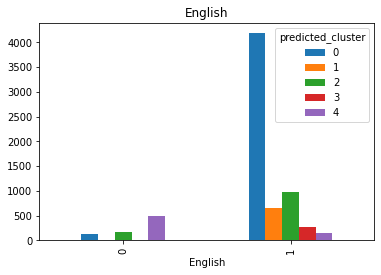

predicted_cluster     0    1    2    3    4
French                                     
0                  4161  641  986  254  620
1                   151   24  160   28   21
predicted_cluster         0        1         2         3         4
French                                                            
0                  0.964981  0.96391  0.860384  0.900709  0.967239
1                  0.035019  0.03609  0.139616  0.099291  0.032761


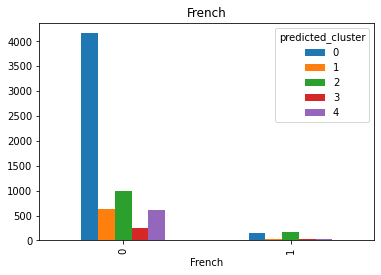

predicted_cluster     0    1     2    3    4
Spanish                                     
0                  4079  636  1032  264  626
1                   233   29   114   18   15
predicted_cluster         0         1         2        3         4
Spanish                                                           
0                  0.945965  0.956391  0.900524  0.93617  0.976599
1                  0.054035  0.043609  0.099476  0.06383  0.023401


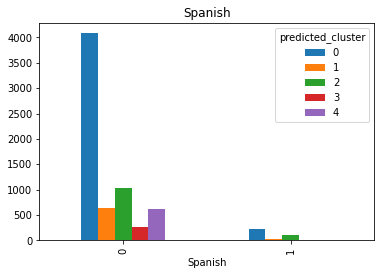

predicted_cluster     0    1     2    3    4
Arabic                                      
0                  4289  661  1113  281  631
1                    23    4    33    1   10
predicted_cluster         0         1         2         3         4
Arabic                                                             
0                  0.994666  0.993985  0.971204  0.996454  0.984399
1                  0.005334  0.006015  0.028796  0.003546  0.015601


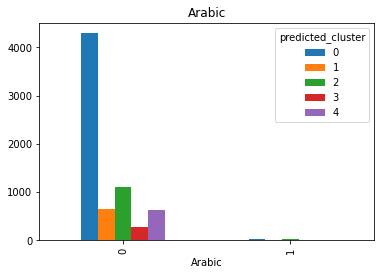

predicted_cluster     0    1     2    3    4
Portuguese                                  
0                  4292  663  1134  279  637
1                    20    2    12    3    4
predicted_cluster         0         1         2         3        4
Portuguese                                                        
0                  0.995362  0.996992  0.989529  0.989362  0.99376
1                  0.004638  0.003008  0.010471  0.010638  0.00624


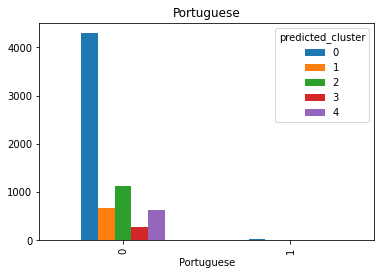

predicted_cluster     0    1     2    3    4
North American                              
0                  4299  665  1144  280  640
1                    13    0     2    2    1
predicted_cluster         0    1         2         3        4
North American                                               
0                  0.996985  1.0  0.998255  0.992908  0.99844
1                  0.003015  0.0  0.001745  0.007092  0.00156


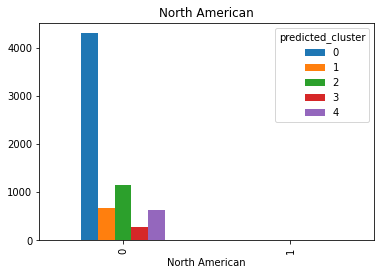

predicted_cluster     0    1     2    3    4
South American                              
0                  4311  665  1142  282  641
1                     1    0     4    0    0
predicted_cluster         0    1        2    3    4
South American                                     
0                  0.999768  1.0  0.99651  1.0  1.0
1                  0.000232  0.0  0.00349  0.0  0.0


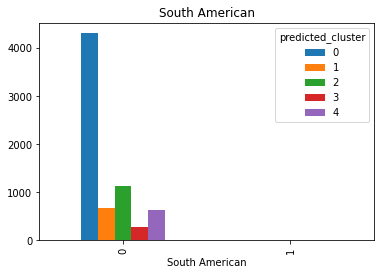

predicted_cluster     0    1    2    3    4
European                                   
0                  4042  625  851  253  616
1                   270   40  295   29   25
predicted_cluster         0        1         2         3         4
European                                                          
0                  0.937384  0.93985  0.742583  0.897163  0.960998
1                  0.062616  0.06015  0.257417  0.102837  0.039002


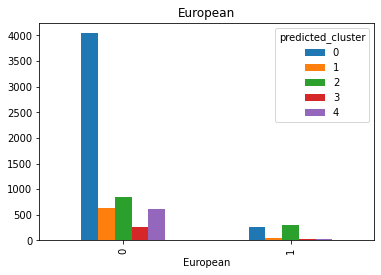

predicted_cluster     0    1     2    3    4
Asian                                       
0                  4115  644  1059  251   50
1                   197   21    87   31  591
predicted_cluster         0         1         2         3         4
Asian                                                              
0                  0.954314  0.968421  0.924084  0.890071  0.078003
1                  0.045686  0.031579  0.075916  0.109929  0.921997


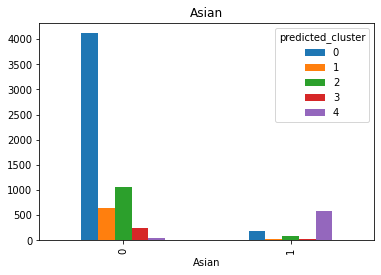

predicted_cluster          0    1     2    3    4
Australian and Pacific                           
0                       4308  664  1140  281  641
1                          4    1     6    1    0
predicted_cluster              0         1         2         3    4
Australian and Pacific                                             
0                       0.999072  0.998496  0.994764  0.996454  1.0
1                       0.000928  0.001504  0.005236  0.003546  0.0


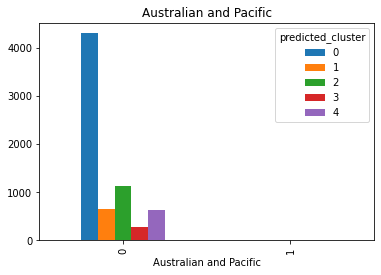

predicted_cluster     0    1     2    3    4
African                                     
0                  4304  661  1132  282  640
1                     8    4    14    0    1
predicted_cluster         0         1         2    3        4
African                                                      
0                  0.998145  0.993985  0.987784  1.0  0.99844
1                  0.001855  0.006015  0.012216  0.0  0.00156


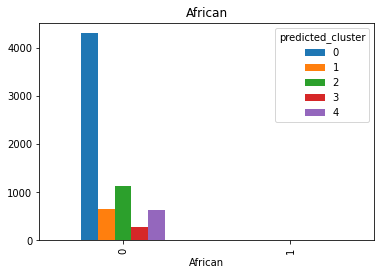

predicted_cluster     0    1     2    3    4
Sign Lang.                                  
0                  4295  661  1142  282  640
1                    17    4     4    0    1
predicted_cluster         0         1        2    3        4
Sign Lang.                                                  
0                  0.996058  0.993985  0.99651  1.0  0.99844
1                  0.003942  0.006015  0.00349  0.0  0.00156


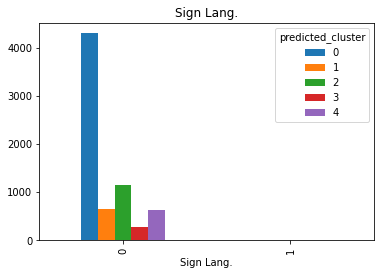

predicted_cluster     0    1     2    3    4
Other                                       
0                  4304  664  1143  282  641
1                     8    1     3    0    0
predicted_cluster         0         1         2    3    4
Other                                                    
0                  0.998145  0.998496  0.997382  1.0  1.0
1                  0.001855  0.001504  0.002618  0.0  0.0


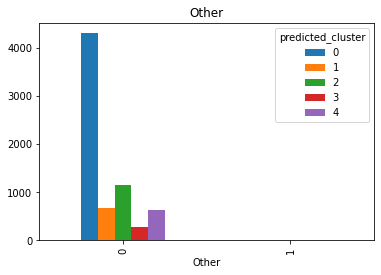

predicted_cluster     0    1    2    3    4
runtime_bin                                
0                  1158  277  167  147   37
1                   601  109  533   32  459
2                  1574  148  145   50   53
3                   979  131  301   53   92
predicted_cluster         0         1         2         3         4
runtime_bin                                                        
0                  0.268553  0.416541  0.145724  0.521277  0.057722
1                  0.139378  0.163910  0.465096  0.113475  0.716069
2                  0.365028  0.222556  0.126527  0.177305  0.082683
3                  0.227041  0.196992  0.262653  0.187943  0.143526


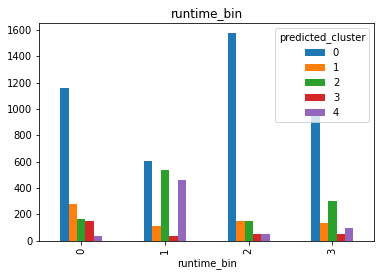

predicted_cluster     0    1    2    3    4
move_age_bin                               
0                  2248  256  598  159  382
1                   932  199  264   65  129
2                     1    0    1    0    0
3                     0    0    1    0    0
4                   390   93   74   28   42
5                   308   37   65   10   36
6                   323   38   86    8   49
7                    38   18   38    5    2
8                    25   15    2    2    1
9                    22    6    8    4    0
10                   24    3    6    1    0
11                    1    0    3    0    0
predicted_cluster         0         1         2         3         4
move_age_bin                                                       
0                  0.521336  0.384962  0.521815  0.563830  0.595944
1                  0.216141  0.299248  0.230366  0.230496  0.201248
2                  0.000232  0.000000  0.000873  0.000000  0.000000
3                  0.000000  0.000000  0.000

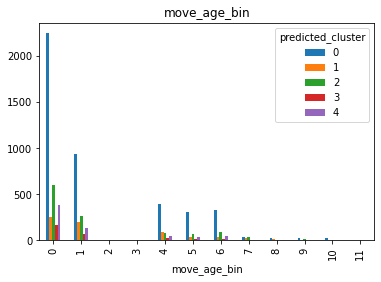

predicted_cluster     0    1    2   3    4
imdb_bin                                  
0                     0    0    1   0    0
1                    19    1    1   1    0
2                   191    3   15   0    6
3                   431   20   33  11   12
4                   780   78  110  35   43
5                  1101  270  244  63  123
6                  1197  180  466  78  173
7                   510  100  240  87  247
8                    83   13   35   7   37
9                     0    0    1   0    0
predicted_cluster         0         1         2         3         4
imdb_bin                                                           
0                  0.000000  0.000000  0.000873  0.000000  0.000000
1                  0.004406  0.001504  0.000873  0.003546  0.000000
2                  0.044295  0.004511  0.013089  0.000000  0.009360
3                  0.099954  0.030075  0.028796  0.039007  0.018721
4                  0.180891  0.117293  0.095986  0.124113  0.067083
5       

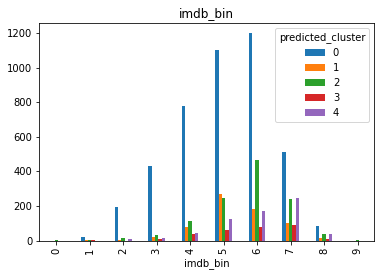

predicted_cluster     0    1     2    3    4
predicted_cluster                           
0                  4312    0     0    0    0
1                     0  665     0    0    0
2                     0    0  1146    0    0
3                     0    0     0  282    0
4                     0    0     0    0  641
predicted_cluster    0    1    2    3    4
predicted_cluster                         
0                  1.0  0.0  0.0  0.0  0.0
1                  0.0  1.0  0.0  0.0  0.0
2                  0.0  0.0  1.0  0.0  0.0
3                  0.0  0.0  0.0  1.0  0.0
4                  0.0  0.0  0.0  0.0  1.0


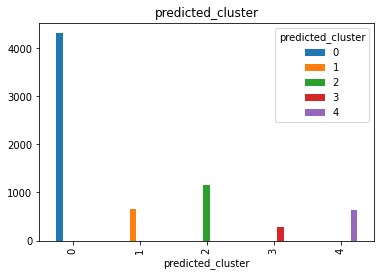

In [ ]:
# KModes plots
km = KModes(n_clusters=5,random_state=1000)
cluster_labels = km.fit_predict(mdf_cat)
mdf_cat['predicted_cluster']=cluster_labels

for i in mdf_cat.columns:
    ctab = pd.crosstab(mdf_cat[i], mdf_cat['predicted_cluster'])
    print(ctab)
    print(ctab / ctab.sum())
    ctab.plot.bar()
    plt.title('{}'.format(i))
    plt.xlabel(i)
    plt.show()

# ctab = pd.crosstab(mdf_cat['Netflix'], mdf_cat['predicted_cluster'])
# print(ctab)
# print(ctab / ctab.sum())
# ctab.plot.bar()

### Description of Clustering Attributes for both Algorithms

#### Agglomerative Hierarchical Clustering

##### Highlight Summary

* Cluster 0:
    * Mostly available on Netflix and Prime Video. There are more genres per movie. The movies are mostly available in 1 country and 1-2 languages, and mostly directed by 1 director. Movies in this cluster target the Young/Adolescent/Adult audience. Drama, Romance, and Action are popular genres. These movies are mostly available in Asia and in Asian languages and some English. All movies are in the Regular-Short (1.5 hours) range. Most movies were made in the last 20 years. Average IMDb ratings in the 6-8 stars range.
* Cluster 1:
    * Mostly available on Netflix and Prime Video. There are more genres per movie. The movies are mostly available in 1 country and 1-2 languages, and mostly directed by 1 director. Movies in this cluster target the Young/Adolescent/Adult audience. Drama, Comedy, and Action are popular genres. These movies are mostly available in North America, Europe, and Asia and in English, European, and Asian languages. All movies are in the Regular-Short (1.5 hours) range. Most movies were made in the last 20 years. Average IMDb ratings in the 6-8 stars range.
* Cluster 2:
    * Mostly available on Prime Video. There are less genres per movie. The movies are mostly available in 1 country and language, and mostly directed by 1 director. Movies in this cluster target the Young/All ages audience. Western, Drama, and Comedy are popular genres. These movies are mostly available in North America and in English. Most movies are in the Short (0-1.5 hours) range. Most movies were made 60-90 years ago. Average IMDb ratings in the 5-7 stars range.
* Cluster 3:
    * Mostly available on Netflix and Prime Video. There are less genres per movie. The movies are mostly available in 1 country and language, and mostly directed by 1 director. Movies in this cluster target the Young/All/Adult audience. Comedy, Documentary, and Short are popular genres. These movies are mostly available in North America and in English. All movies are in the Short (0-1.5 hours) range. Most movies were made in the last 20 years. Average IMDb ratings in the 6-8 stars range.
* Cluster 4:
    * Mostly available on Netflix and Prime Video. There are less genres per movie. The movies are mostly available in 1 country and language, and mostly directed by 1 director. Movies in this cluster target the Adult audience and some younger audiences. Drama, Comedy, and Thriller are popular genres. These movies are mostly available in North America and Europe and in English. There’s a wide-range of movie lengths but slightly more in the Regular-Long (1.5-1.75 hours) range. Most movies were made in the last 20 years. Average IMDb ratings in the 5-7 stars range.

##### Exhaustive Summary

Cluster 0:
 
* Streaming Platforms
    * Netflix (40.2%), Hulu (2.4%), Prime Video (61.2%), Disney+ (2.9%).
* Total Genres, Countries, Languages, and Directors
    * Total Genres (2: 23.4%, 3: 38.8%, 4: 21.1%).
    * Total Countries (1: 89.0%, 2: 7.7%).
    * Total Languages (1: 62.2%, 2: 20.1%).
    * Total Directors (1: 94.3%, 2: 4.3%).
* Age ratings
    * All ages (19.1%), 7+ (31.1%), 13+ (25.8%), 16+ (2.4%), 18+ (21.5%).
* Genres
    * Action (34.5%), Adventure (8.6%), Sci-Fi (4.3%), Thriller (20.6%), Comedy (31.1%), Western (1.9%), Animation (0.5%), Family (7.7%), Biography (7.7%), Drama (78.0%), Music (2.9%), War (7.2%), Crime (12.9%), Fantasy (5.7%), Romance (36.8%), History (9.1%), Mystery (4.8%), Sport (3.3%), Documentary (1.0%), Musical (14.4%), News (0%), Horror (1.9%), Short (0%), Film-Noir (0%), Reality TV (0%).
* Available Regions
    * North America (22.5%), South America (0%), Europe (14.4%), Asia (71.3%), Australia & Pacific (1.0%), Africa (0%).
* Available Languages
    * English (39.2%), French (10.0%), Spanish (4.3%), Arabic (1.0%), Portuguese (0.5%), North American (0%), South American (0%), European (15.3%), Asian (75.1%), Australian & Pacific (0%), African (1.0%), Sign Language (1.0%), Other (0.5%).
* Runtime Length
    * Short (0%), Regular-Short (100%), Regular-Long (0%), Long (0%).
* Movie Age
    * 0-10 years (44.0%), 10-20 years (37.3%).
* IMDb rating
    * 6-7 stars (27.3%), 7-8 stars (31.6%).

Cluster 1:

* Streaming Platforms
    * Netflix (41.4%), Hulu (7.9%), Prime Video (51.2%), Disney+ (8.0%).
* Total Genres, Countries, Languages, and Directors
    * Total Genres (2: 27.2%, 3: 34.9%, 4: 17.5%).
    * Total Countries (1: 71.3%, 2: 14.4%).
    * Total Languages (1: 63.0%, 2: 19.8%).
    * Total Directors (1: 95.6%, 2: 3.5%).
* Age ratings
    * All ages (9.4%), 7+ (18.6%), 13+ (27.0%), 16+ (2.3%), 18+ (42.7%).
* Genres
    * Action (25.4%), Adventure (13.1%), Sci-Fi (9.4%), Thriller (23.0%), Comedy (28.2%), Western (4.1%), Animation (1.1%), Family (6.5%), Biography (13.3%), Drama (69.3%), Music (3.8%), War (9.4%), Crime (14.8%), Fantasy (6.3%), Romance (24.5%), History (10.4%), Mystery (8.5%), Sport (4.2%), Documentary (2.9%), Musical (3.6%), News (0.3%), Horror (4.1%), Short (0%), Film-Noir (0%), Reality TV (0%).
* Available Regions
    * North America (56.6%), South America (1.2%), Europe (28.7%), Asia (34.3%), Australia & Pacific (1.8%), Africa (1.2%).
* Available Languages
    * English (70.4%), French (11.8%), Spanish (9.5%), Arabic (1.7%), Portuguese (1.2%), North American (0.5%), South American (0.3%), European (18.1%), Asian (36.6%), Australian & Pacific (0.5%), African (0.8%), Sign Language (0.6%), Other (0.2%).
* Runtime Length
    * Short (0%), Regular-Short (100%), Regular-Long (0%), Long (0%).
* Movie Age
    * 0-10 years (56.0%), 10-20 years (28.4%).
* IMDb rating
    * 6-7 stars (34.6%), 7-8 stars (33.2%).

Cluster 2:
 
* Streaming Platforms
    * Netflix (0%), Hulu (0%), Prime Video (83.5%), Disney+ (16.5%).
* Total Genres, Countries, Languages, and Directors
    * Total Genres (1: 14.7%, 2: 25.7%, 3: 24.8%, 4: 18.3%).
    * Total Countries (1: 94.5%, 2: 4.6%).
    * Total Languages (1: 92.7%, 2: 6.4%).
    * Total Directors (1: 86.2%, 2: 7.3%).
* Age ratings
    * All ages (67.0%), 7+ (28.4%), 13+ (3.7%), 16+ (0%), 18+ (0.9%).
* Genres
    * Action (22.0%), Adventure (23.9%), Sci-Fi (7.3%), Thriller (13.8%), Comedy (30.3%), Western (35.8%), Animation (11.0%), Family (22.0%), Biography (1.8%), Drama (34.9%), Music (11.9%), War (3.7%), Crime (10.1%), Fantasy (12.8%), Romance (20.2%), History (1.8%), Mystery (9.2%), Sport (1.8%), Documentary (6.4%), Musical (7.3%), News (0%), Horror (8.3%), Short (1.8%), Film-Noir (2.8%), Reality TV (0%).
* Available Regions
    * North America (92.7%), South America (0%), Europe (8.3%), Asia (0.9%), Australia & Pacific (0%), Africa (0.9%).
* Available Languages
    * English (96.3%), French (3.7%), Spanish (1.8%), Arabic (0%), Portuguese (0%), North American (0%), South American (0%), European (4.6%), Asian (0.9%), Australian & Pacific (0%), African (0%), Sign Language (0.9%), Other (0.9%).
* Runtime Length
    * Short (89.0%), Regular-Short (0%), Regular-Long (5.5%), Long (5.5%).
* Movie Age
    * 60-70 years (27.5%), 70-80 years (28.4%), 80-90 years (30.3%).
* IMDb rating
    * 5-6 stars (26.6%), 6-7 stars (32.1%).

Cluster 3:
 
* Streaming Platforms
    * Netflix (26.3%), Hulu (4.1%), Prime Video (62.5%), Disney+ (9.9%).
* Total Genres, Countries, Languages, and Directors
    * Total Genres (1: 39.6%, 2: 31.4%).
    * Total Countries (1: 90.1%, 2: 8.5%).
    * Total Languages (1: 92.5%, 2: 5.8%).
    * Total Directors (1: 83.6%, 2: 14.3%).
* Age ratings
    * All ages (25.3%), 7+ (22.2%), 13+ (10.9%), 16+ (5.5%), 18+ (36.2%).
* Genres
    * Action (6.5%), Adventure (8.5%), Sci-Fi (2.4%), Thriller (3.4%), Comedy (46.4%), Western (0.3%), Animation (19.1%), Family (19.8%), Biography (3.4%), Drama (9.9%), Music (4.8%), War (1.4%), Crime (3.4%), Fantasy (7.2%), Romance (2.0%), History (4.8%), Mystery (1.4%), Sport (2.0%), Documentary (46.4%), Musical (3.8%), News (0%), Horror (0%), Short (24.2%), Film-Noir (0%), Reality TV (0%).
* Available Regions
    * North America (83.6%), South America (0.3%), Europe (16.7%), Asia (5.5%), Australia & Pacific (0%), Africa (0%).
* Available Languages
    * English (95.9%), French (1.0%), Spanish (0.7%), Arabic (1.0%), Portuguese (0.3%), North American (0%), South American (0%), European (4.1%), Asian (3.8%), Australian & Pacific (0.3%), African (0%), Sign Language (1.4%), Other (1.0%).
* Runtime Length
    * Short (100%), Regular-Short (0%), Regular-Long (0%), Long (0%).
* Movie Age
    * 0-10 years (67.6%), 10-20 years (23.9%).
* IMDb rating
    * 6-7 stars (29.0%), 7-8 stars (33.8%).

Cluster 4:
 
* Streaming Platforms
    * Netflix (20.3%), Hulu (8.6%), Prime Video (69.6%), Disney+ (6.6%).
* Total Genres, Countries, Languages, and Directors
    * Total Genres (1: 22.7%, 2: 29.4%, 3: 25.4%).
    * Total Countries (1: 77.9%, 2: 15.6%).
    * Total Languages (1: 82.0%, 2: 12.5%).
    * Total Directors (1: 90.5%, 2: 8.1%).
* Age ratings
    * All ages (9.4%), 7+ (19.3%), 13+ (16.0%), 16+ (4.7%), 18+ (50.7%).
* Genres
    * Action (19.5%), Adventure (14.9%), Sci-Fi (10.3%), Thriller (26.1%), Comedy (32.4%), Western (2.1%), Animation (6.3%), Family (14.4%), Biography (4.5%), Drama (44.0%), Music (3.4%), War (2.6%), Crime (13.2%), Fantasy (9.9%), Romance (13.7%), History (2.8%), Mystery (8.8%), Sport (2.8%), Documentary (9.1%), Musical (2.3%), News (0.5%), Horror (17.9%), Short (0%), Film-Noir (0.1%), Reality TV (0.0%).
* Available Regions
    * North America (80.2%), South America (1.0%), Europe (22.7%), Asia (8.7%), Australia & Pacific (3.0%), Africa (0.9%).
* Available Languages
    * English (91.5%), French (4.8%), Spanish (5.8%), Arabic (1.0%), Portuguese (0.5%), North American (0.3%), South American (0.0%), European (8.5%), Asian (8.9%), Australian & Pacific (0.1%), African (0.3%), Sign Language (0.3%), Other (0.1%).
* Runtime Length
    * Short (24.2%), Regular-Short (14.9%), Regular-Long (34.0%), Long (26.8%).
* Movie Age
    * 0-10 years (51.7%), 10-20 years (21.7%).
* IMDb rating
    * 5-6 stars (27.0%), 6-7 stars (29.2%).


#### KModes Clustering Attributes

##### Highlight Summary

* Cluster 0:
    * Mostly available on Prime Video. There are less genres per movie. The movies are mostly available in 1 country and language, and mostly directed by 1 director. Movies in this cluster targets Adult audiences 18+. Drama, Thriller, and Comedies are popular genres. These movies are mostly available in North America and in English. There’s a wide-range of movie lengths but slightly more in the Regular-Long range (1.5-1.75 hours). Most movies were made in the last 20 years. Average IMDb ratings are in the 5-7 stars range.
* Cluster 1:
    * Mostly available on Disney+. There are more genres per movie. The movies are mostly available in 1 country and language, and mostly directed by 1 director. Movies in this cluster target the Young/All audience. Family, Comedy, and Adventure are popular genres. These movies are mostly available in North America and in English. There’s a wide-range of movie lengths but slightly more in the Short range (0-1.5 hours). Most movies were made in the last 20 years. Average IMDb ratings are in the 5-6 stars range.
* Cluster 2:
    * Mostly available on Prime Video. There are more genres per movie. The movies are mostly available in 1-2 countries and languages, and mostly directed by 1 director. Movies in this cluster target the Young/Adolescent/Adult audience. Drama, Thriller, Romance are popular genres. These movies are mostly available in Europe and some in North America, in English and some French. There’s a wide-range of movie lengths but slightly more in the Regular-Short (1.5 hours) range. Most movies were made in the last 20 years. Average IMDb ratings in the 6-7 stars range.
* Cluster 3:
    * Mostly available on Netflix. There are more genres per movie. The movies are mostly available in 1-2 countries and 1 language, and mostly directed by 1-2 directors. Movies in this cluster target the Young/All audience. Family, Adventure, Animation are popular genres. These movies are mostly available in North America and a little in Europe, in English and a little French. Most movies are Short (0-1.5 hours) length movies. Most movies were made in the last 20 years. Average IMDb ratings in the 6-8 stars range.
* Cluster 4:
    * Mostly available on Netflix and Prime Video. There are less genres per movie. The movies are mostly available in 1 country and language, and mostly directed by 1 director. Movies in this cluster target the Young/Adolescent/Adult audience. Drama, Action, Comedy are popular genres. These movies are mostly available in Asia and in Asian languages and some English. Most movies in the Regular-Short (1.5 hours) range. Most movies were made in the last 20 years. Average IMDb ratings in the 7-8 stars range.

##### Exhaustive summary

Cluster 0:

* Streaming Platforms
    * Netflix (17.3%), Hulu (7.7%), Prime Video (79.2%), Disney+ (0.7%).
* Total Genres, Countries, Languages, and Directors
    * Total Genres (1: 27.7%, 2: 37.3%, 3: 19.6%).
    * Total Countries (1: 84.0%, 2: 11.9%).
    * Total Languages (1: 85.3%, 2: 10.1%).
    * Total Directors (1: 91.9%, 2: 7.3%).
* Age ratings
    * All ages (5.7%), 7+ (11.6%), 13+ (13.7%), 16+ (4.6%), 18+ (64.4%).
* Genres
    * Action (19.7%), Adventure (8.4%), Sci-Fi (10.3%), Thriller (28.7%), Comedy (28.7%), Western (3.1%), Animation (1.1%), Family (3.6%), Biography (4.0%), Drama (38.9%), Music (3.2%), War (2.1%), Crime (14.0%), Fantasy (4.8%), Romance (11.4%), History (2.3%), Mystery (8.4%), Sport (2.2%), Documentary (12.3%), Musical (0.8%), News (0.5%), Horror (20.8%), Short (0.7%), Film-Noir (0.1%), Reality TV (0.0%).
* Available regions
    * North America (92.0%), South America (0.9%), Europe (12.5%), Asia (4.1%), Australia & Pacific (2.2%), Africa (0.7%).
* Available languages
    * English (97.0%), French (3.5%), Spanish (5.4%), Arabic (0.5%), Portuguese (0.5%), North American (0.3%), South American (0.0%), European (6.3%), Asian (4.6%), Australian & Pacific (0.0%), African (0.2%), Sign Language (0.4%), Other (0.2%).
* Runtime length
    * Short (26.9%), Regular-Short (13.9%), Regular-Long (36.5%), Long (22.7%).
* Movie age
    * 0-10 years (52.1%), 10-20 years (21.6%).
* IMDb rating
    * 5-6 stars (25.5%), 6-7 stars (27.8%).

Cluster 1:

* Streaming Platforms
    * Netflix (17.0%), Hulu (9.3%), Prime Video (18.3%), Disney+ (57.6%).
* Total Genres, Countries, Languages, and Directors
    * Total Genres (3: 38.5%, 4: 17.3%).
    * Total Countries (1: 82.4%, 2: 13.5%).
    * Total Languages (1: 85.9%, 2: 10.1%).
    * Total Directors (1: 88.0%, 2: 8.7%).
* Age ratings
    * All ages (38.9%), 7+ (51.4%), 13+ (7.2%), 16+ (2.0%), 18+ (0.5%).
* Genres
    * Action (13.5%), Adventure (32.0%), Sci-Fi (12.6%), Thriller (3.3%), Comedy (64.2%), Western (2.6%), Animation (15.6%), Family (72.5%), Biography (3.0%), Drama (29.9%), Music (6.2%), War (0.8%), Crime (4.8%), Fantasy (19.7%), Romance (17.0%), History (1.2%), Mystery (3.9%), Sport (7.5%), Documentary (6.2%), Musical (11.0%), News (0.2%), Horror (2.9%), Short (2.0%), Film-Noir (0%), Reality TV (0%).
* Available regions
    * North America (97.4%), South America (0%), Europe (7.8%), Asia (2.3%), Australia & Pacific (3.2%), Africa (0.8%).
* Available languages
    * English (98.9%), French (3.6%), Spanish (4.4%), Arabic (0.6%), Portuguese (0.3%), North American (0%), South American (0%), European (6.0%), Asian (3.2%), Australian & Pacific (0.2%), African (0.6%), Sign Language (0.6%), Other (0.2%).
* Runtime length
    * Short (41.7%), Regular-Short (16.4%), Regular-Long (22.6%), Long (19.7%).
* Movie age
    * 0-10 years (38.5%), 10-20 years (29.9%).
* IMDb rating
    * 5-6 stars (40.6%), 6-7 stars (27.1%).


Cluster 2:

* Streaming Platforms
    * Netflix (18.8%), Hulu (9.3%), Prime Video (77.1%), Disney+ (1.3%).
* Total Genres, Countries, Languages, and Directors
    * Total Genres (1: 16.1%, 2: 15.1%, 3: 43.2%, 4: 17.6%).
    * Total Countries (1: 53.4%, 2: 27.7%).
    * Total Languages (1: 64.2%, 2: 21.8%).
    * Total Directors (1: 93.7%, 2: 5.4%).
* Age ratings
    * All ages (8.6%), 7+ (20.3%), 13+ (29.4%), 16+ (5.8%), 18+ (36.0%).
* Genres
    * Action (14.6%), Adventure (12.9%), Sci-Fi (6.5%), Thriller (28.5%), Comedy (18.4%), Western (3.5%), Animation (2.1%), Family (5.1%), Biography (13.0%), Drama (77.1%), Music (5.0%), War (9.6%), Crime (14.8%), Fantasy (6.7%), Romance (21.3%), History (10.9%), Mystery (12.6%), Sport (3.3%), Documentary (9.2%), Musical (2.0%), News (0.5%), Horror (9.9%), Short (1.4%), Film-Noir (0%), Reality TV (0%).
* Available regions
    * North America (40.8%), South America (1.8%), Europe (78.2%), Asia (6.5%), Australia & Pacific (5.1%), Africa (2.1%).
* Available languages
    * English (84.6%), French (14.0%), Spanish (9.9%), Arabic (2.9%), Portuguese (1.0%), North American (0.2%), South American (0.3%), European (25.7%), Asian (7.6%), Australian & Pacific (0.5%), African (1.2%), Sign Language (0.3%), Other (0.3%).
* Runtime length
    * Short (14.6%), Regular-Short (46.5%), Regular-Long (12.7%), Long (26.3%).
* Movie age
    * 0-10 years (52.2%), 10-20 years (23.0%).
* IMDb rating
    * 5-6 stars (21.3%), 6-7 stars (40.7%), 7-8 stars (20.9%).


Cluster 3:

* Streaming Platforms
    * Netflix (53.5%), Hulu (13.5%), Prime Video (19.1%), Disney+ (20.9%).
* Total Genres, Countries, Languages, and Directors
    * Total Genres (4: 36.9%, 5: 30.1%, 6: 17.0%).
    * Total Countries (1: 62.1%, 2: 23.8%).
    * Total Languages (1: 74.8%, 2: 16.7%).
    * Total Directors (1: 61.7%, 2: 28.0%).
* Age ratings
    * All ages (33.7%), 7+ (57.1%), 13+ (8.2%), 16+ (7.1%), 18+ (0.4%).
* Genres
    * Action (24.1%), Adventure (81.9%), Sci-Fi (16.3%), Thriller (2.8%), Comedy (66.3%), Western (1.8%), Animation (77.7%), Family (86.2%), Biography (0.4%), Drama (15.2%), Music (2.5%), War (0.4%), Crime (3.2%), Fantasy (71.6%), Romance (7.8%), History (0.4%), Mystery (5.3%), Sport (0.4%), Documentary (0%), Musical (15.2%), News (0%), Horror (2.5%), Short (4.3%), Film-Noir (0%), Reality TV (0%).
* Available regions
    * North America (87.6%), South America (0.7%), Europe (27.0%), Asia (15.2%), Australia & Pacific (2.5%), Africa (0.4%).
* Available languages
    * English (94.0%), French (9.9%), Spanish (6.4%), Arabic (0.4%), Portuguese (1.1%), North American (0.7%), South American (0%), European (10.3%), Asian (11.0%), Australian & Pacific (0.4%), African (0%), Sign Language (0%), Other (0%).
* Runtime length
    * Short (52.1%), Regular-Short (11.3%), Regular-Long (17.7%), Long (18.8%).
* Movie age
    * 0-10 years (56.4%), 10-20 years (23.0%).
* IMDb rating
    * 6-7 stars (27.7%), 7-8 stars (30.9%).


Cluster 4:

* Streaming Platforms
    * Netflix (59.9%), Hulu (4.1%), Prime Video (44.5%), Disney+ (0.2%).
* Total Genres, Countries, Languages, and Directors
    * Total Genres (2: 27.8%, 3: 36.2%).
    * Total Countries (1: 88.0%, 2: 8.1%).
    * Total Languages (1: 71.1%, 2: 18.4%).
    * Total Directors (1: 93.1%, 2: 5.6%).
* Age ratings
    * All ages (14.4%), 7+ (25.0%), 13+ (30.1%), 16+ (4.1%), 18+ (26.5%).
* Genres
    * Action (36.2%), Adventure (9.4%), Sci-Fi (5.0%), Thriller (20.4%), Comedy (35.9%), Western (0.3%), Animation (6.9%), Family (5.8%), Biography (5.3%), Drama (66.8%), Music (1.7%), War (4.2%), Crime (14.5%), Fantasy (7.0%), Romance (29.0%), History (5.3%), Mystery (6.4%), Sport (2.8%), Documentary (2.0%), Musical (5.0%), News (0%), Horror (6.4%), Short (0.3%), Film-Noir (0%), Reality TV (0%).
* Available regions
    * North America (10.8%), South America (0.9%), Europe (3.9%), Asia (92.0%), Australia & Pacific (0.6%), Africa (0.3%).
* Available languages
    * English (22.5%), French (3.3%), Spanish (2.3%), Arabic (1.6%), Portuguese (0.6%), North American (0.2%), South American (0%), European (3.9%), Asian (92.2%), Australian & Pacific (0%), African (0.2%), Sign Language (0.2%), Other (0%).
* Runtime length
    * Short (5.8%), Regular-Short (71.6%), Regular-Long (8.3%), Long (14.4%).
* Movie age
    * 0-10 years (59.6%), 10-20 years (20.1%).
* IMDb rating
    * 6-7 stars (27.0%), 7-8 stars (38.5%).


### Cluster Distances

Since this dataset did not include pre-assigned class labels, the cluster distances/other cluster metrics were used to ascertain the accuracy of the algorithm.

In [ ]:
ag = AgglomerativeClustering(n_clusters= 5, affinity='euclidean', linkage='complete')
Y_pred = ag.fit_predict(hierarch_df)
dm = pdist(hierarch_df,metric='euclidean')
Z = linkage(dm, method='complete')
coph = cophenet(Z)
print(np.corrcoef(dm,coph))
print(silhouette_score(hierarch_df, Y_pred))

[[1.         0.79536613]
 [0.79536613 1.        ]]
0.35948131901912683


To start, the first algorithm analyzed for the cluster distances was the agglomerative hierarchial clustering with complete linkage. Since this method is hierarchical clustering, the cophenetic correlation coefficient can be used to determine whether or not the clustering is better for the given dataset. In fact, the euclidean distance matrix was calculated for the given dataset and the cophenetic distances were given using the complete linkage function. Lastly, finding the correlation between the two distance matrices yielded the correlation matrix above. It is apparent that the value outputted from the correlation matrix is quite close to 1, hinting that the dendogram preserves the pairwise distances of the original dataset. Additionally, the average silhouette score of the complete linkage with 5 clusters yielded a value of about 0.35, hinting that the clusters are more cohesive and well separated. This can also be used as a metric to evaluate the cluster distances as more well separated and cohesive clusters means there is larger cluster distances.

0.08905031089544016


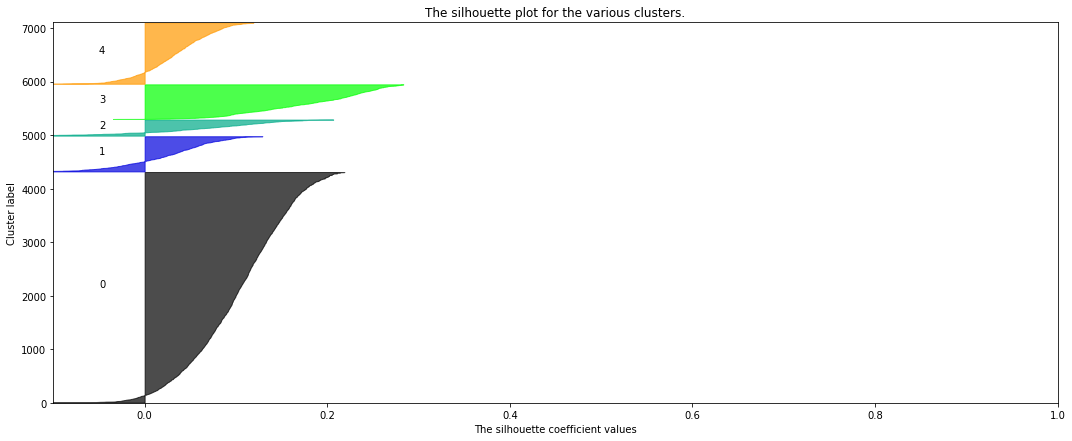

In [ ]:
km = KModes(n_clusters=5,random_state=1000)
cluster_labels = km.fit_predict(mdf_cat)
silhouette_avg = silhouette_score(mdf_cat, cluster_labels)
print(silhouette_avg)
create_silhouette_plot(mdf_cat, cluster_labels)

Unfortunately for k-modes, there does not seem to be a cophenetic correlation coefficient metric that can be used for this unsupervised learning method. Instead, it is better to look at the average silhouette score as well as the silhouette plot, once again. From the average silhouette score, the values is very close to about 0.1. This hints that there is a very average/mediocre amount of cohesion and separation among clusters in the dataset. Hence, the cluster distances among clusters must be on the smaller end of the spectrum as less separation and cohesion makes clusters overlap with one another.

## 7. Analysis Summary

### Algorithm Comparison Summary

In [ ]:
# KModes plots
km = KModes(n_clusters=5,random_state=1000)
cluster_labels = km.fit_predict(mdf_cat)
mdf_cat['predicted_cluster']=cluster_labels

for i in mdf_cat.columns:
    ctab = pd.crosstab(mdf_cat[i], mdf_cat['predicted_cluster'])
    print(ctab)
    print(ctab / ctab.sum())
    ctab.plot.bar()
    plt.title('{}'.format(i))
    plt.xlabel(i)
    plt.show()

From the results throughout this report, it is apparent that the k-modes did a much better job in ascertaining groups within the data than that of the agglomerative hierarchial clustering. In terms of the research motivations, there were a lot of insights that needed to be confirmed. Prior to this analysis, there were a lot of relationships that were intuitive and needed to substantiate with unsupervised learning. For instance, a group that contained the `Disney+` streaming service should also like `family` and `animation` genres and have age groups that are younger. This specific example was better confirmed by the k-modes clustering than that of the agglomerative hierarchial clustering. The research goals of this project was to understand underlying groups within streaming platforms to better understand how to cater to them. By understanding this, reccomendations, like different movie genres, can be made to allow for a more enjoyable viewing experience. Overall, the k-modes algorithm better helped reach the research goals of this analysis and provided informative results.

### Insights Summary

In conclusion, this project provided a variety of insights on not only the dataset, but also the ways in which unsupervised learning methods can be applied and interpretted. In the beginning of the report, an exploratory data analysis as well as a data processing/cleaning phase was necessary to jumpstart the unsupervised learning analysus. First, many descriptive statistics were calculated for all the numerical data in the dataset. From the output, it was evident that there was a large standard deviation among each feature in the dataset. Additionally, with the creation of dummy variables, the standard deviation was quite unbalanced from feature to feature. To combat this, a scaling/stanardizing of the data was completed to ensure a more fair and holistic analysis. Furthermore, some basic pairwise relationships were ascertained to see if there were any correlations between variables of interest. Specifically, there was a strong positive correlation between `Disney+` and the `Family` genre, which makes sense intuitively. 

After the preliminary exploratory data analysis, the dataset structure was put under scrutiny. The two dataset, `mdf` and `mdf_cat`, were plotted onto a t-sne plot to discover the shape of each dataset. Unfortunately, both datasets seemed to be encompassed by 1-2 clusters and were approximately spherical in shape. Additionally, there was a large imbalance in the size of the clusters with many clusters overlapping with one another. Because of the shape and type of dataset that was being used, two main clustering algorithms were applied to the dataset: agglomerative hierarchial clustering and k-modes clustering. From further analysis using silhouette scores, dendograms, elbow plots and t-sne plots, it was found that using 5 cluster for the k-modes algorithm and using 5 clusters with complete linkage for the agglomerative hierarchial clustering algorithm provided the most optimal results.

After choosing the final clustering, the separation and cohesion of the clusters were assessed using the silhouette score and plots. From this analysis, it was found that the agglomerative hierarchial clustering had much better separation and cohesion in comparison to that of the k-modes algorithm. However, this does not mean that hierarchial clustering perfomed better than k-modes. When looking at the cluster attributes, it was apparent that many of the clusterings created by k-modes made sense. In other words, k-modes was much better at identifying streaming platforms as cluster groups, while hierarchial clustering tends to muddle the streaming platforms together. Additionally, some of the cluster in the hierarchial clustering didn't make sense, like having a group that is dominated by both younger and older audiences who watch comedies and documentaries. This doesn't intuitively make sense and it yielded inaccurate results. On the other hand, k-modes provided cluster groups that actually made sense. For instance, there was a `Disney+` cluster group that had younger audiences and had adventure, animation and family genre movies. This result intuitively makes sense and is more accurate. Lastly, looking at the cluster distances of each method, it was apparent that the cluster distances of agglomerative hierarchial clustering were smaller than that of k-modes clustering due to the differences in average silhouette scores.

All in all, this clustering analysis provided an insightful analysis on the research motivation and shed light on underlying groups within the streaming platforms dataset, which will help cater and reccomend genres to different groups. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e78434b8-db04-42b7-8798-69dc38c46636' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>